In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df = pd.read_csv('marketing.csv',  parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

In [2]:
df['is_retained'] = df['is_retained'].astype(bool)

In [3]:
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}
df['channel_code'] = df['subscribing_channel'].map(channel_dict)

In [4]:
import datetime as dt
df['DayofWeek'] = df['date_subscribed'].dt.dayofweek

In [5]:
def retention_rate(df, col):
    
    #retained
    retained = df[df['is_retained'] == True].\
    groupby(col)['user_id'].nunique()
    
    #converted
    converted = df[df['converted'] == True].\
    groupby(col)['user_id'].nunique()
    
    ret_rate = retained/converted
    return ret_rate

In [6]:
def unstacking(df, level_to_unstack):
    return pd.DataFrame(df.unstack(level=level_to_unstack))
    

In [7]:
daily_retention = retention_rate(df, ['date_subscribed', 'subscribing_channel'])

In [8]:
daily_retention = unstacking(daily_retention, 1)

In [9]:
daily_retention.head()

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            1.00  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000

In [10]:
daily_retention = daily_retention.fillna(0)

In [11]:
def plotting(df):
    for col in df:
        plt.plot(df.index, df[col])
        plt.title('Daily ' + col + ' retention rate\n',
                 size=16)
        plt.ylabel('Retention rate(%)', size=14)
        plt.xlabel('Date', size=14)
        plt.show()

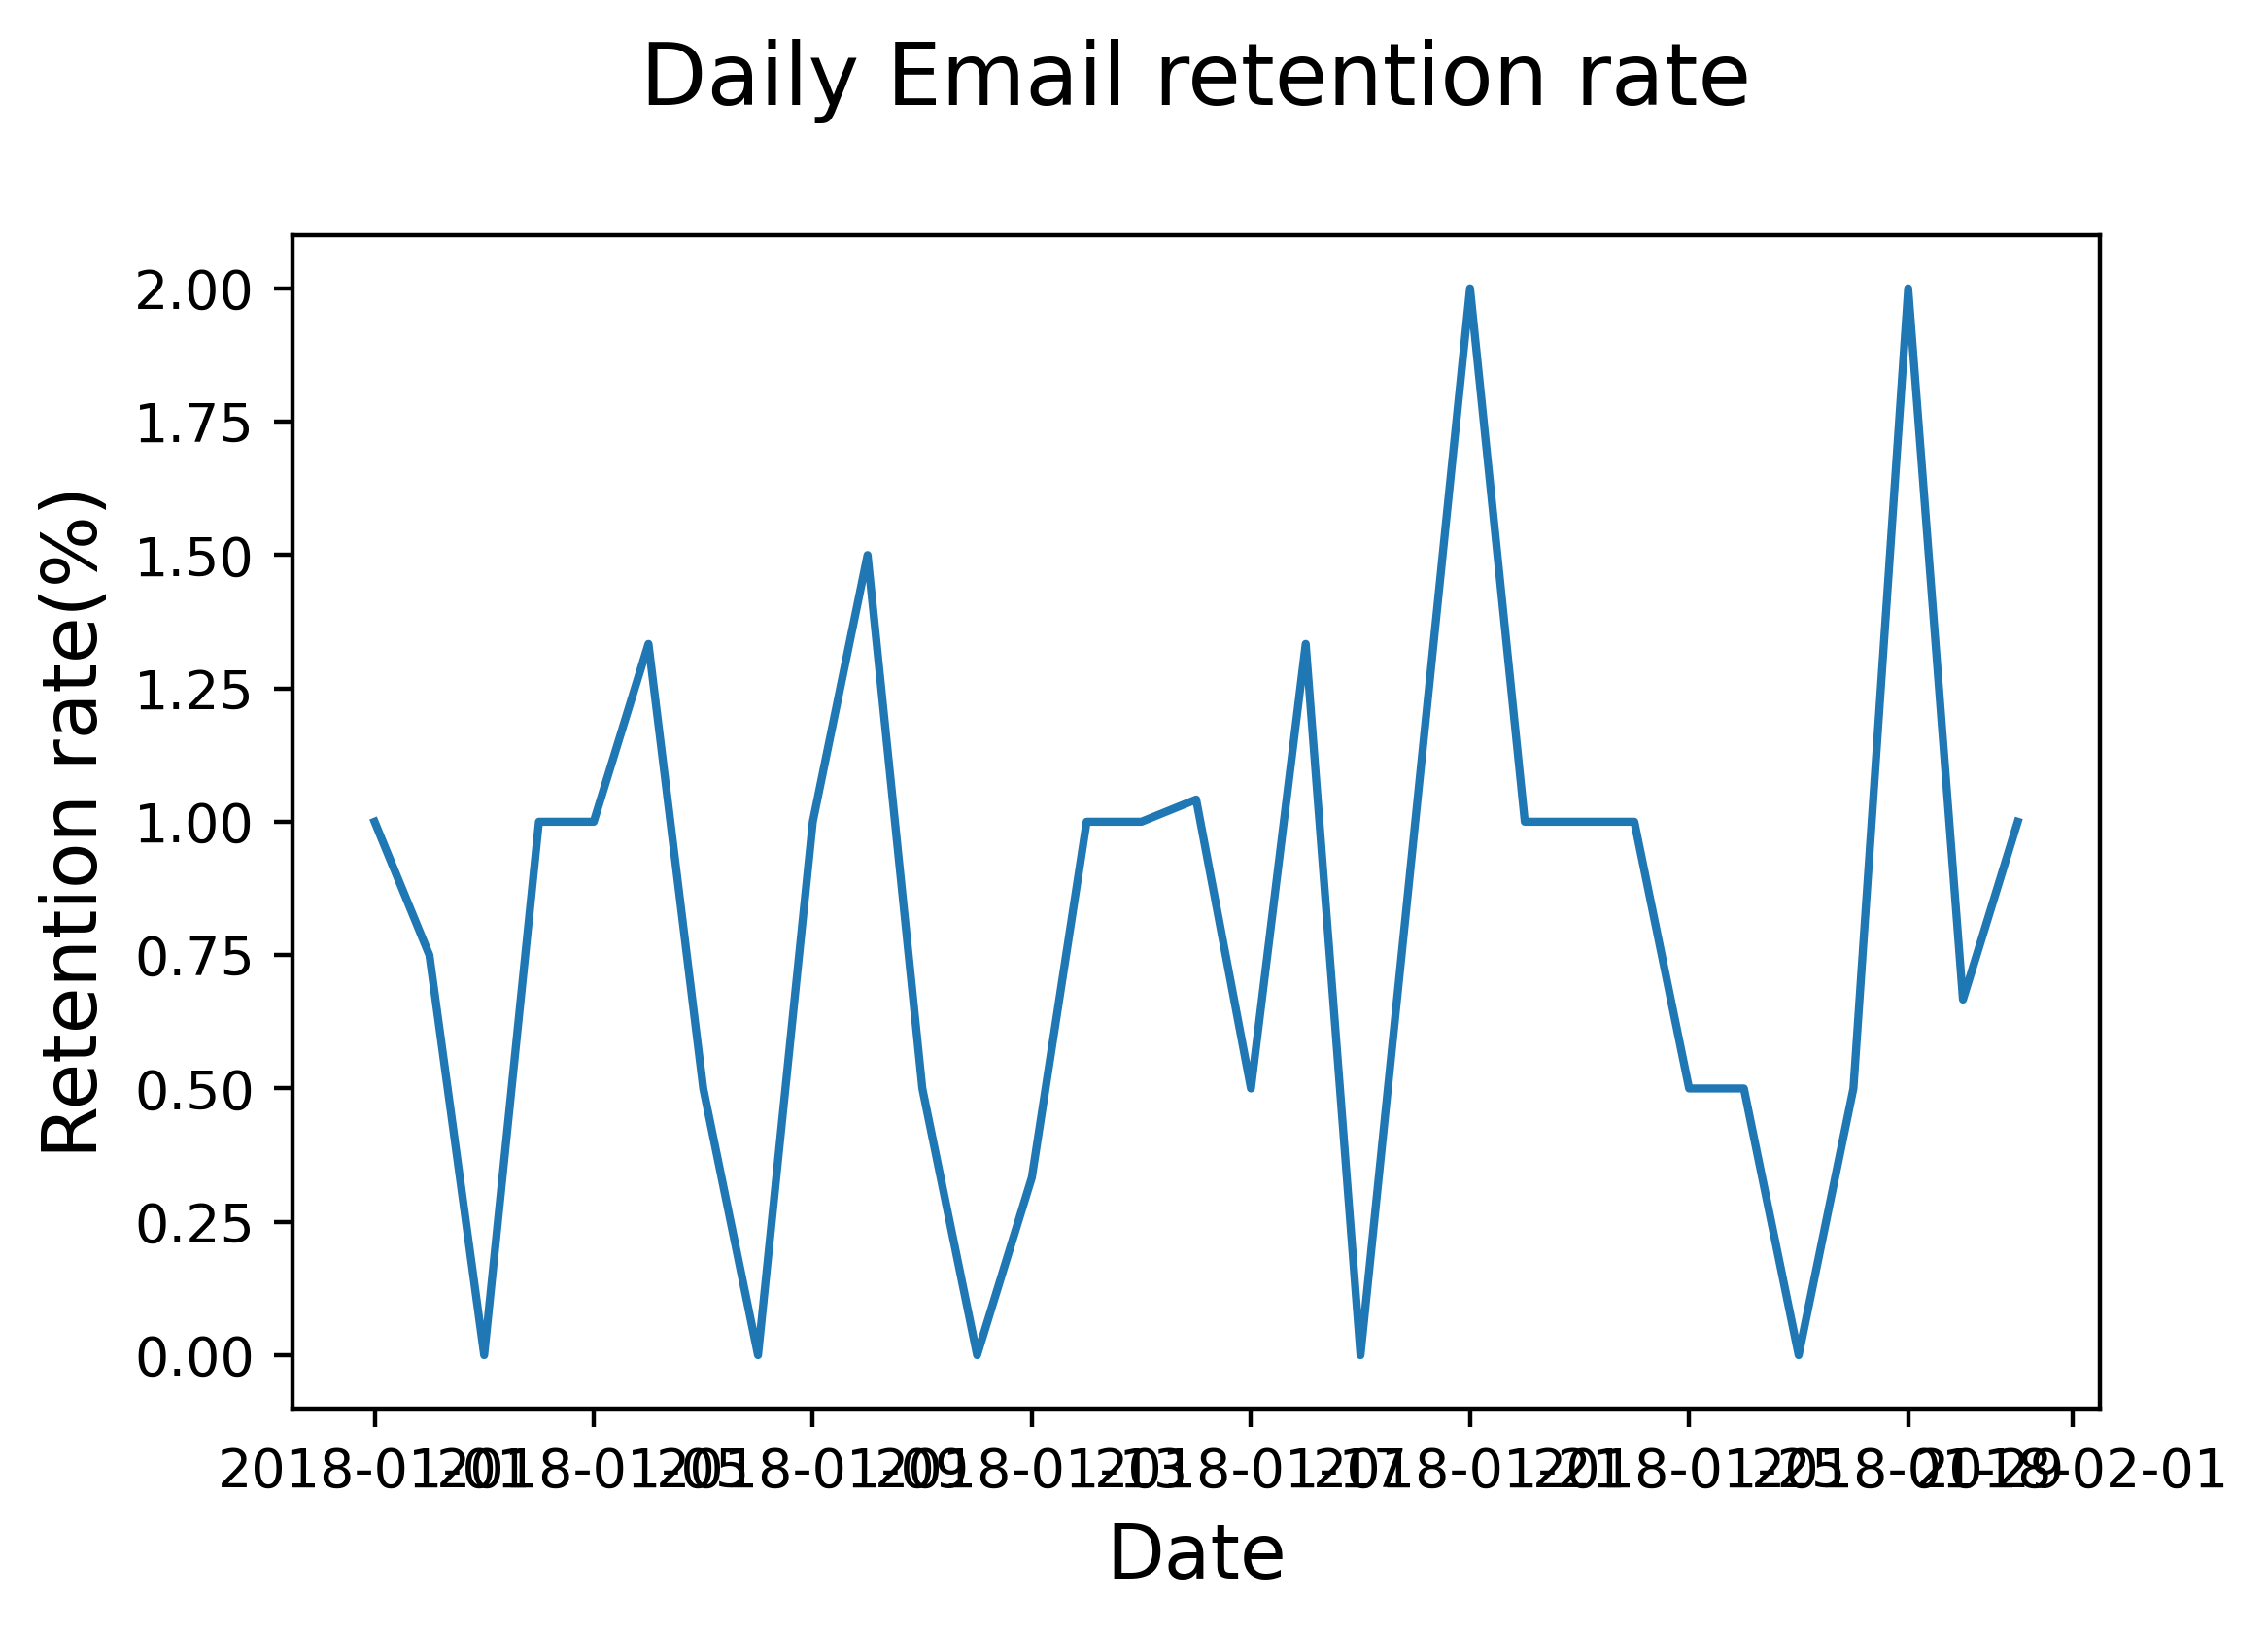

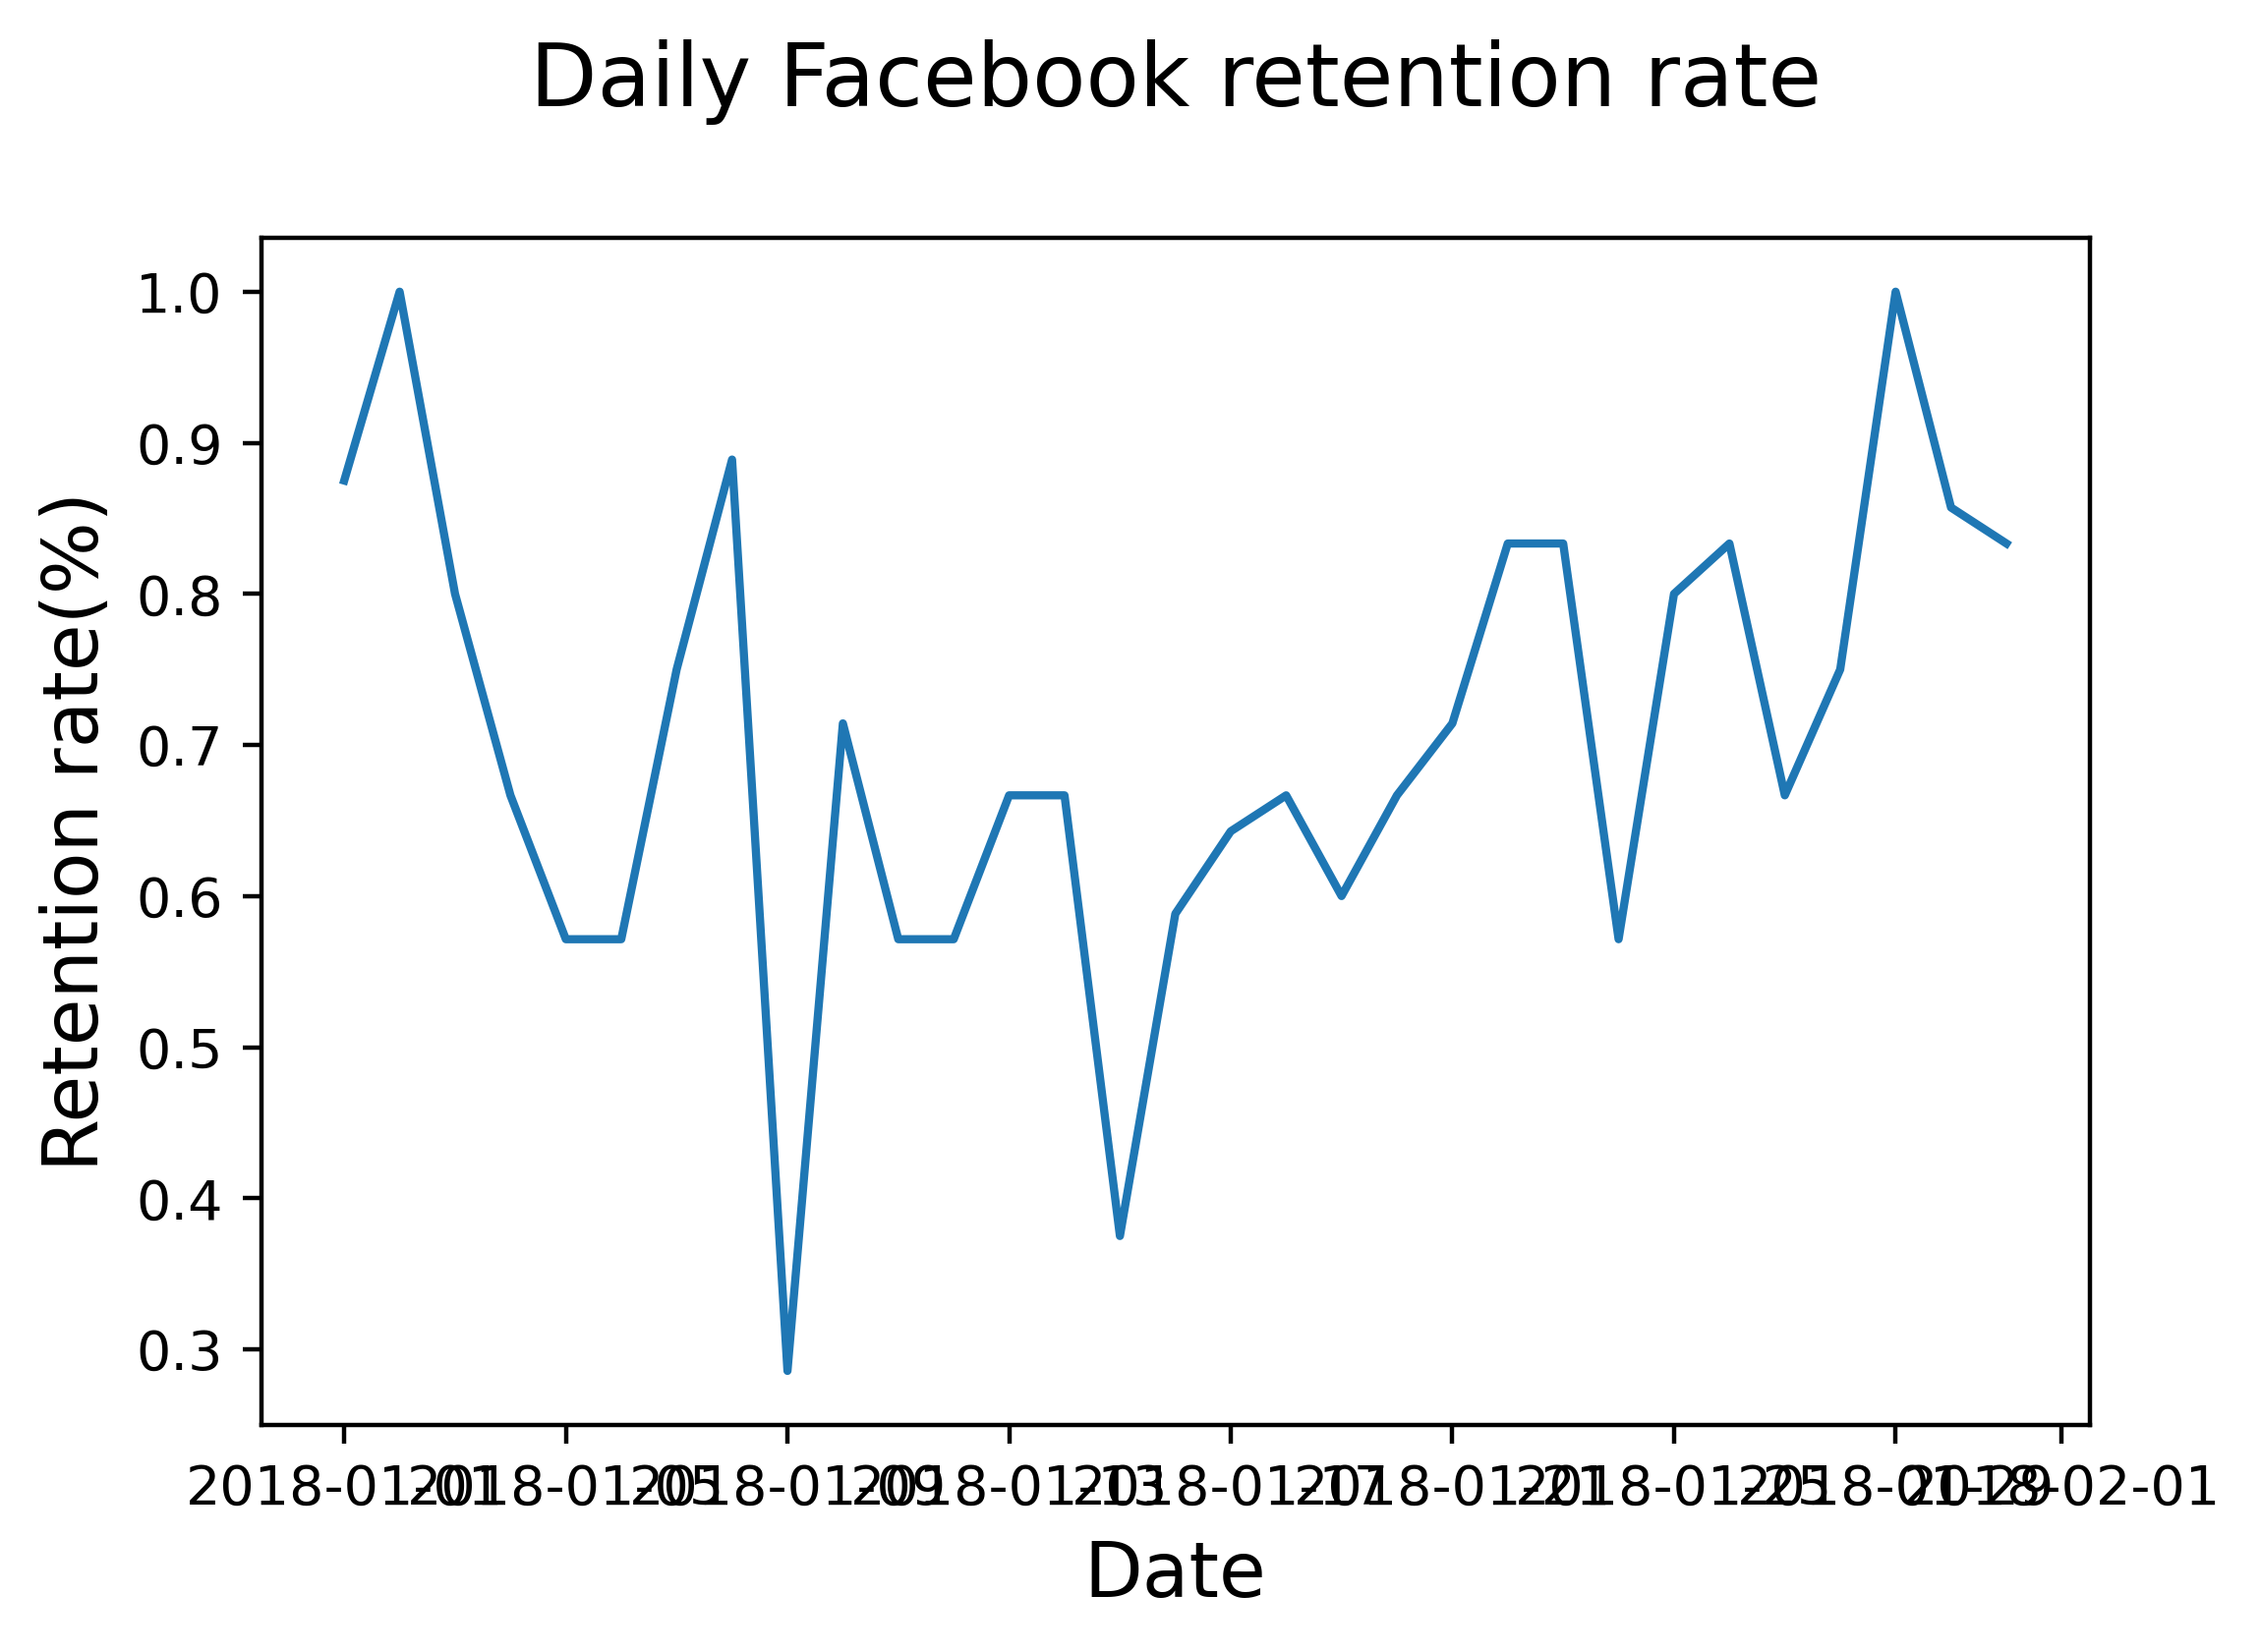

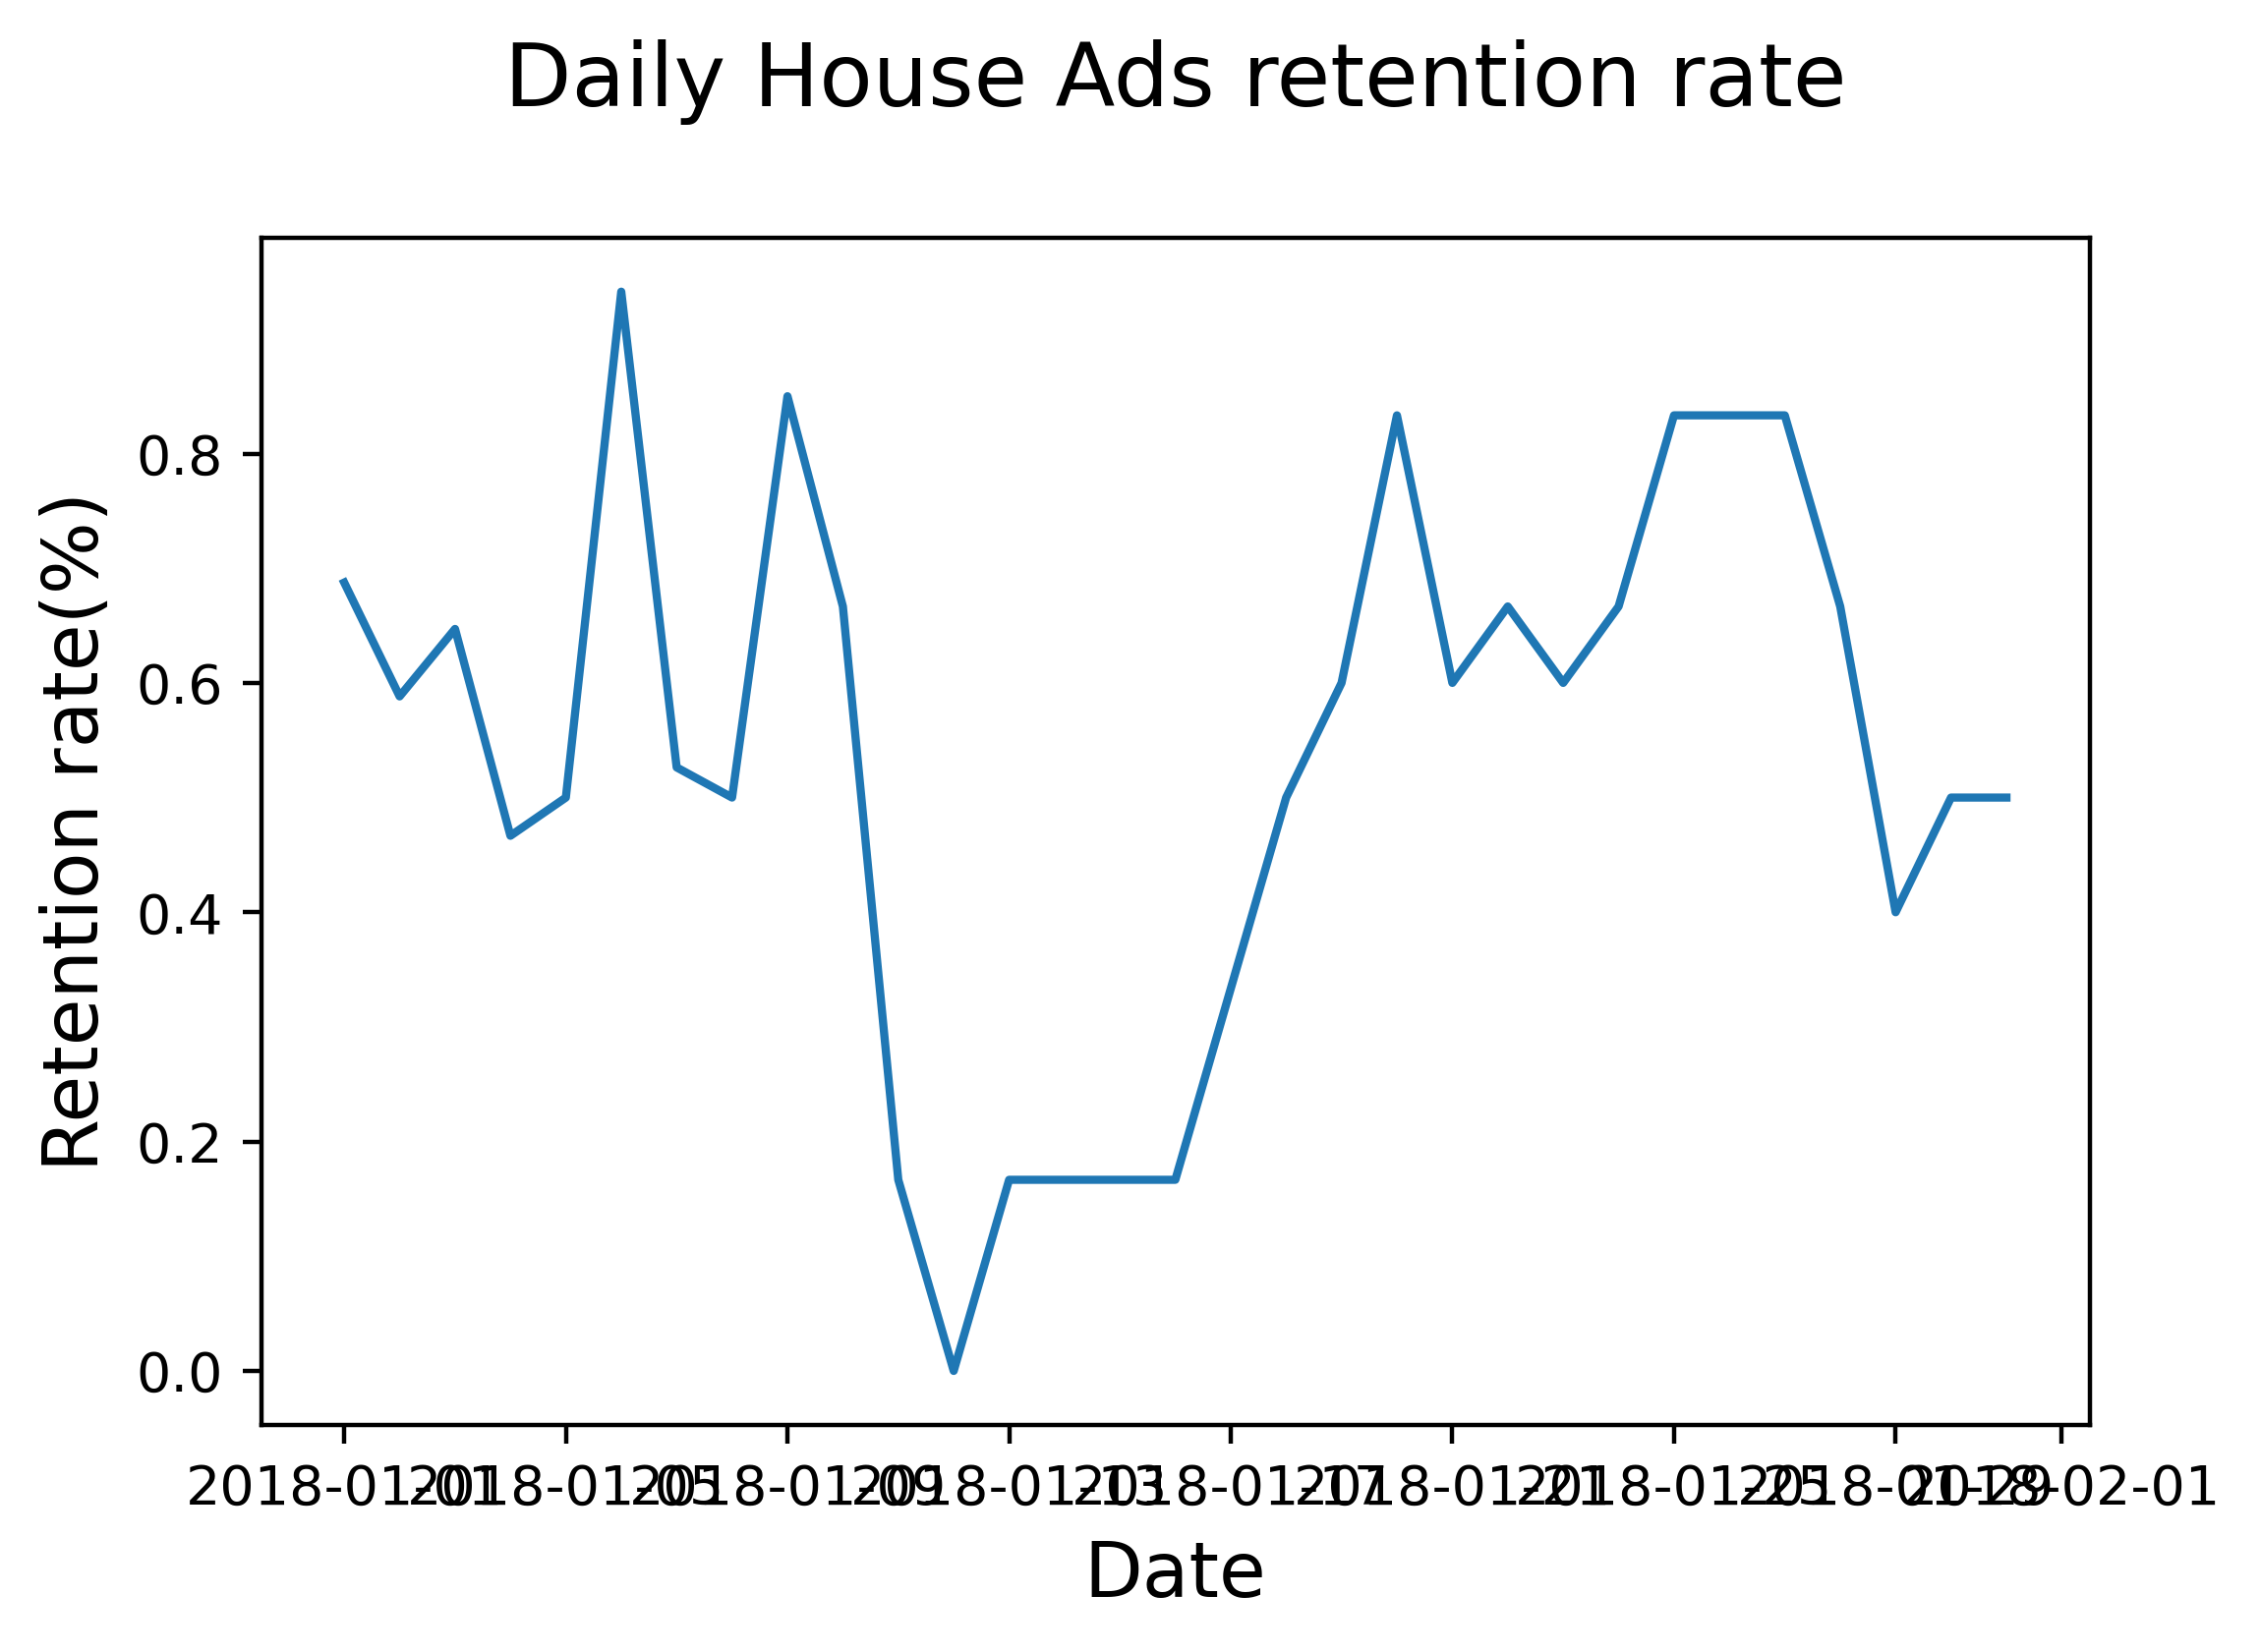

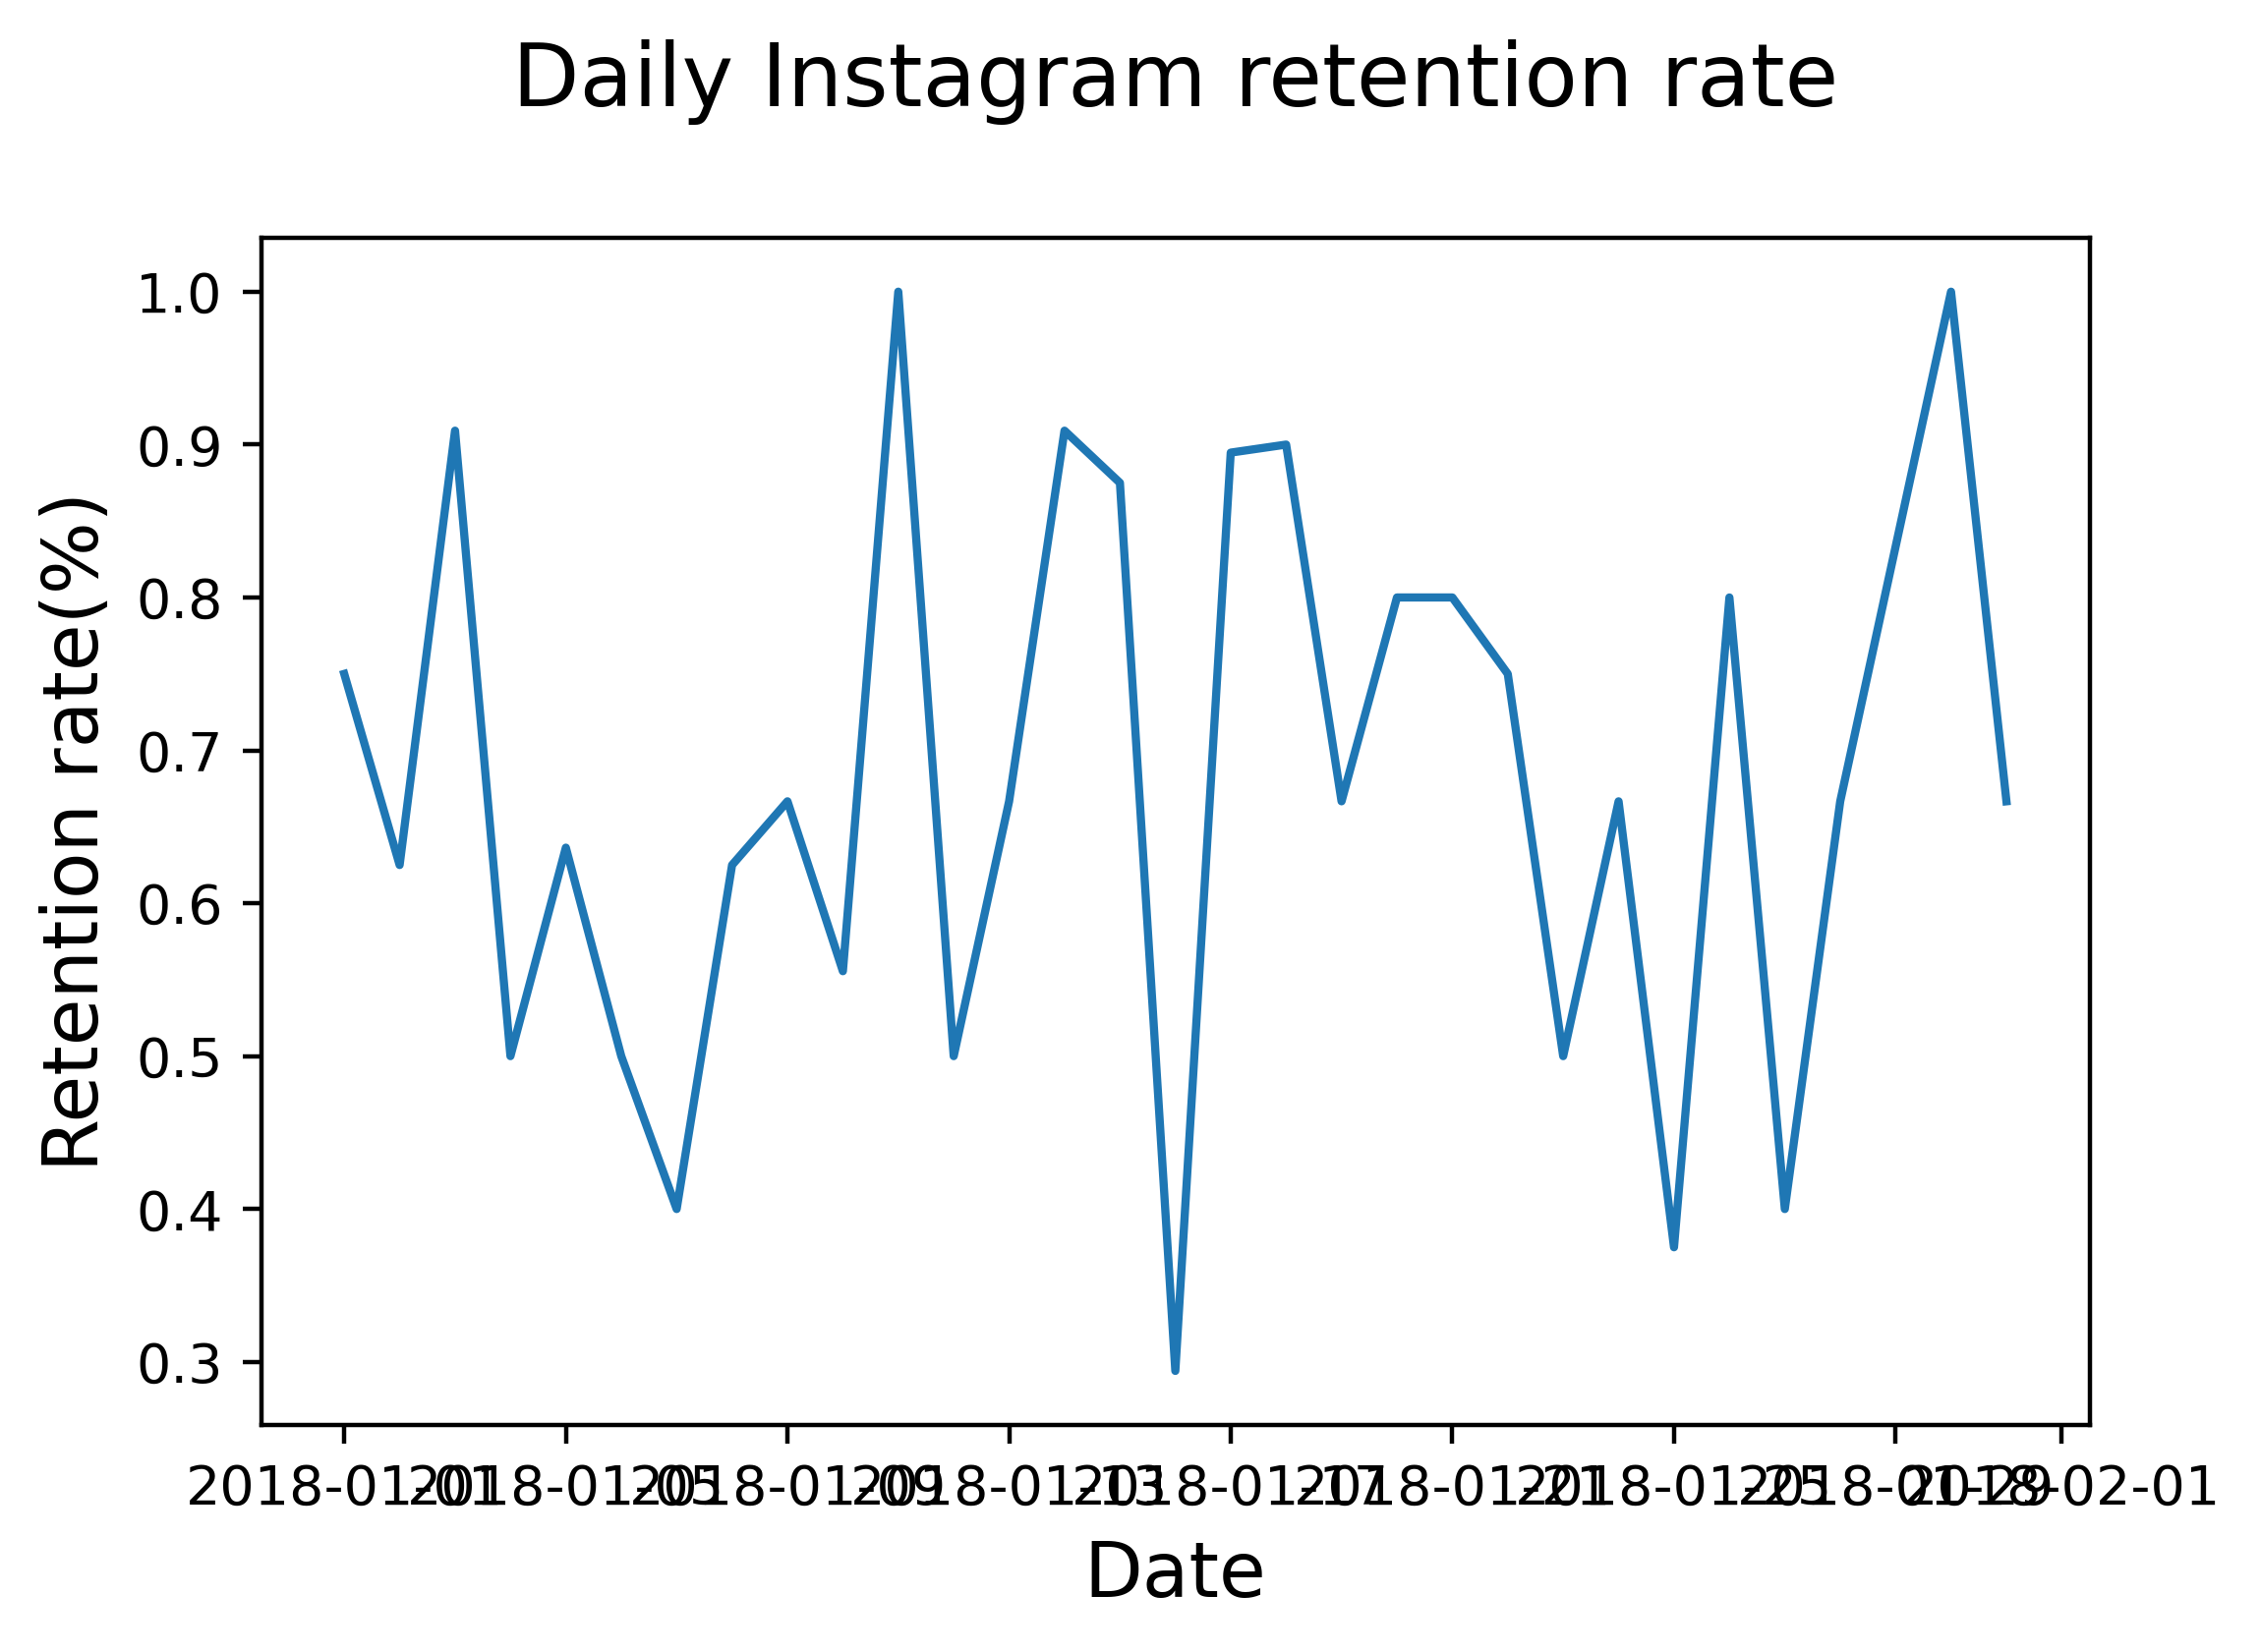

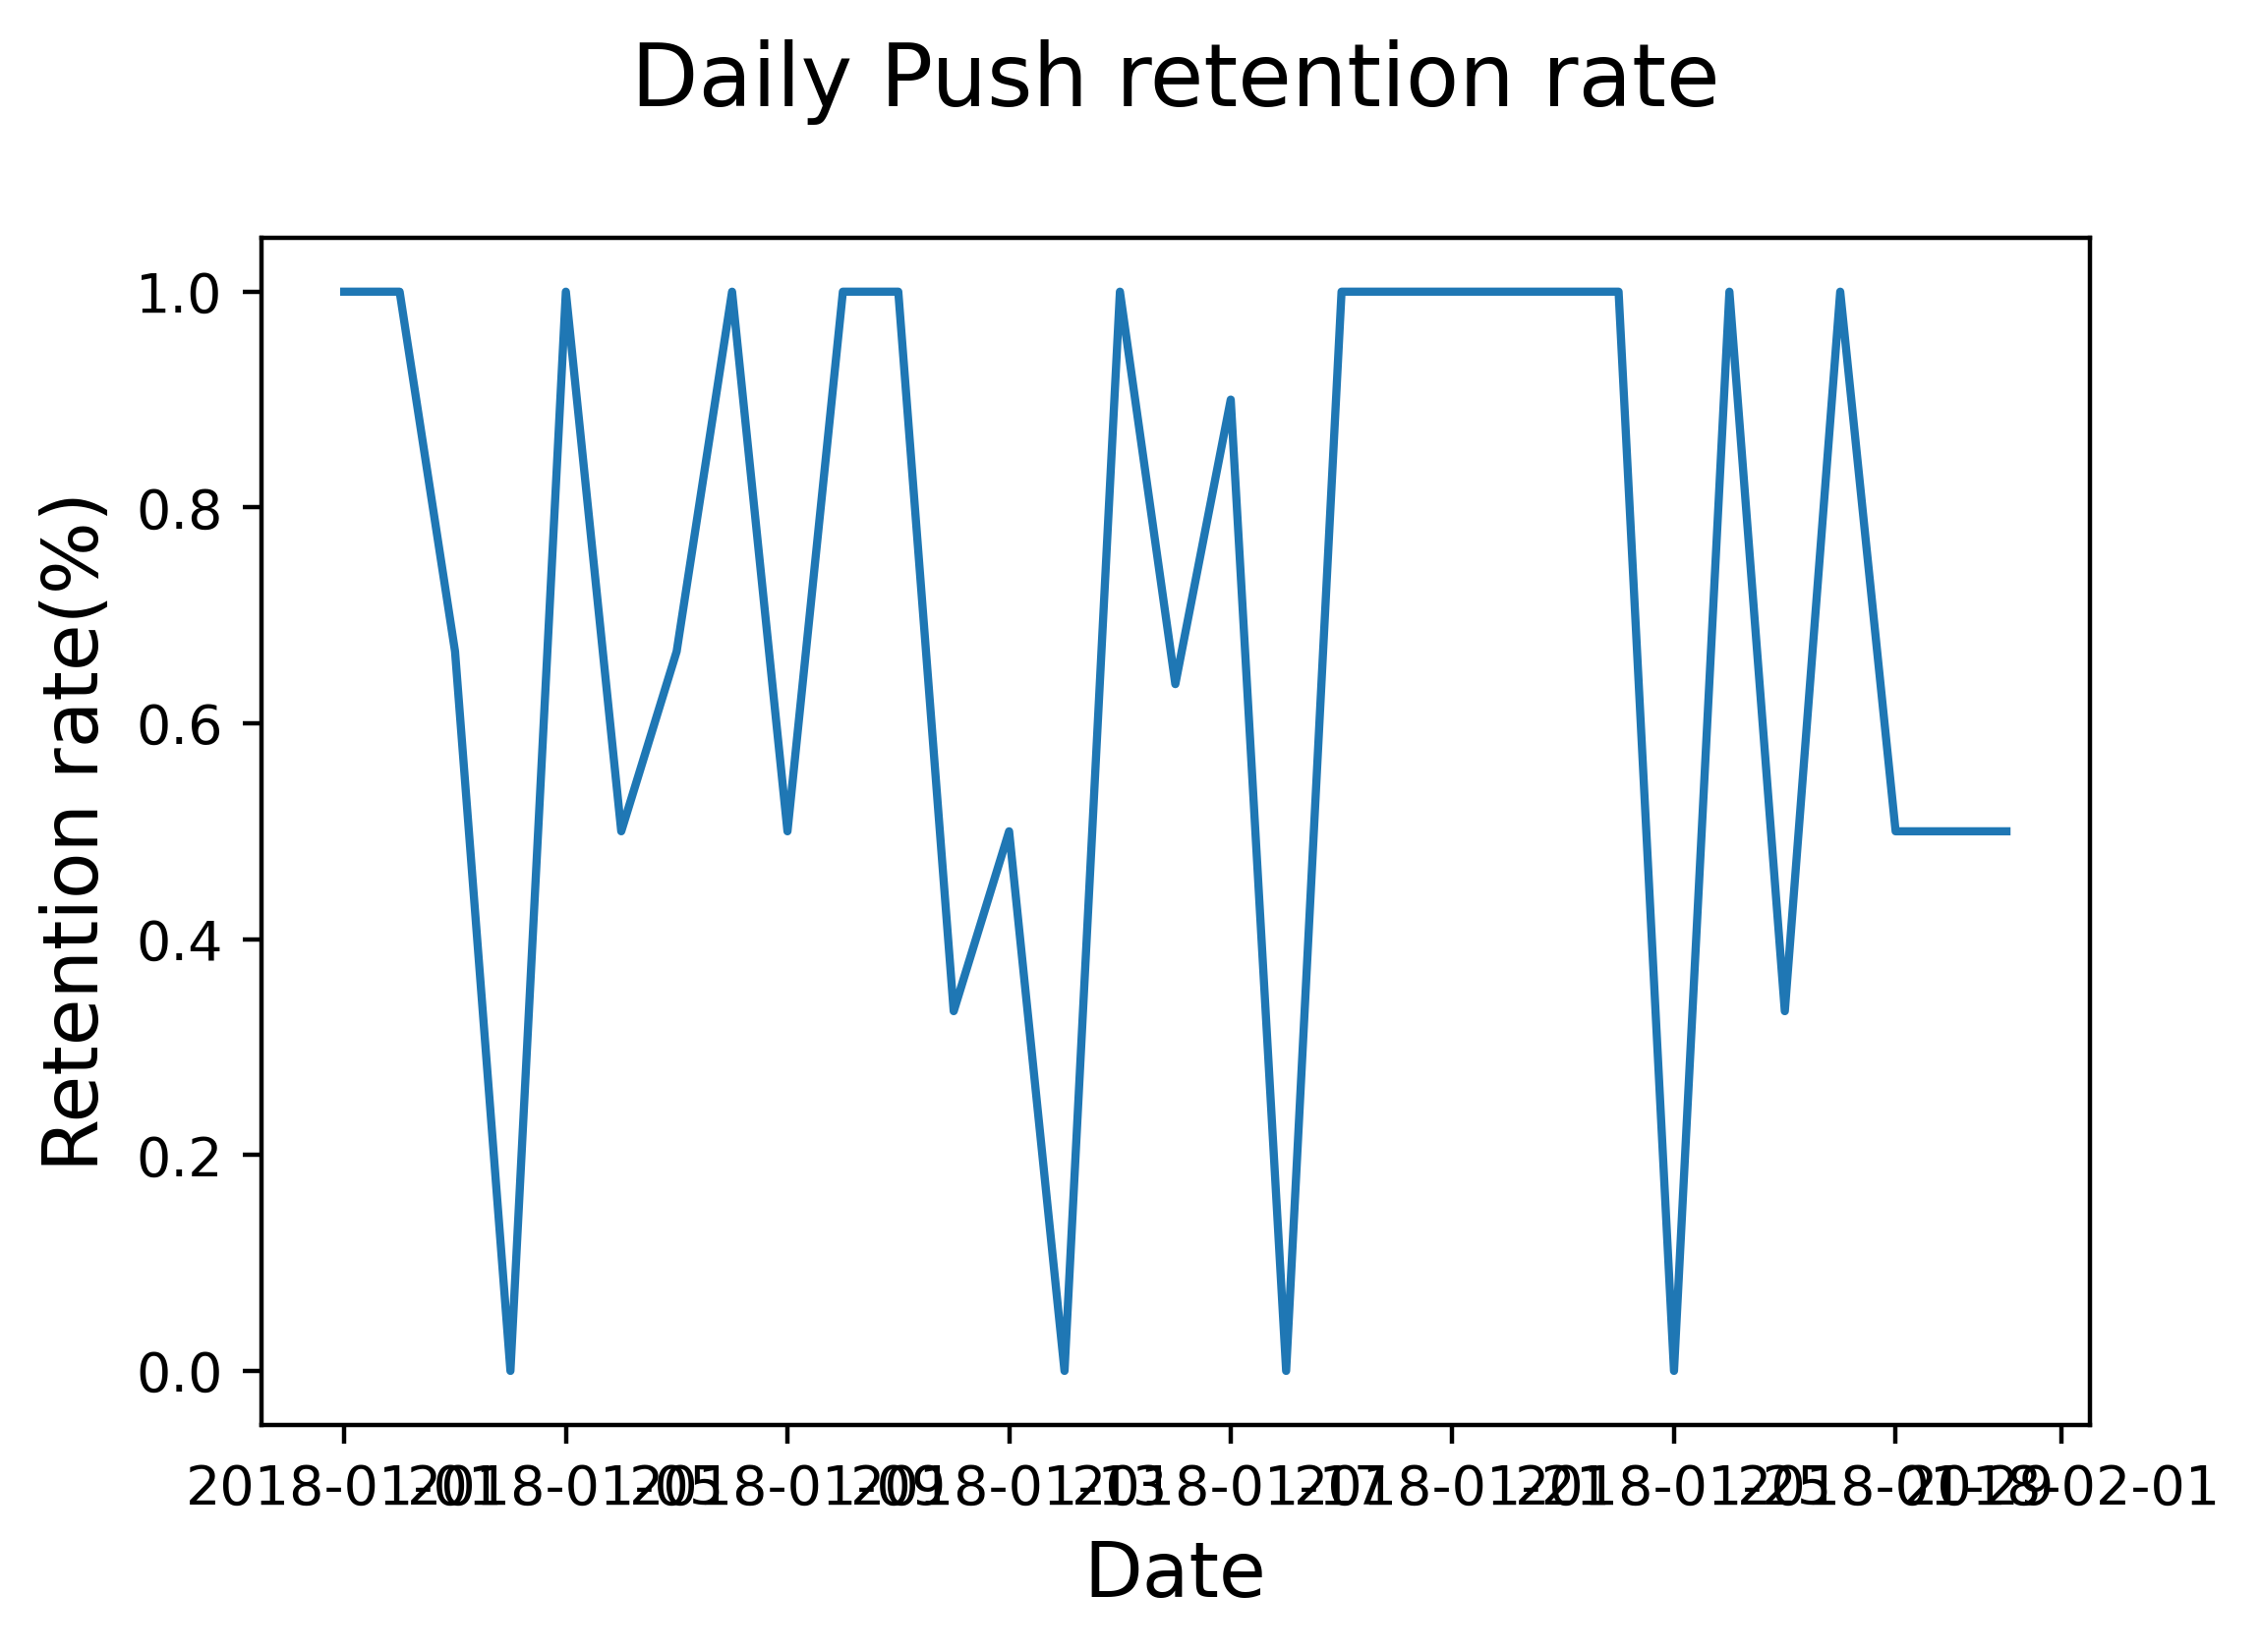

In [12]:
plotting(daily_retention)

In [13]:
def conversion_rate(df, col):
    column_conv = df[df['converted'] == True]\
                       .groupby(col)['user_id'].nunique()
    column_total = df.groupby(col)['user_id'].nunique()   
    conversion_rate = column_conv/column_total
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [14]:
import pandas as pd
age_group_conv = conversion_rate(df, ['date_served',
                                             'age_group'])

age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

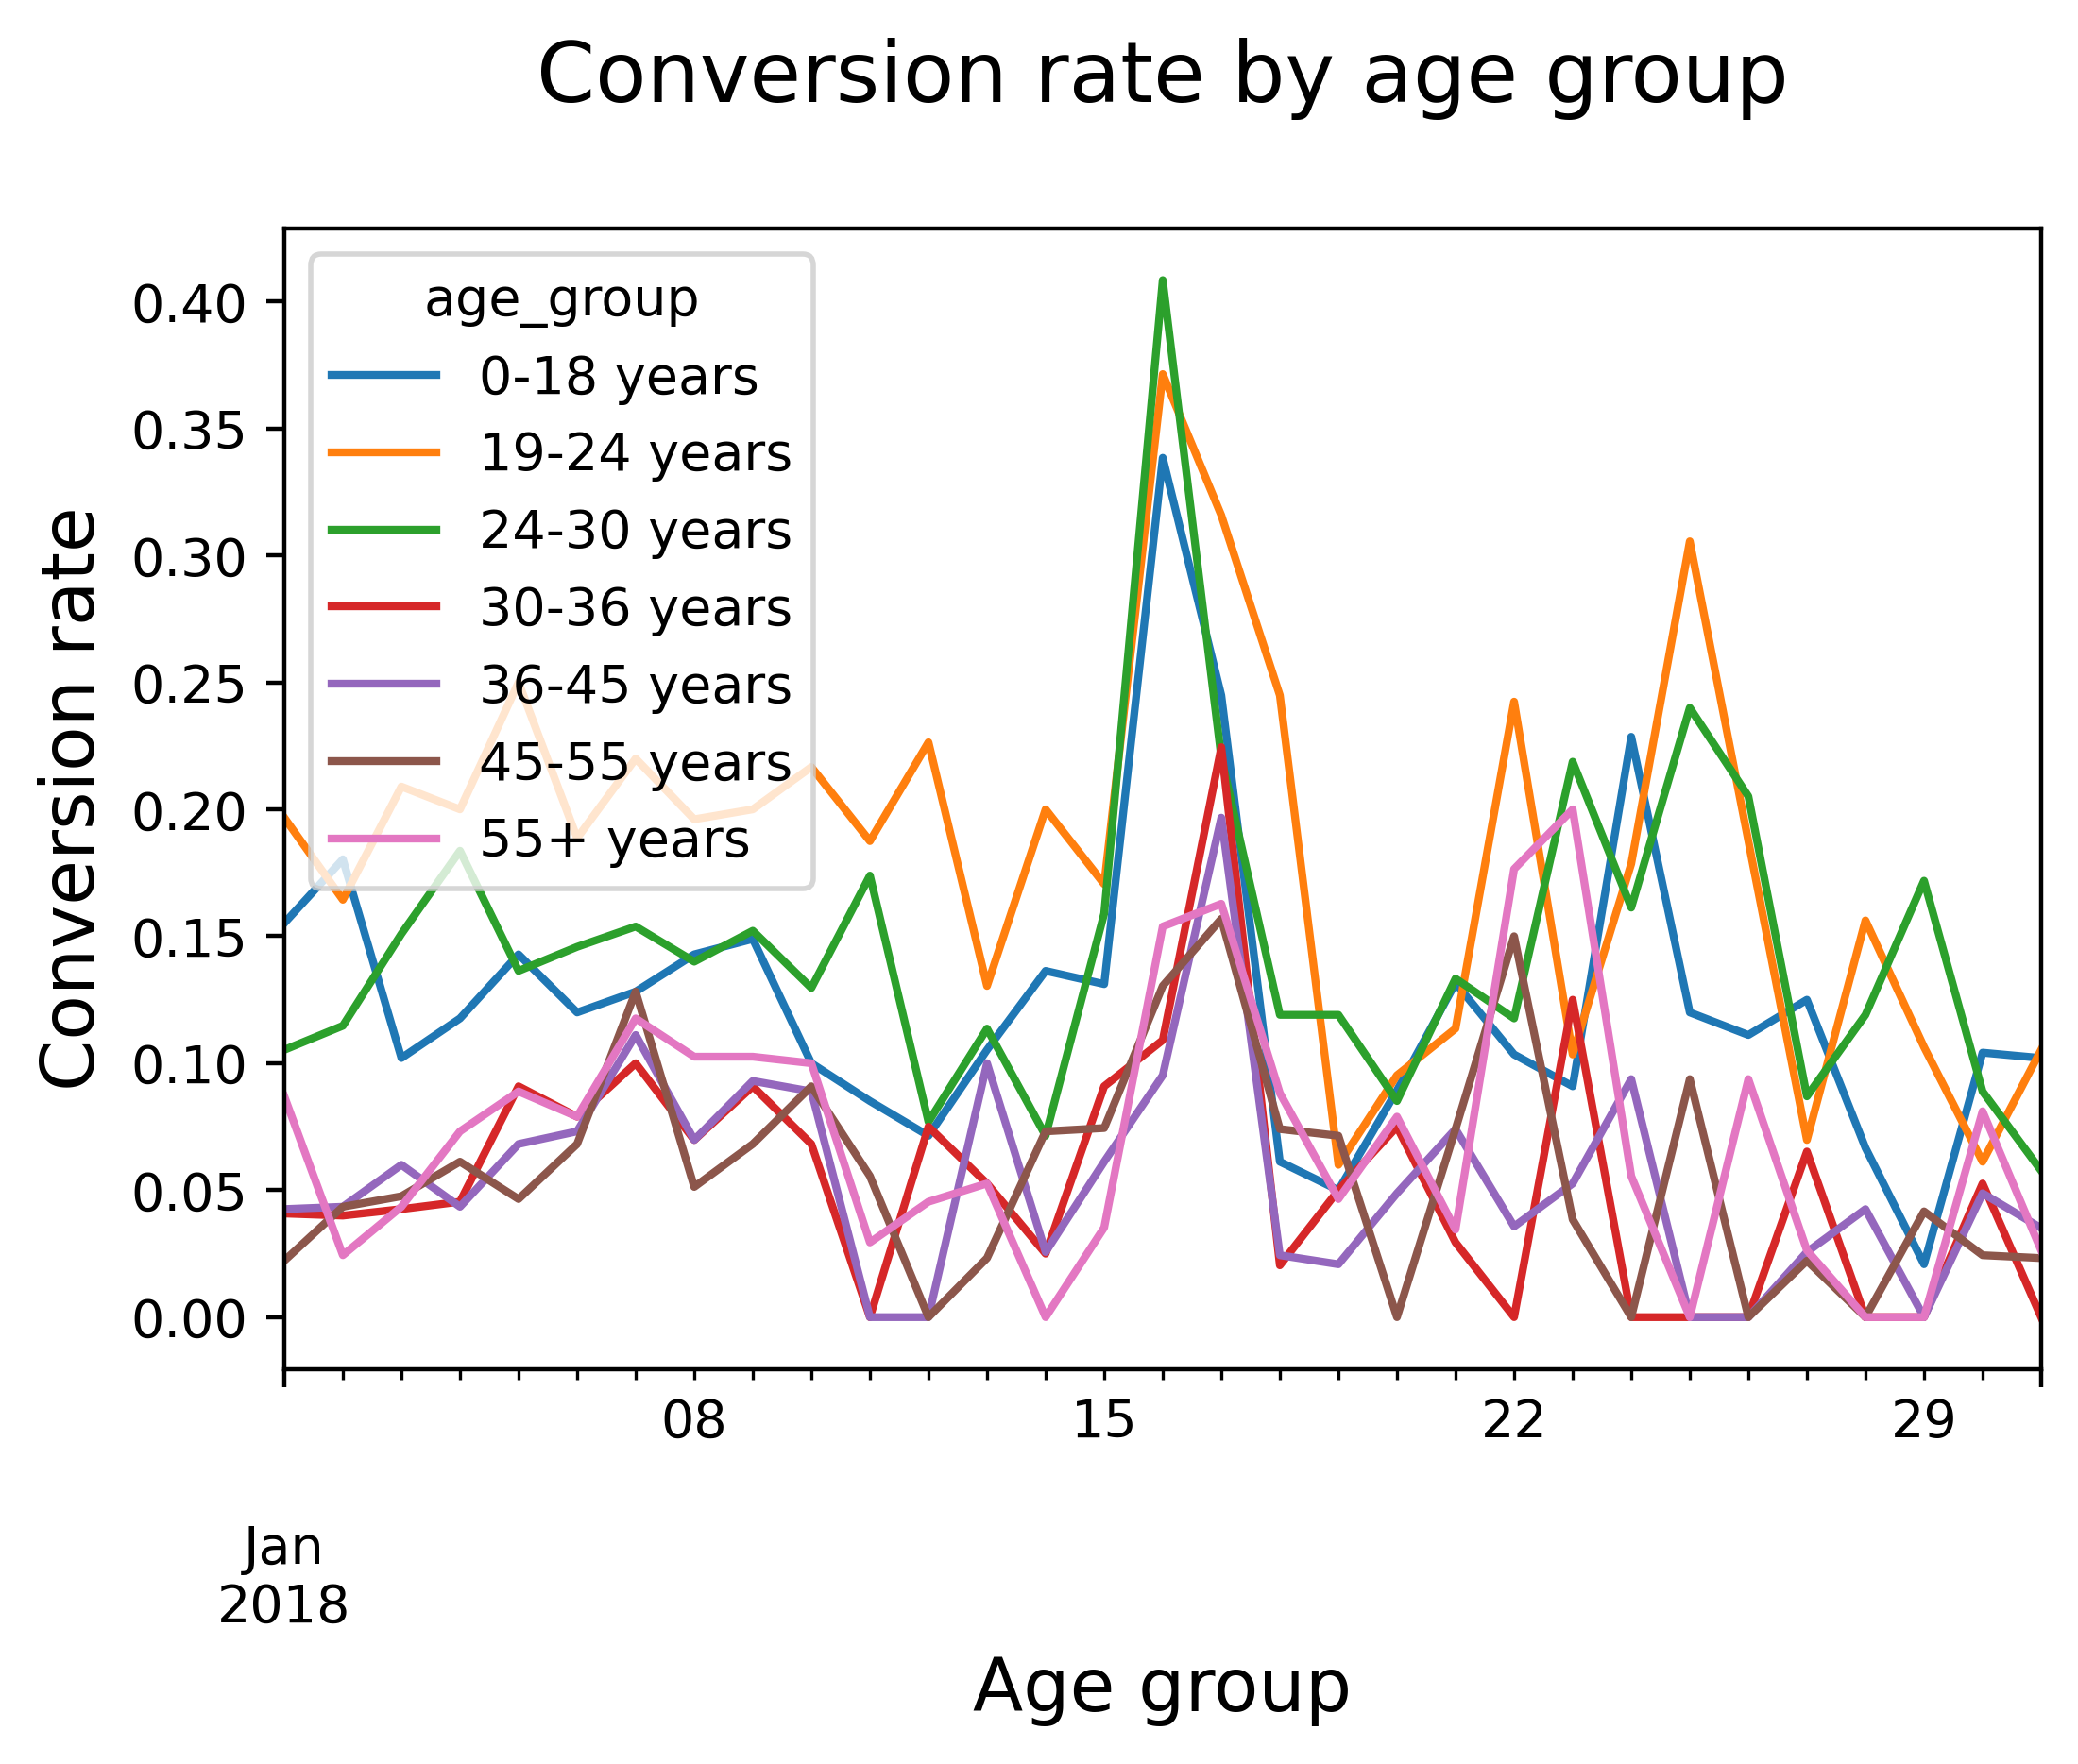

In [15]:
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [16]:
def plotting_conv(df):
    for column in df:
        plt.plot(df.index, df[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

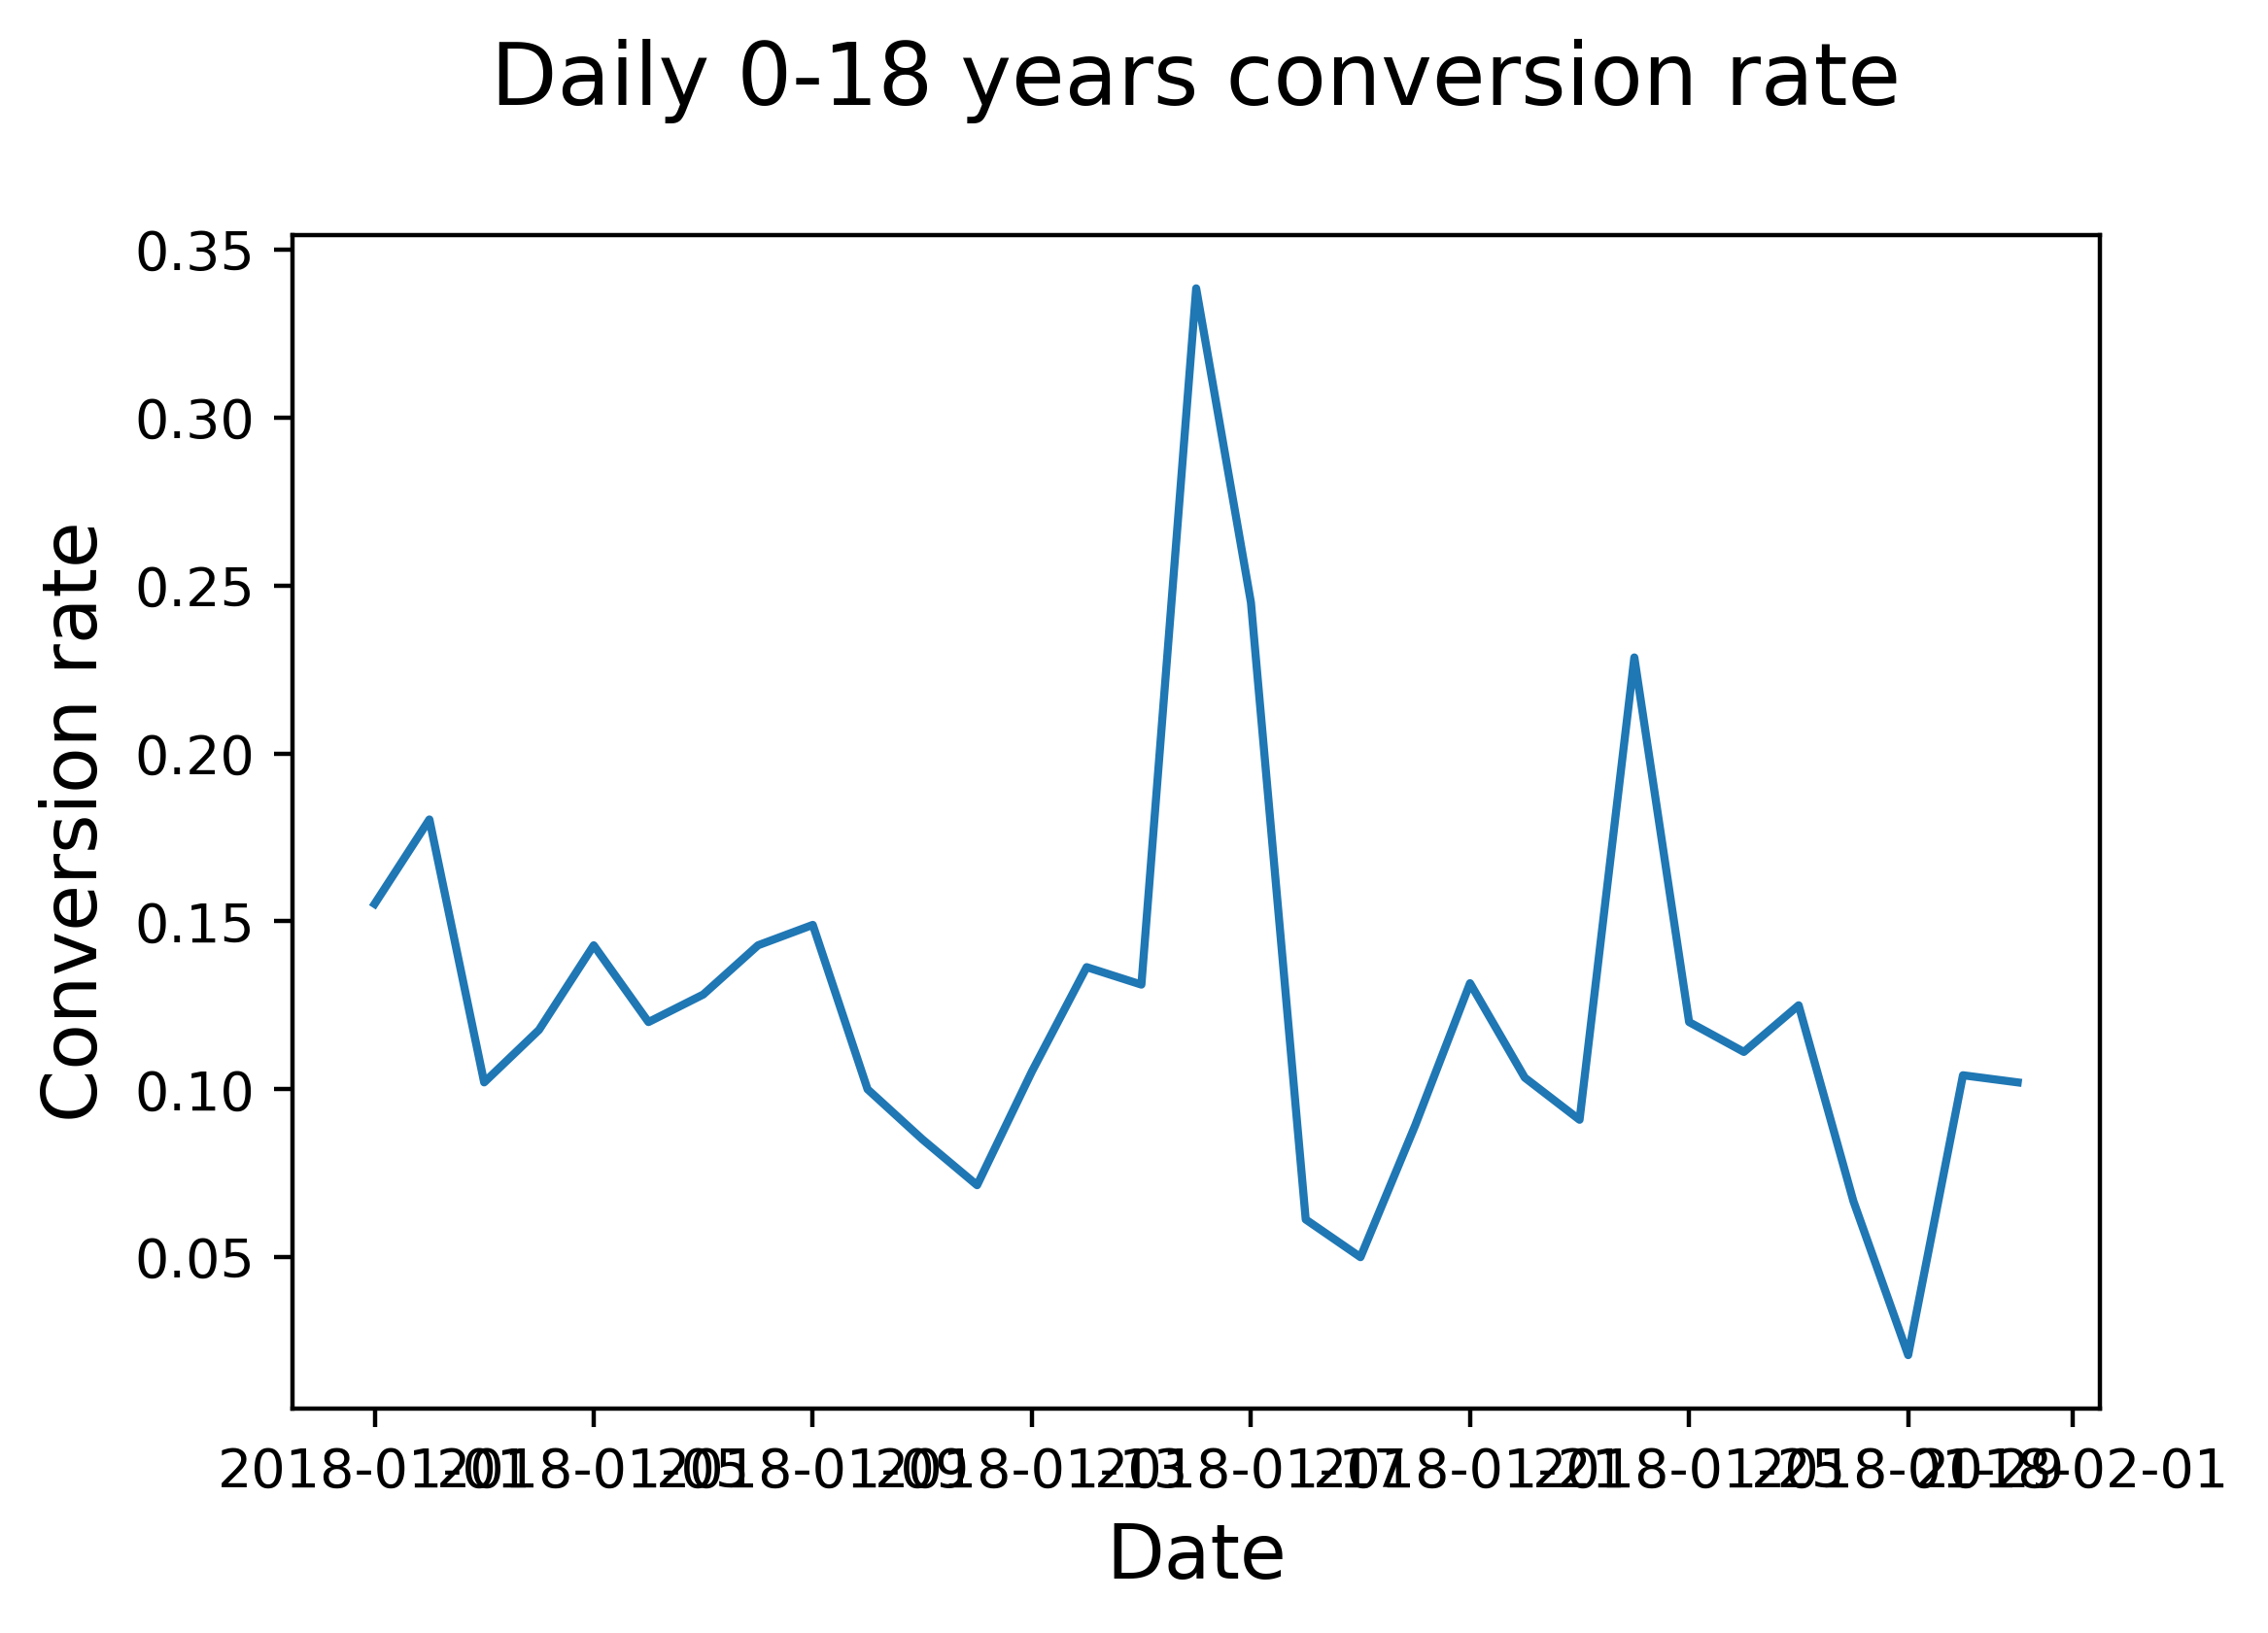

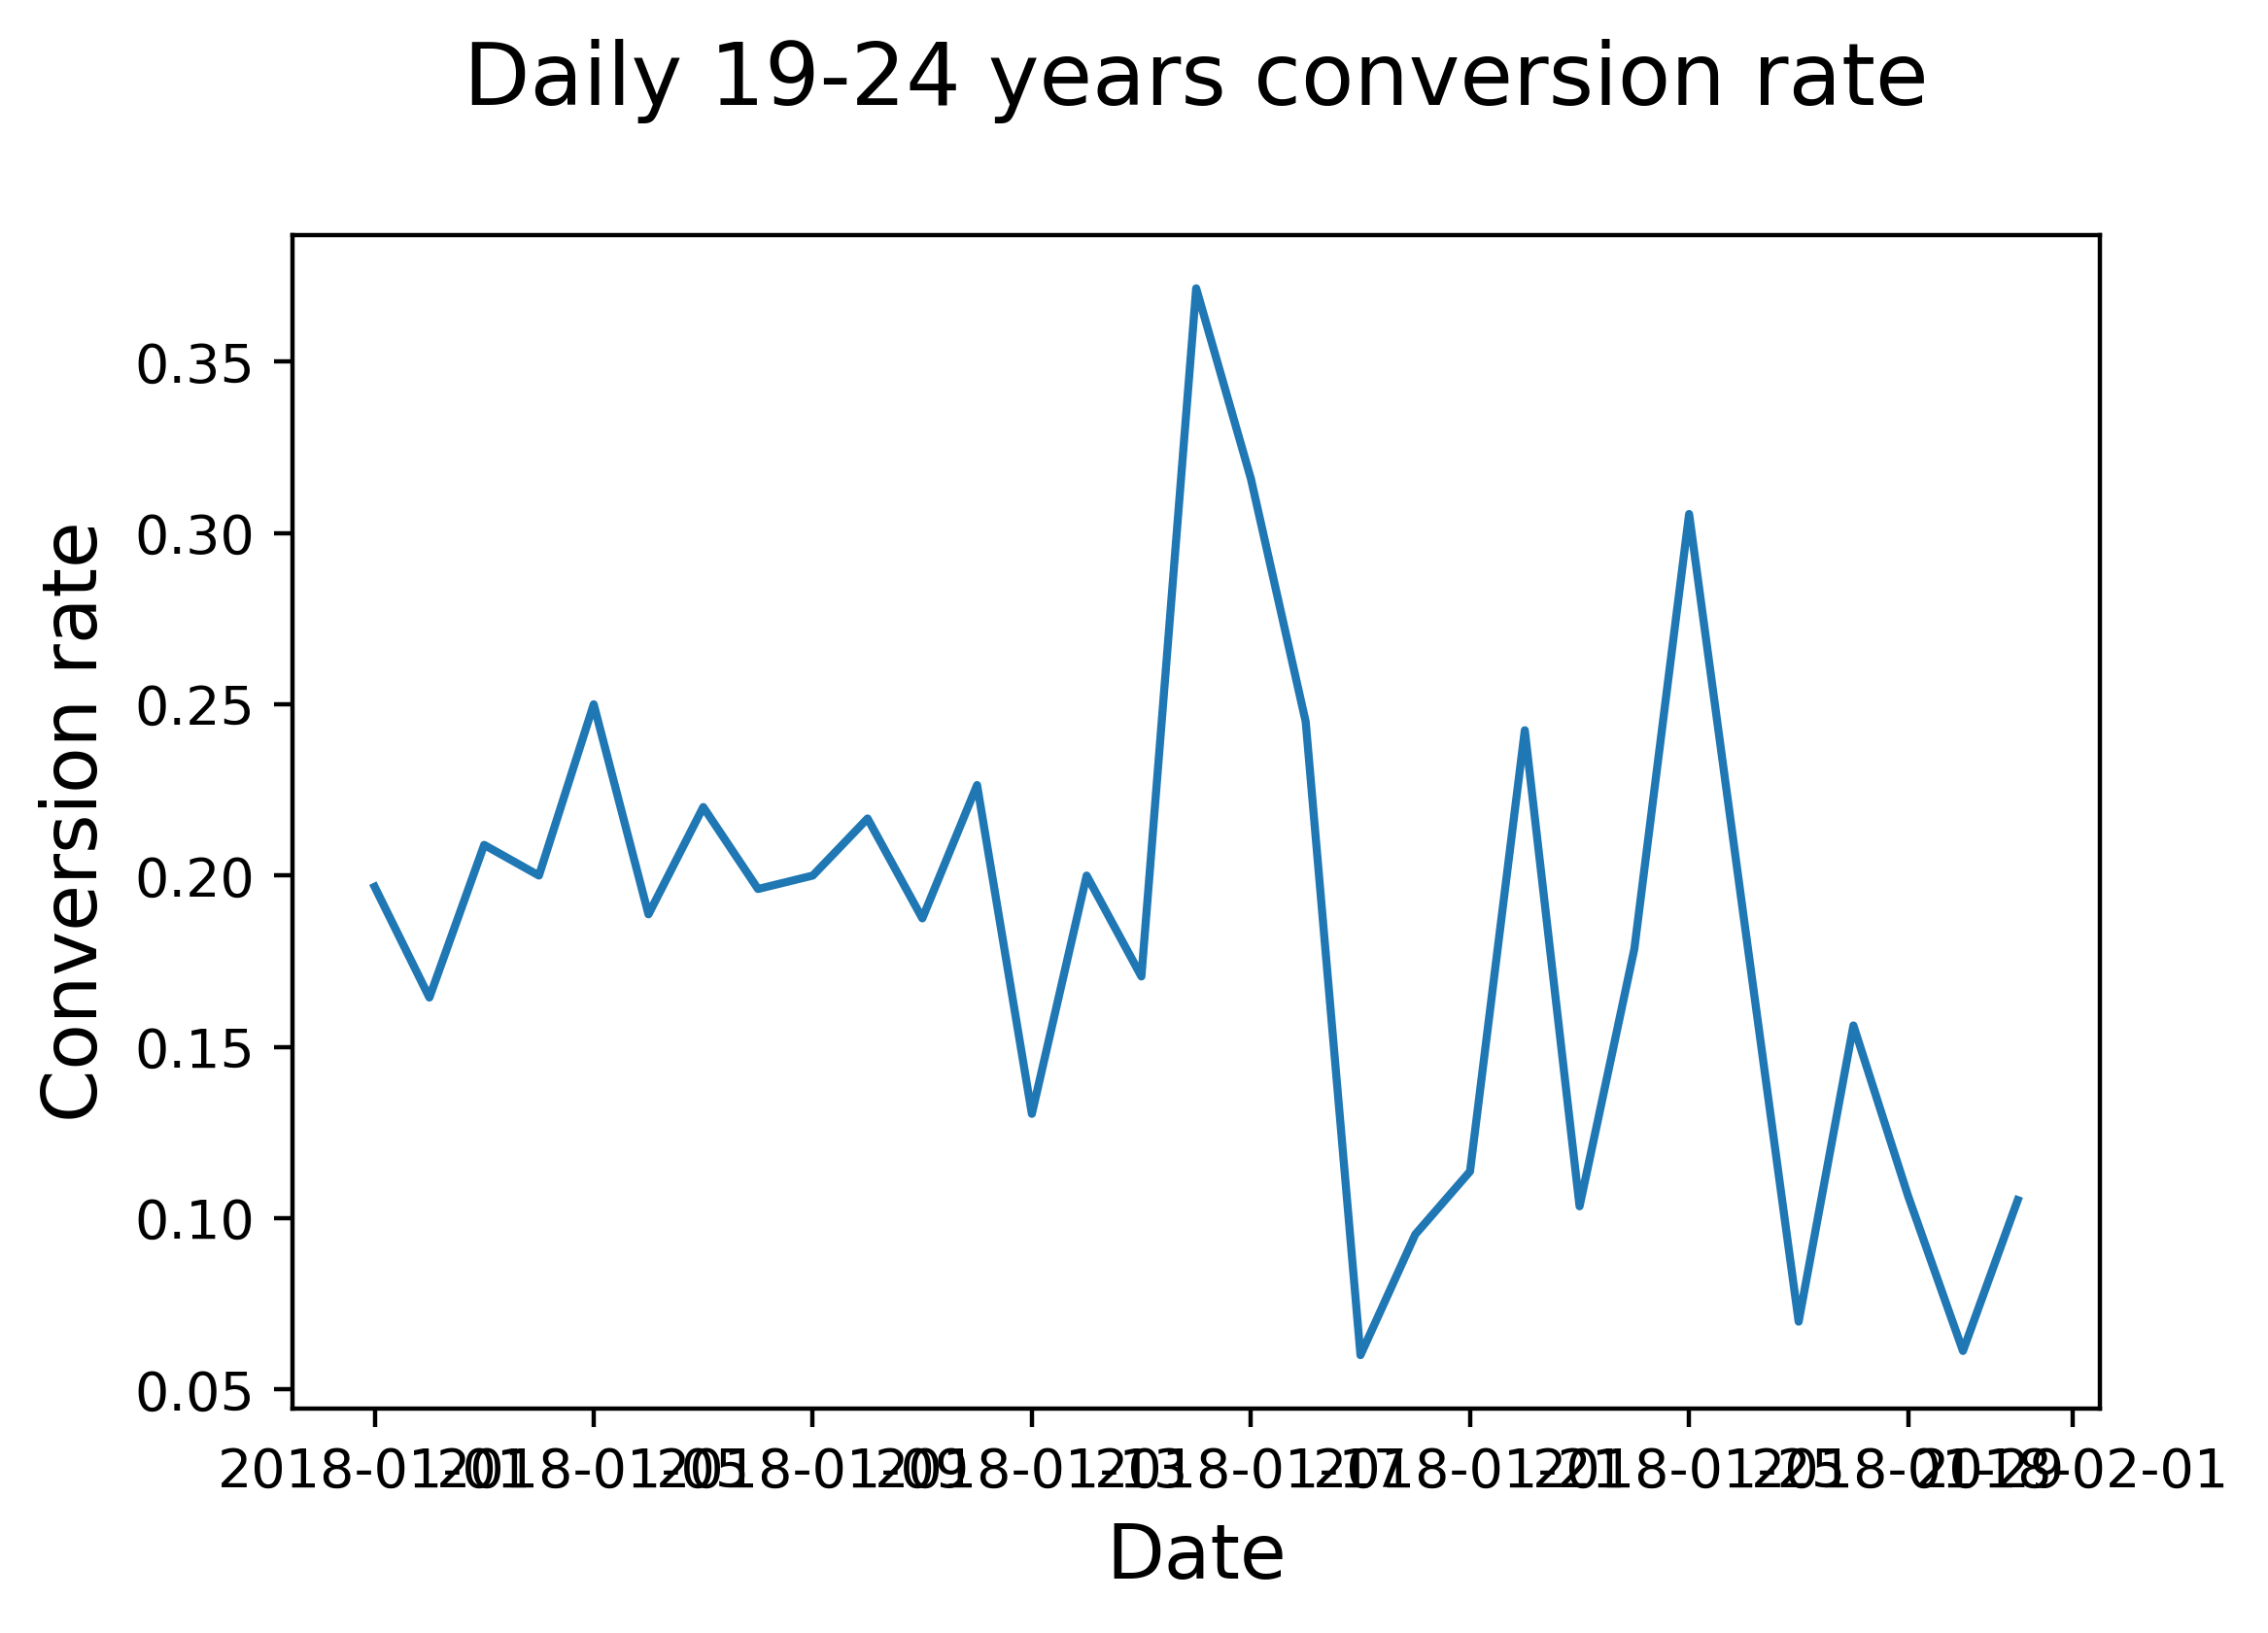

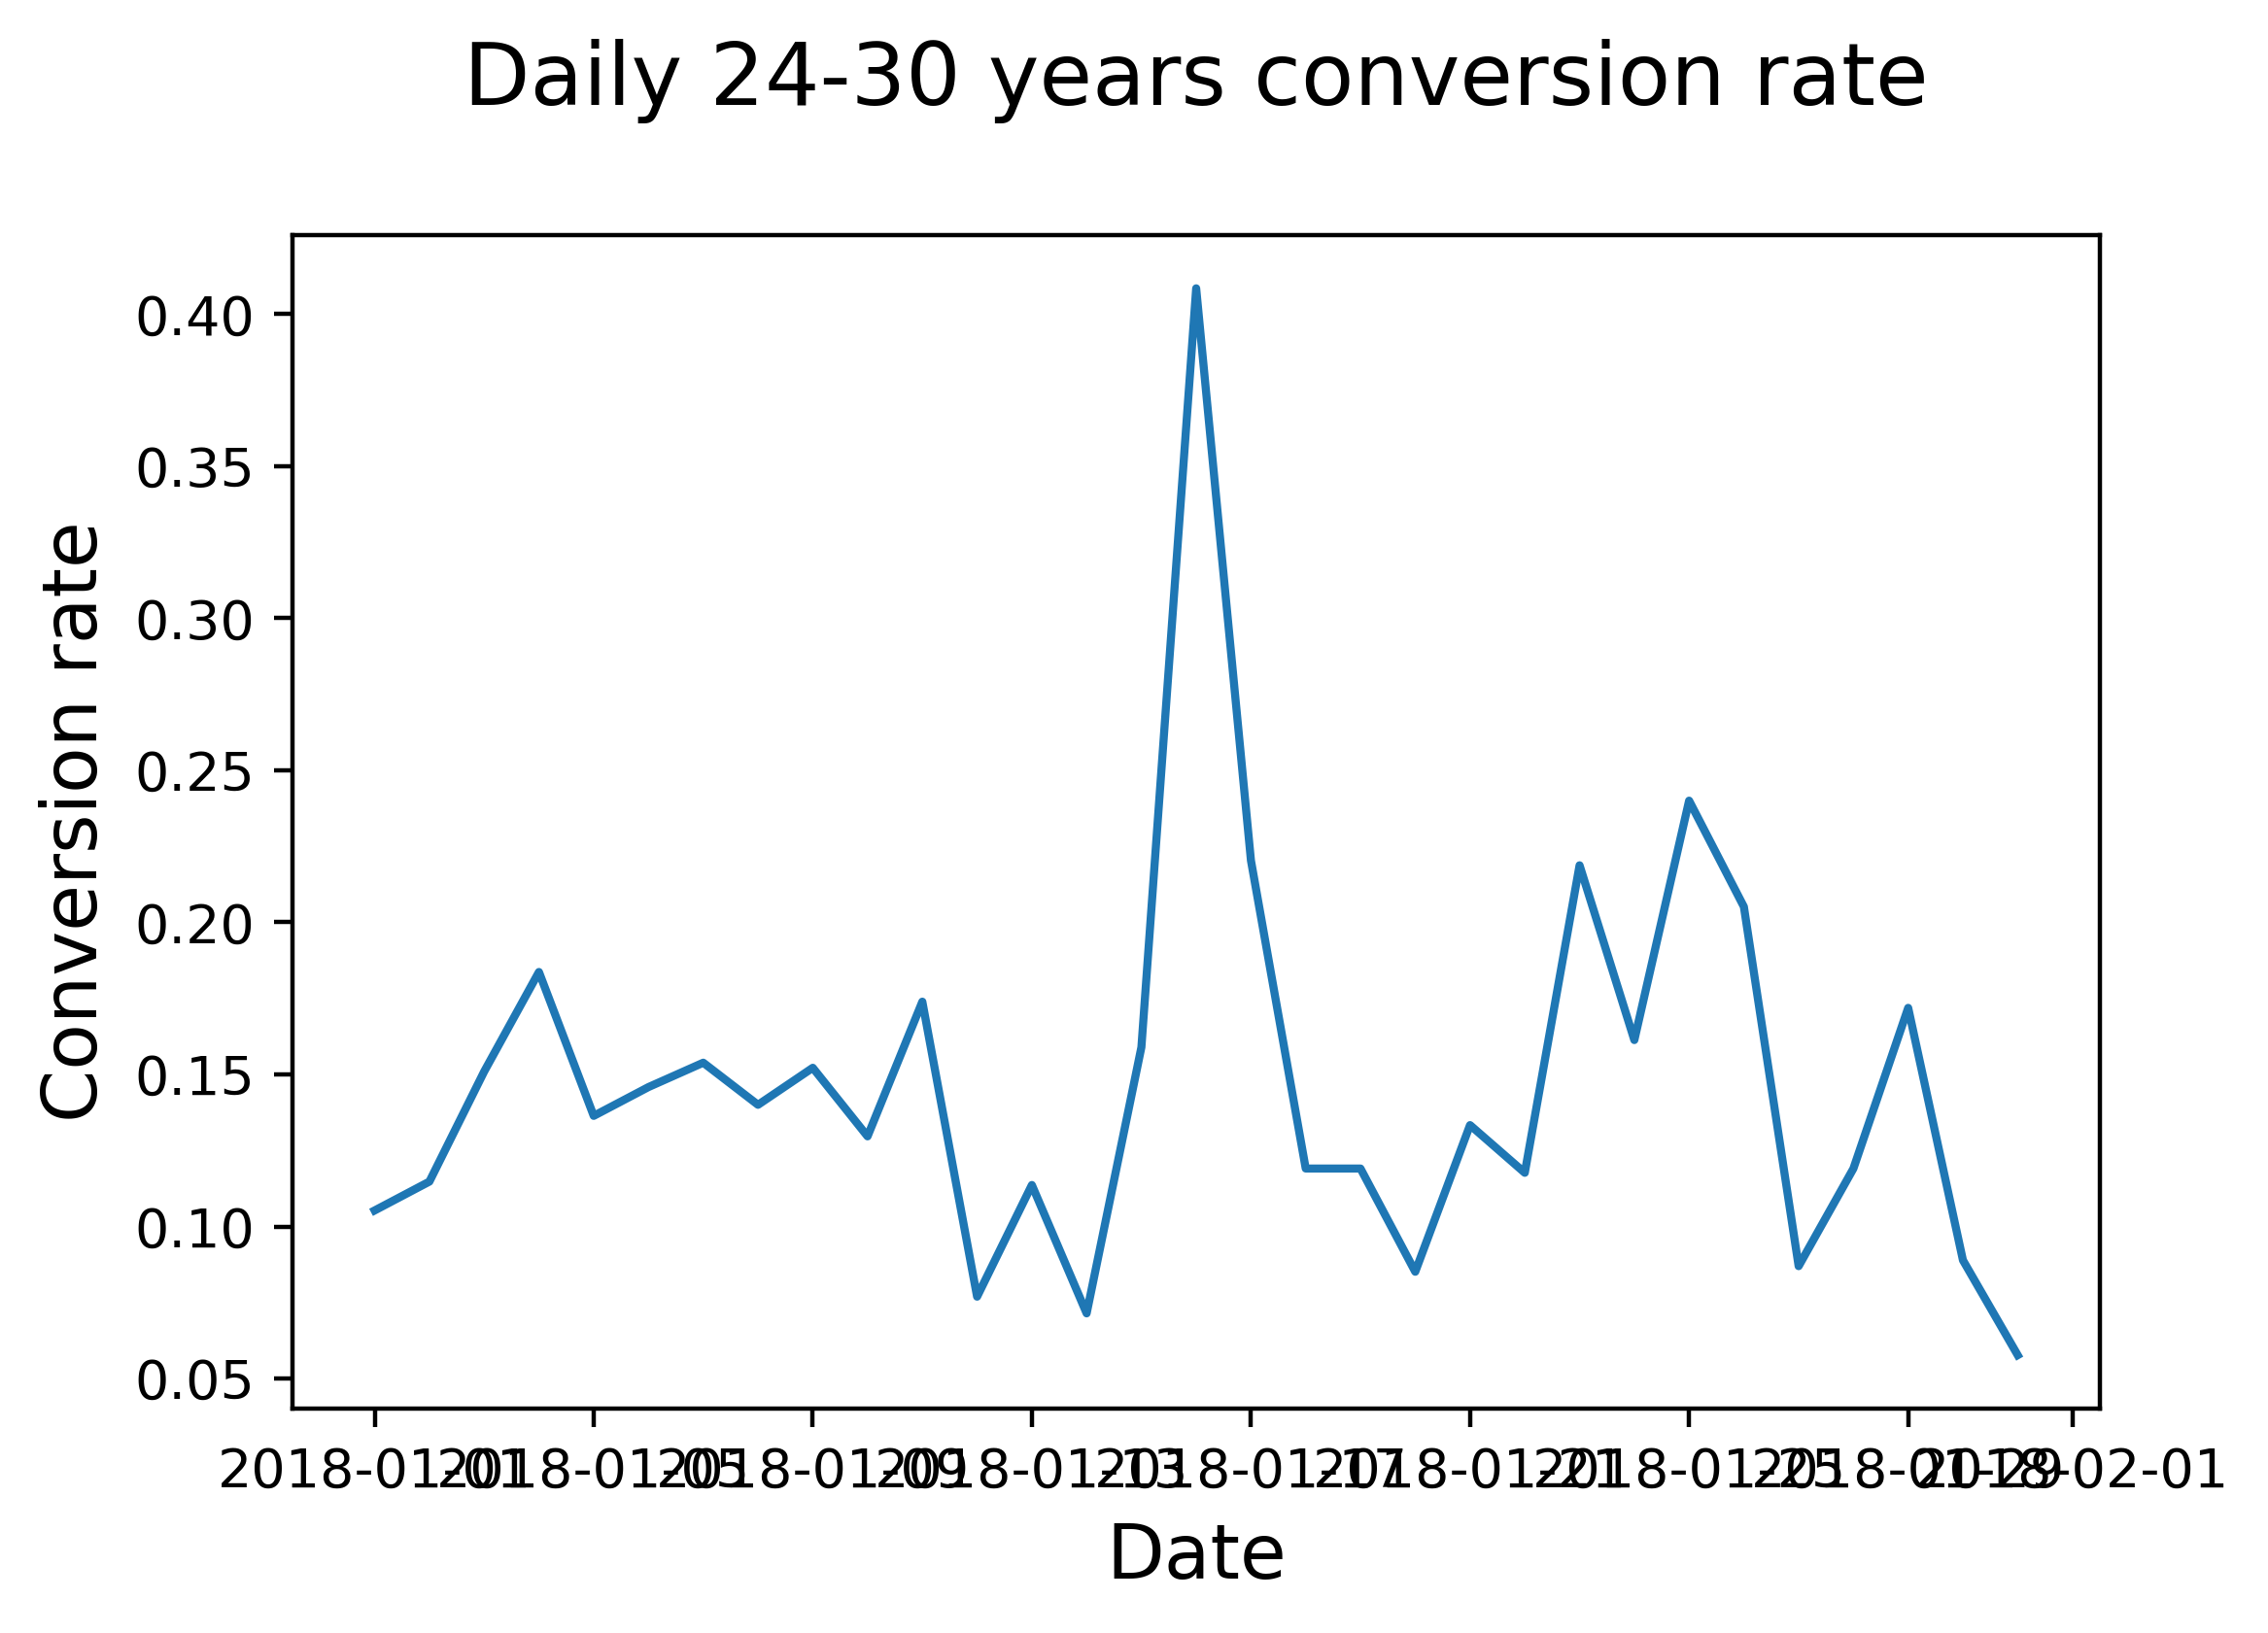

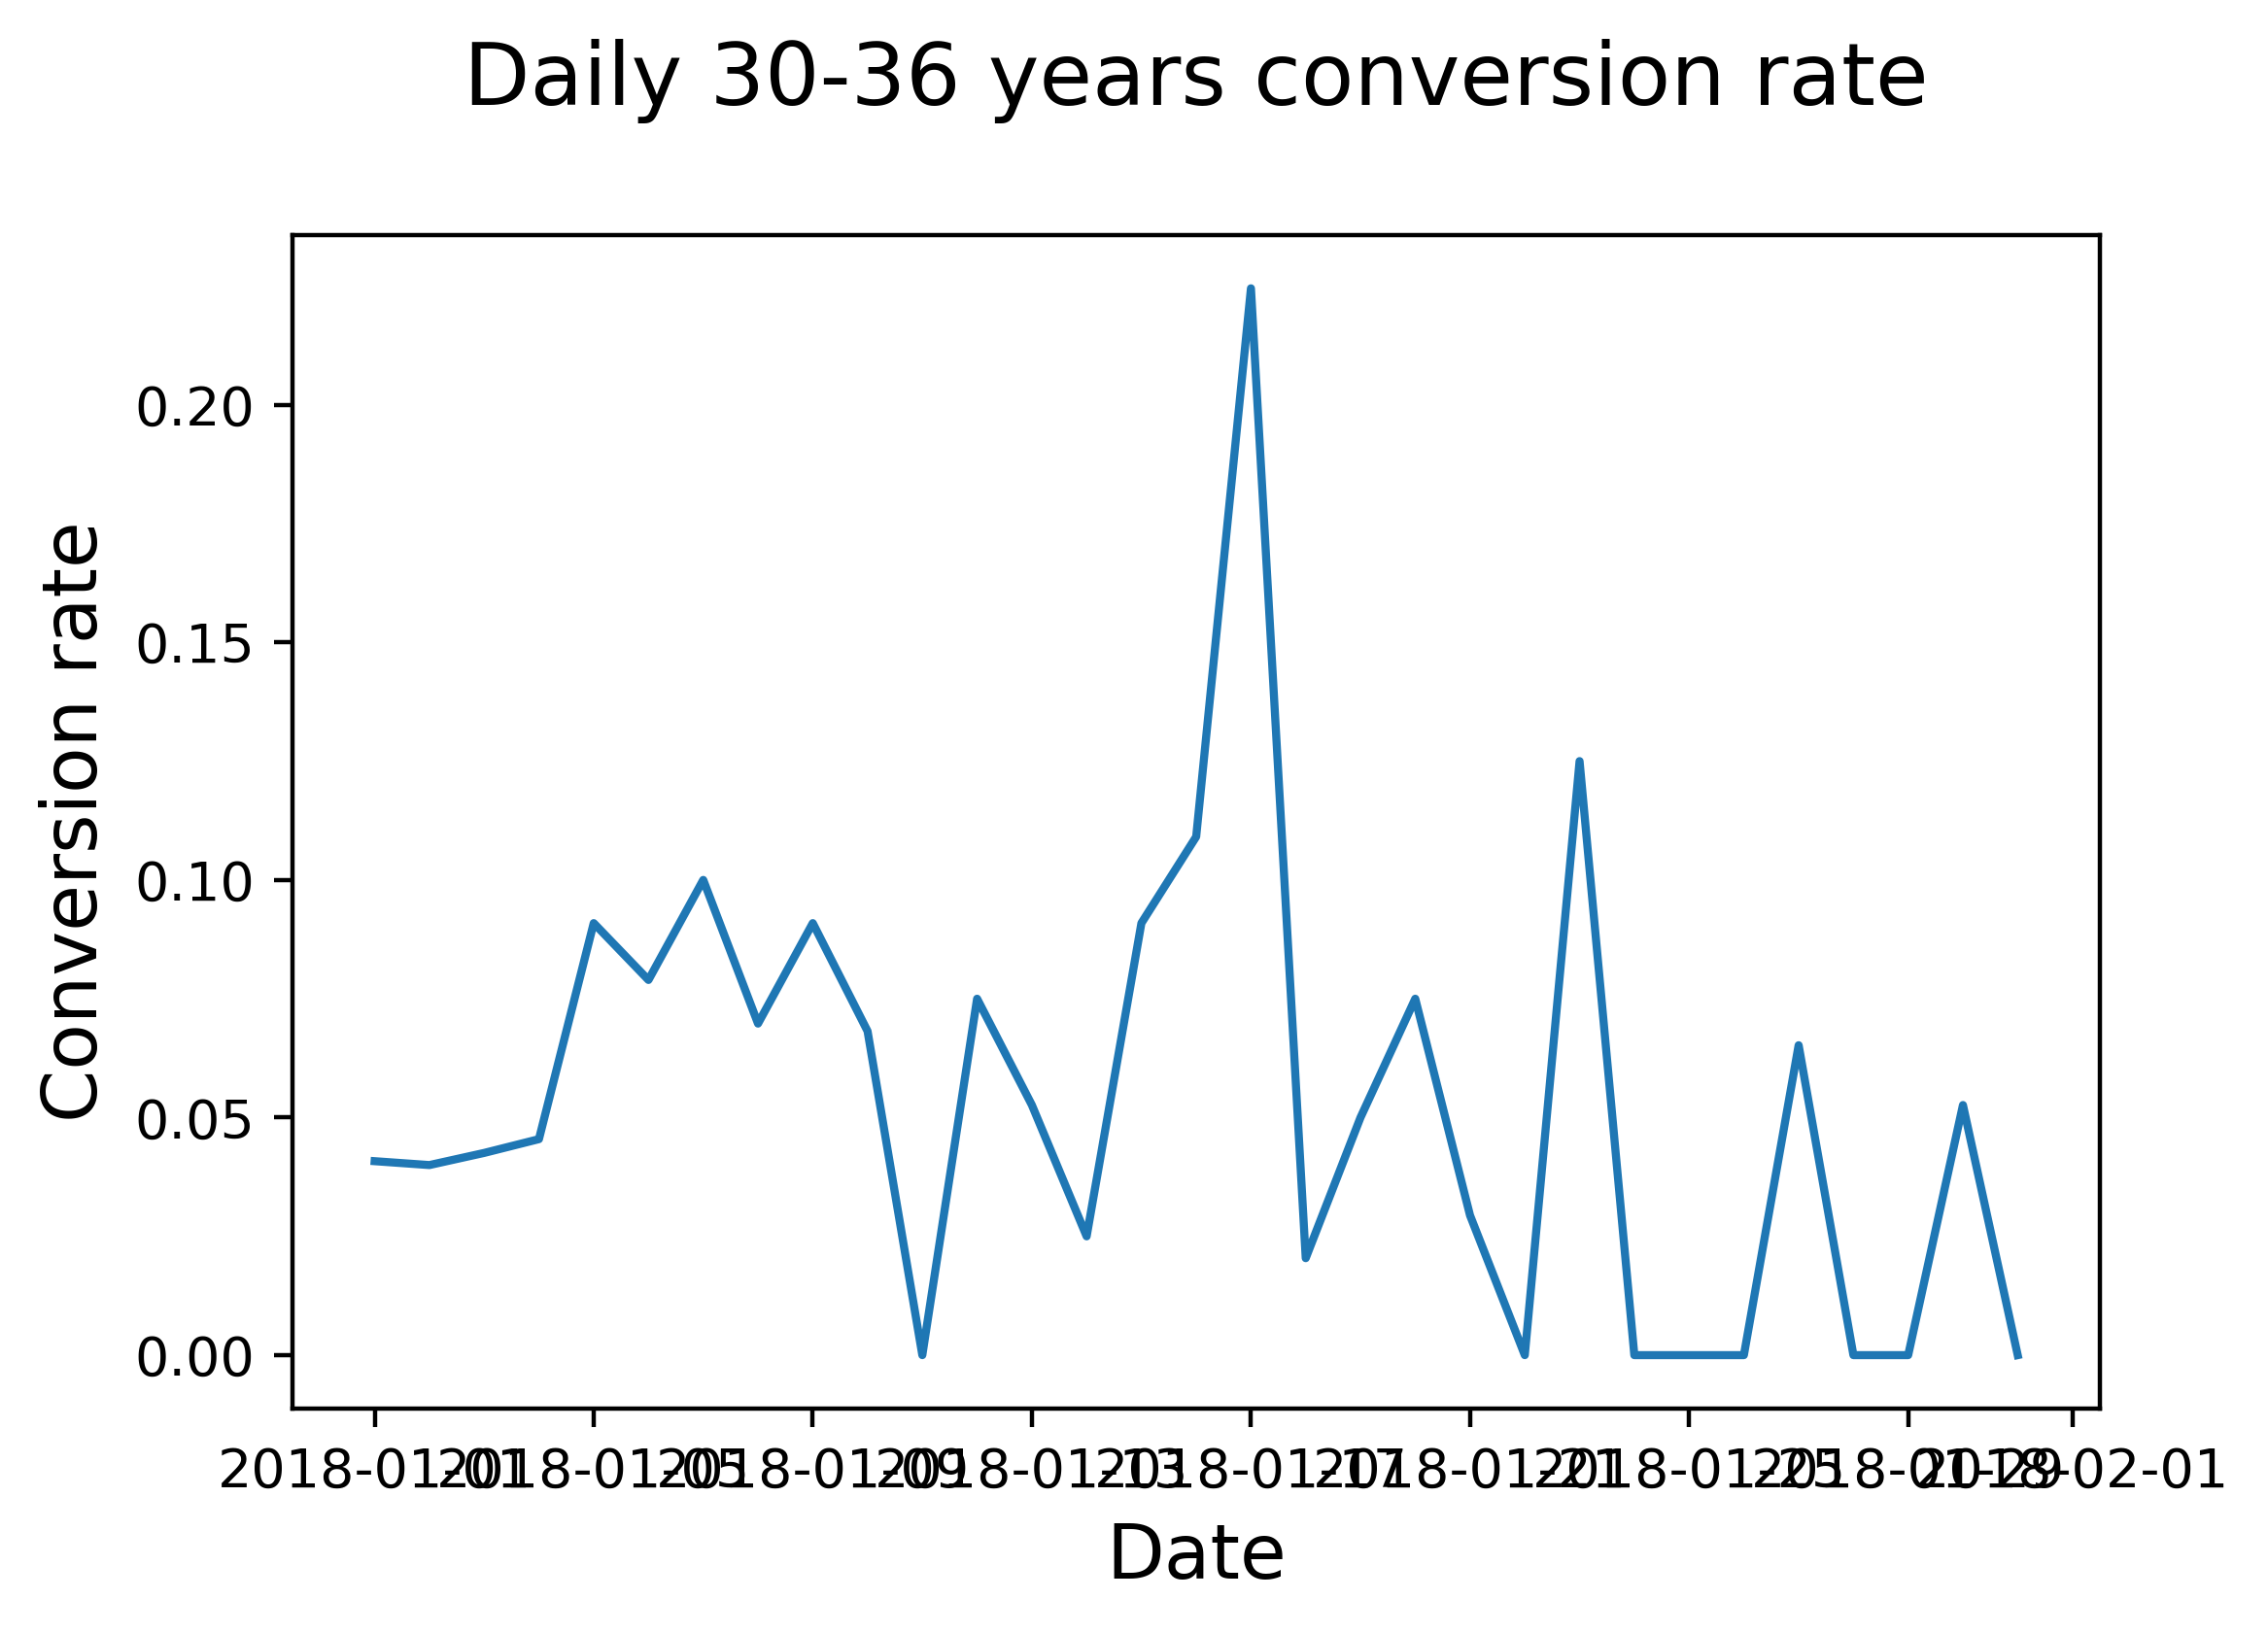

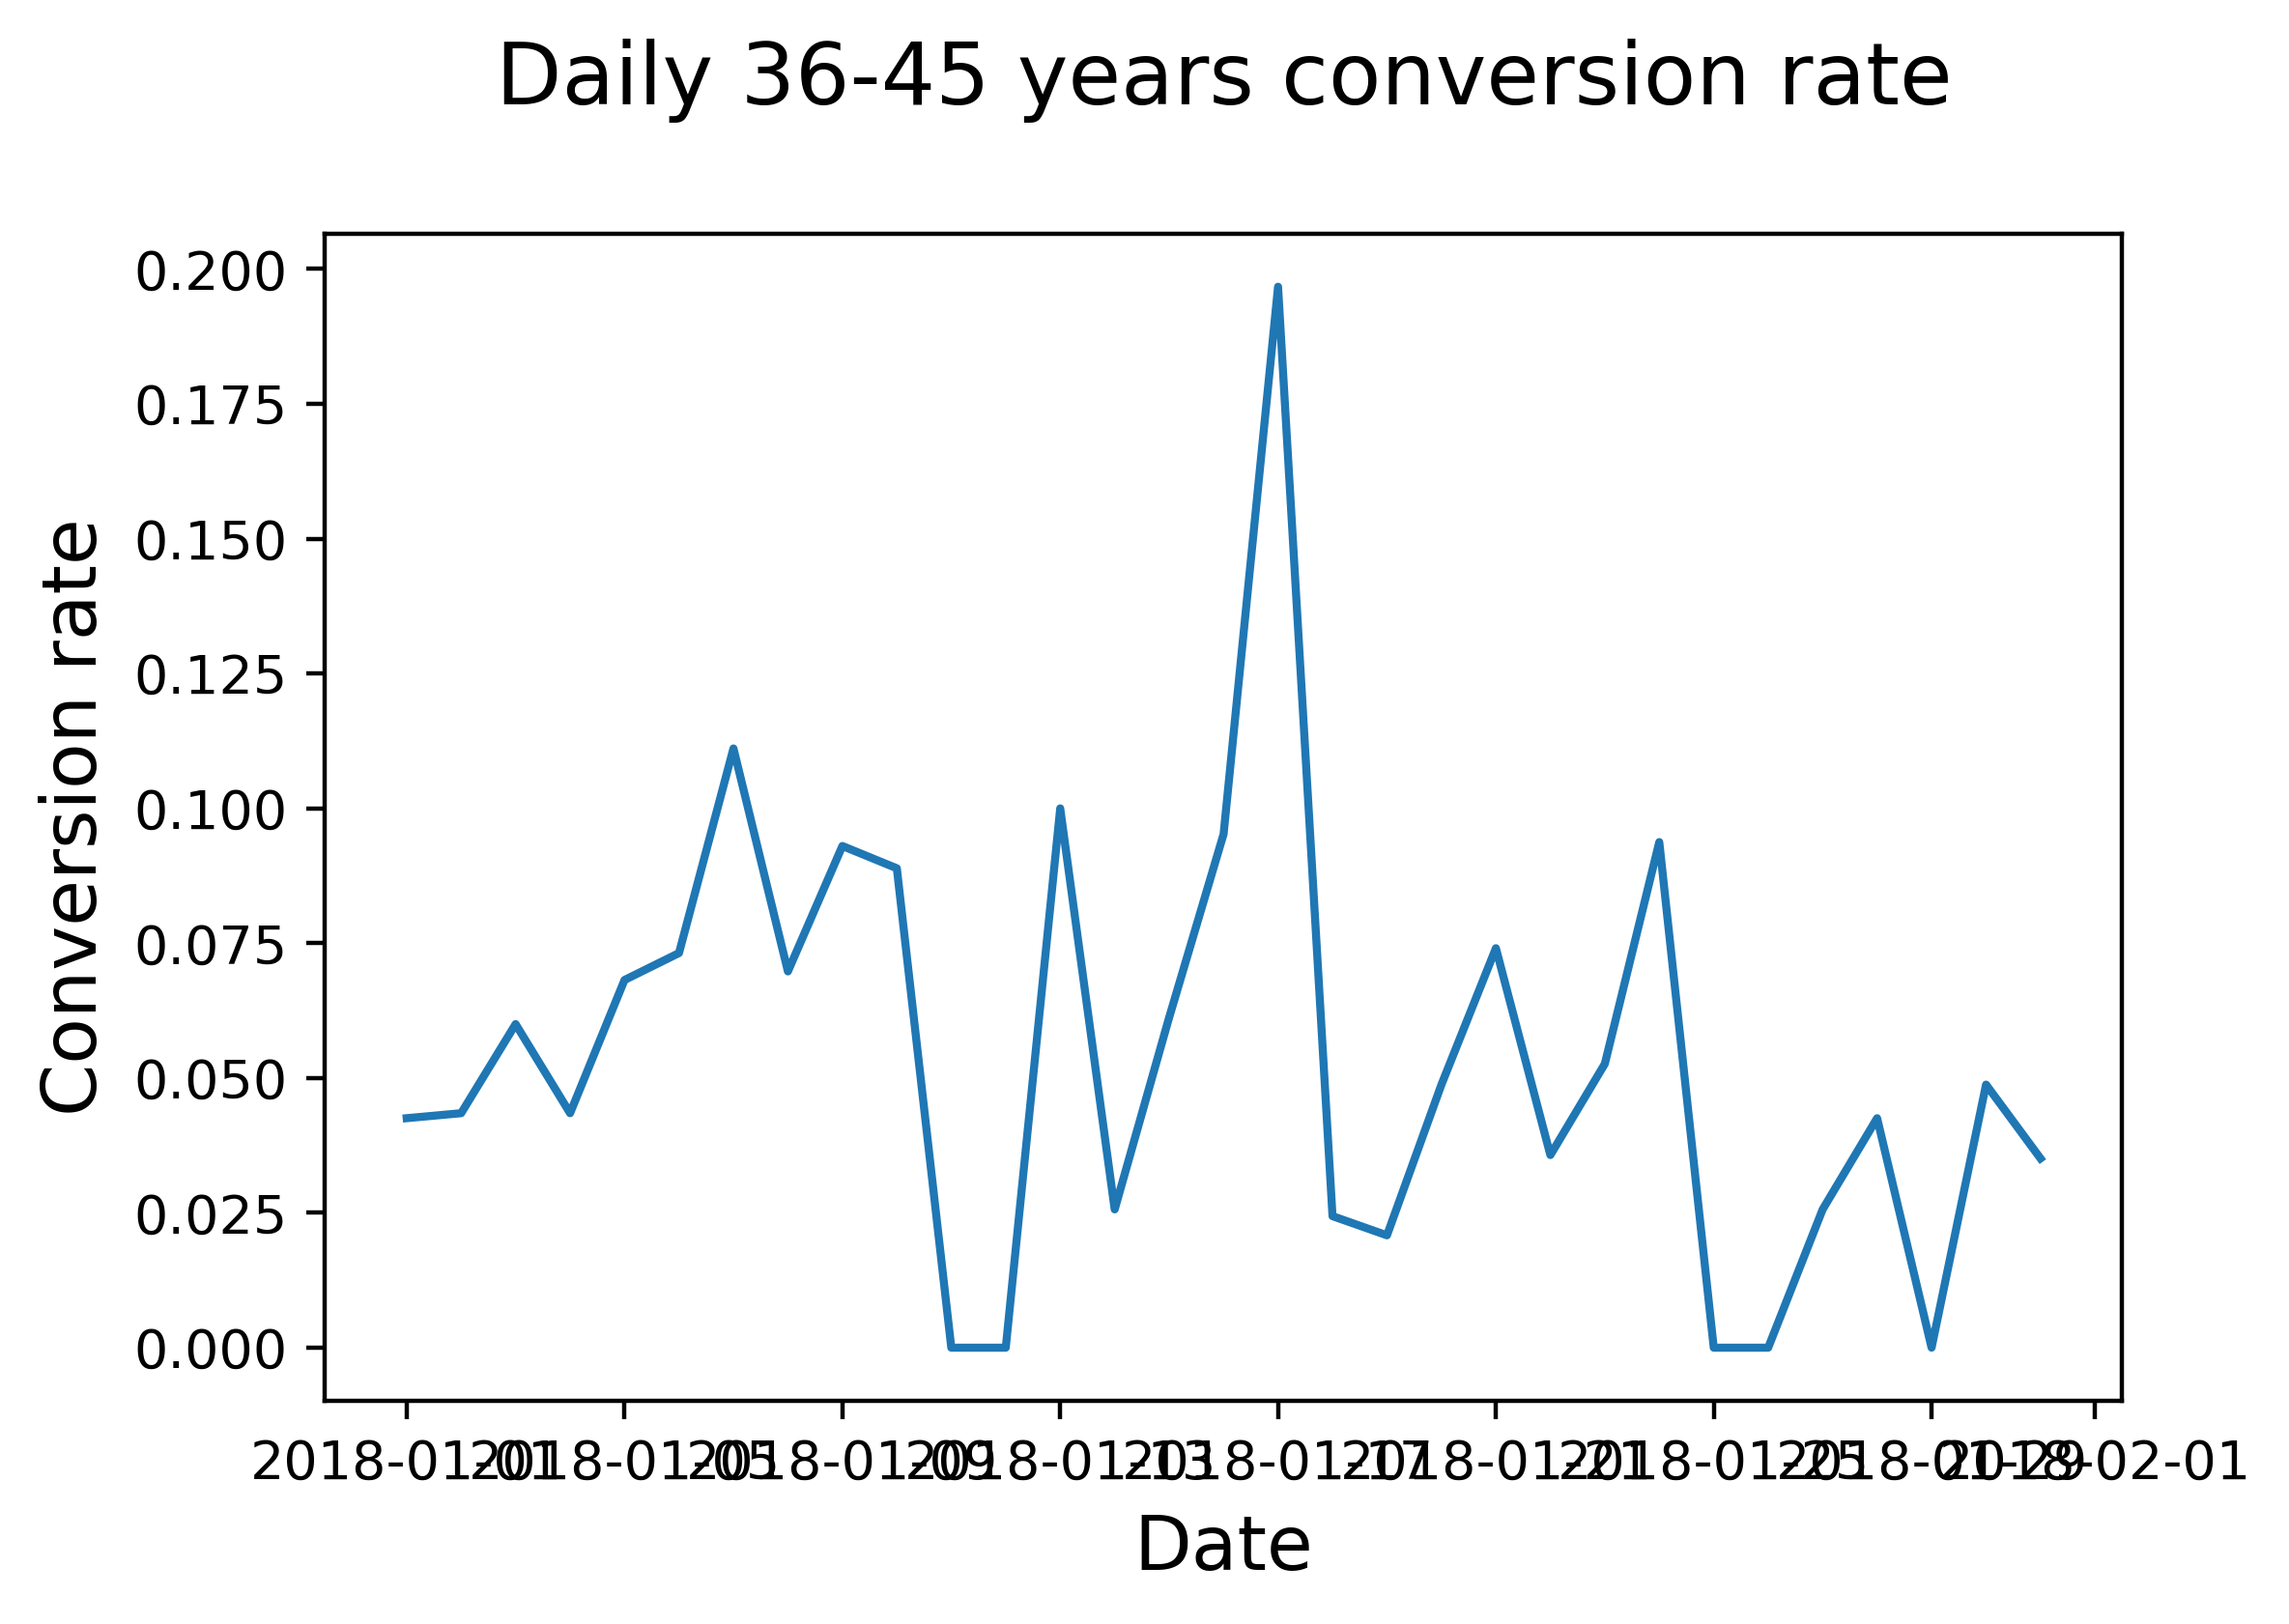

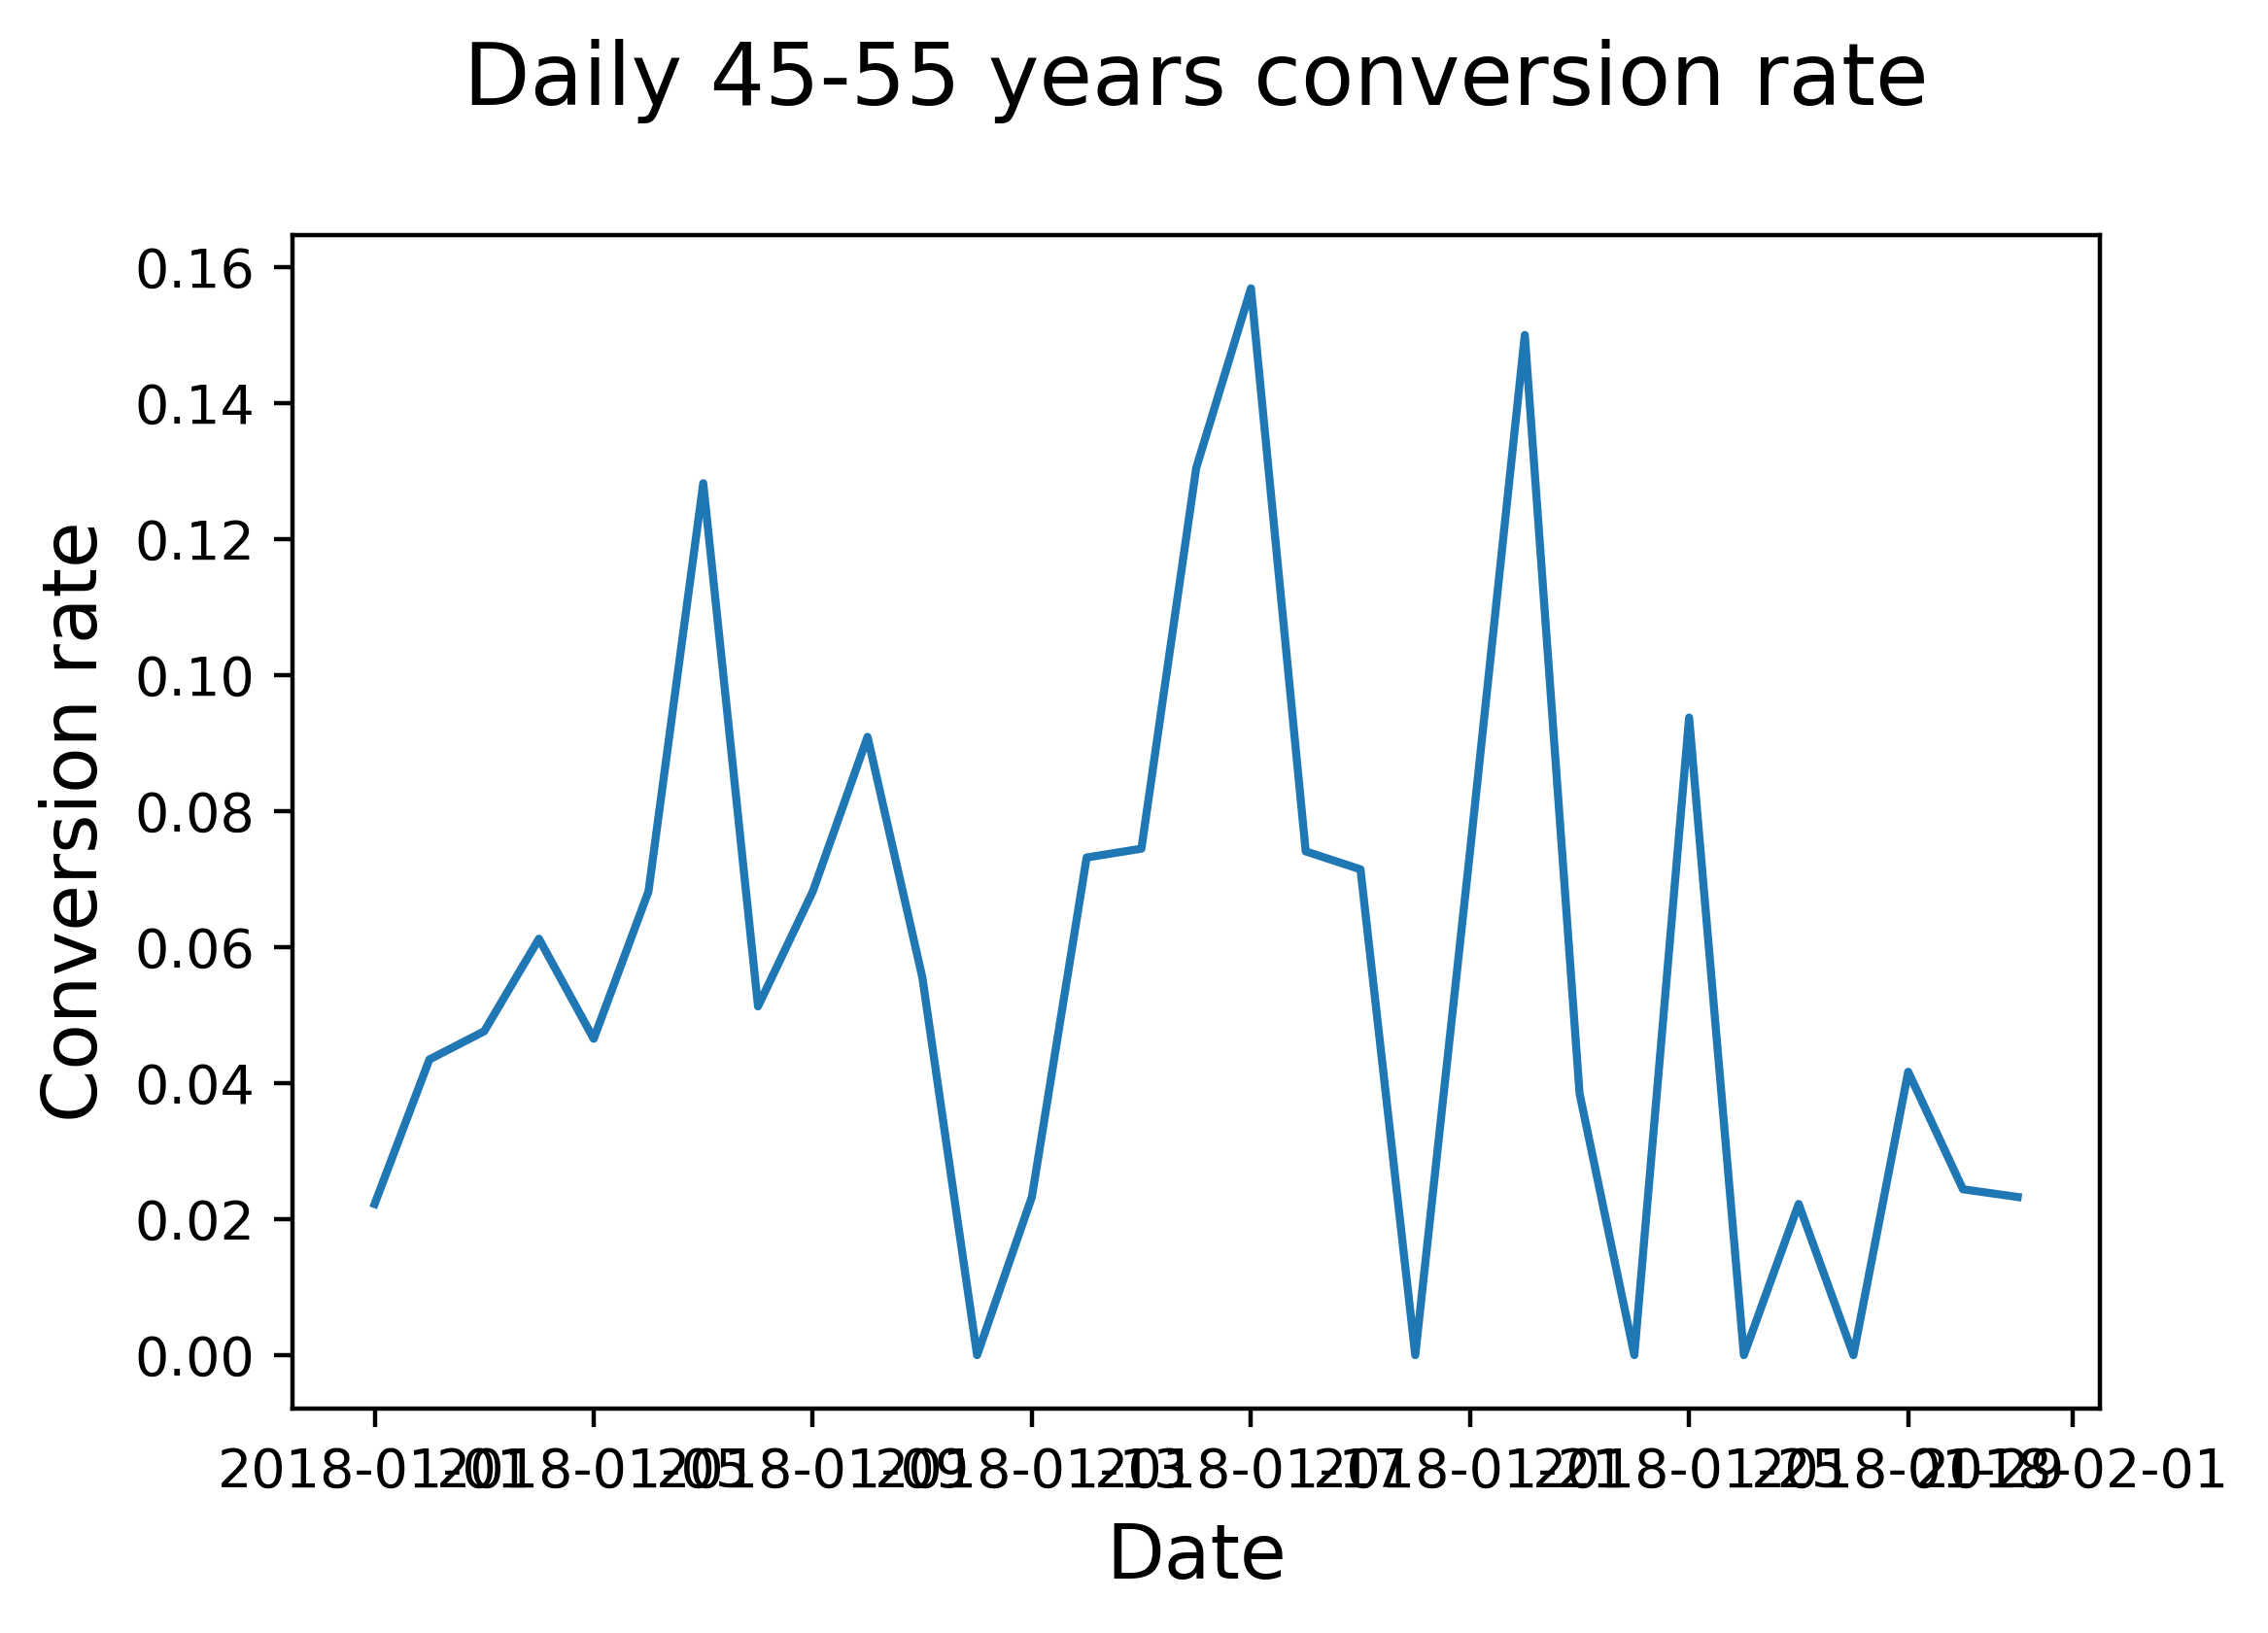

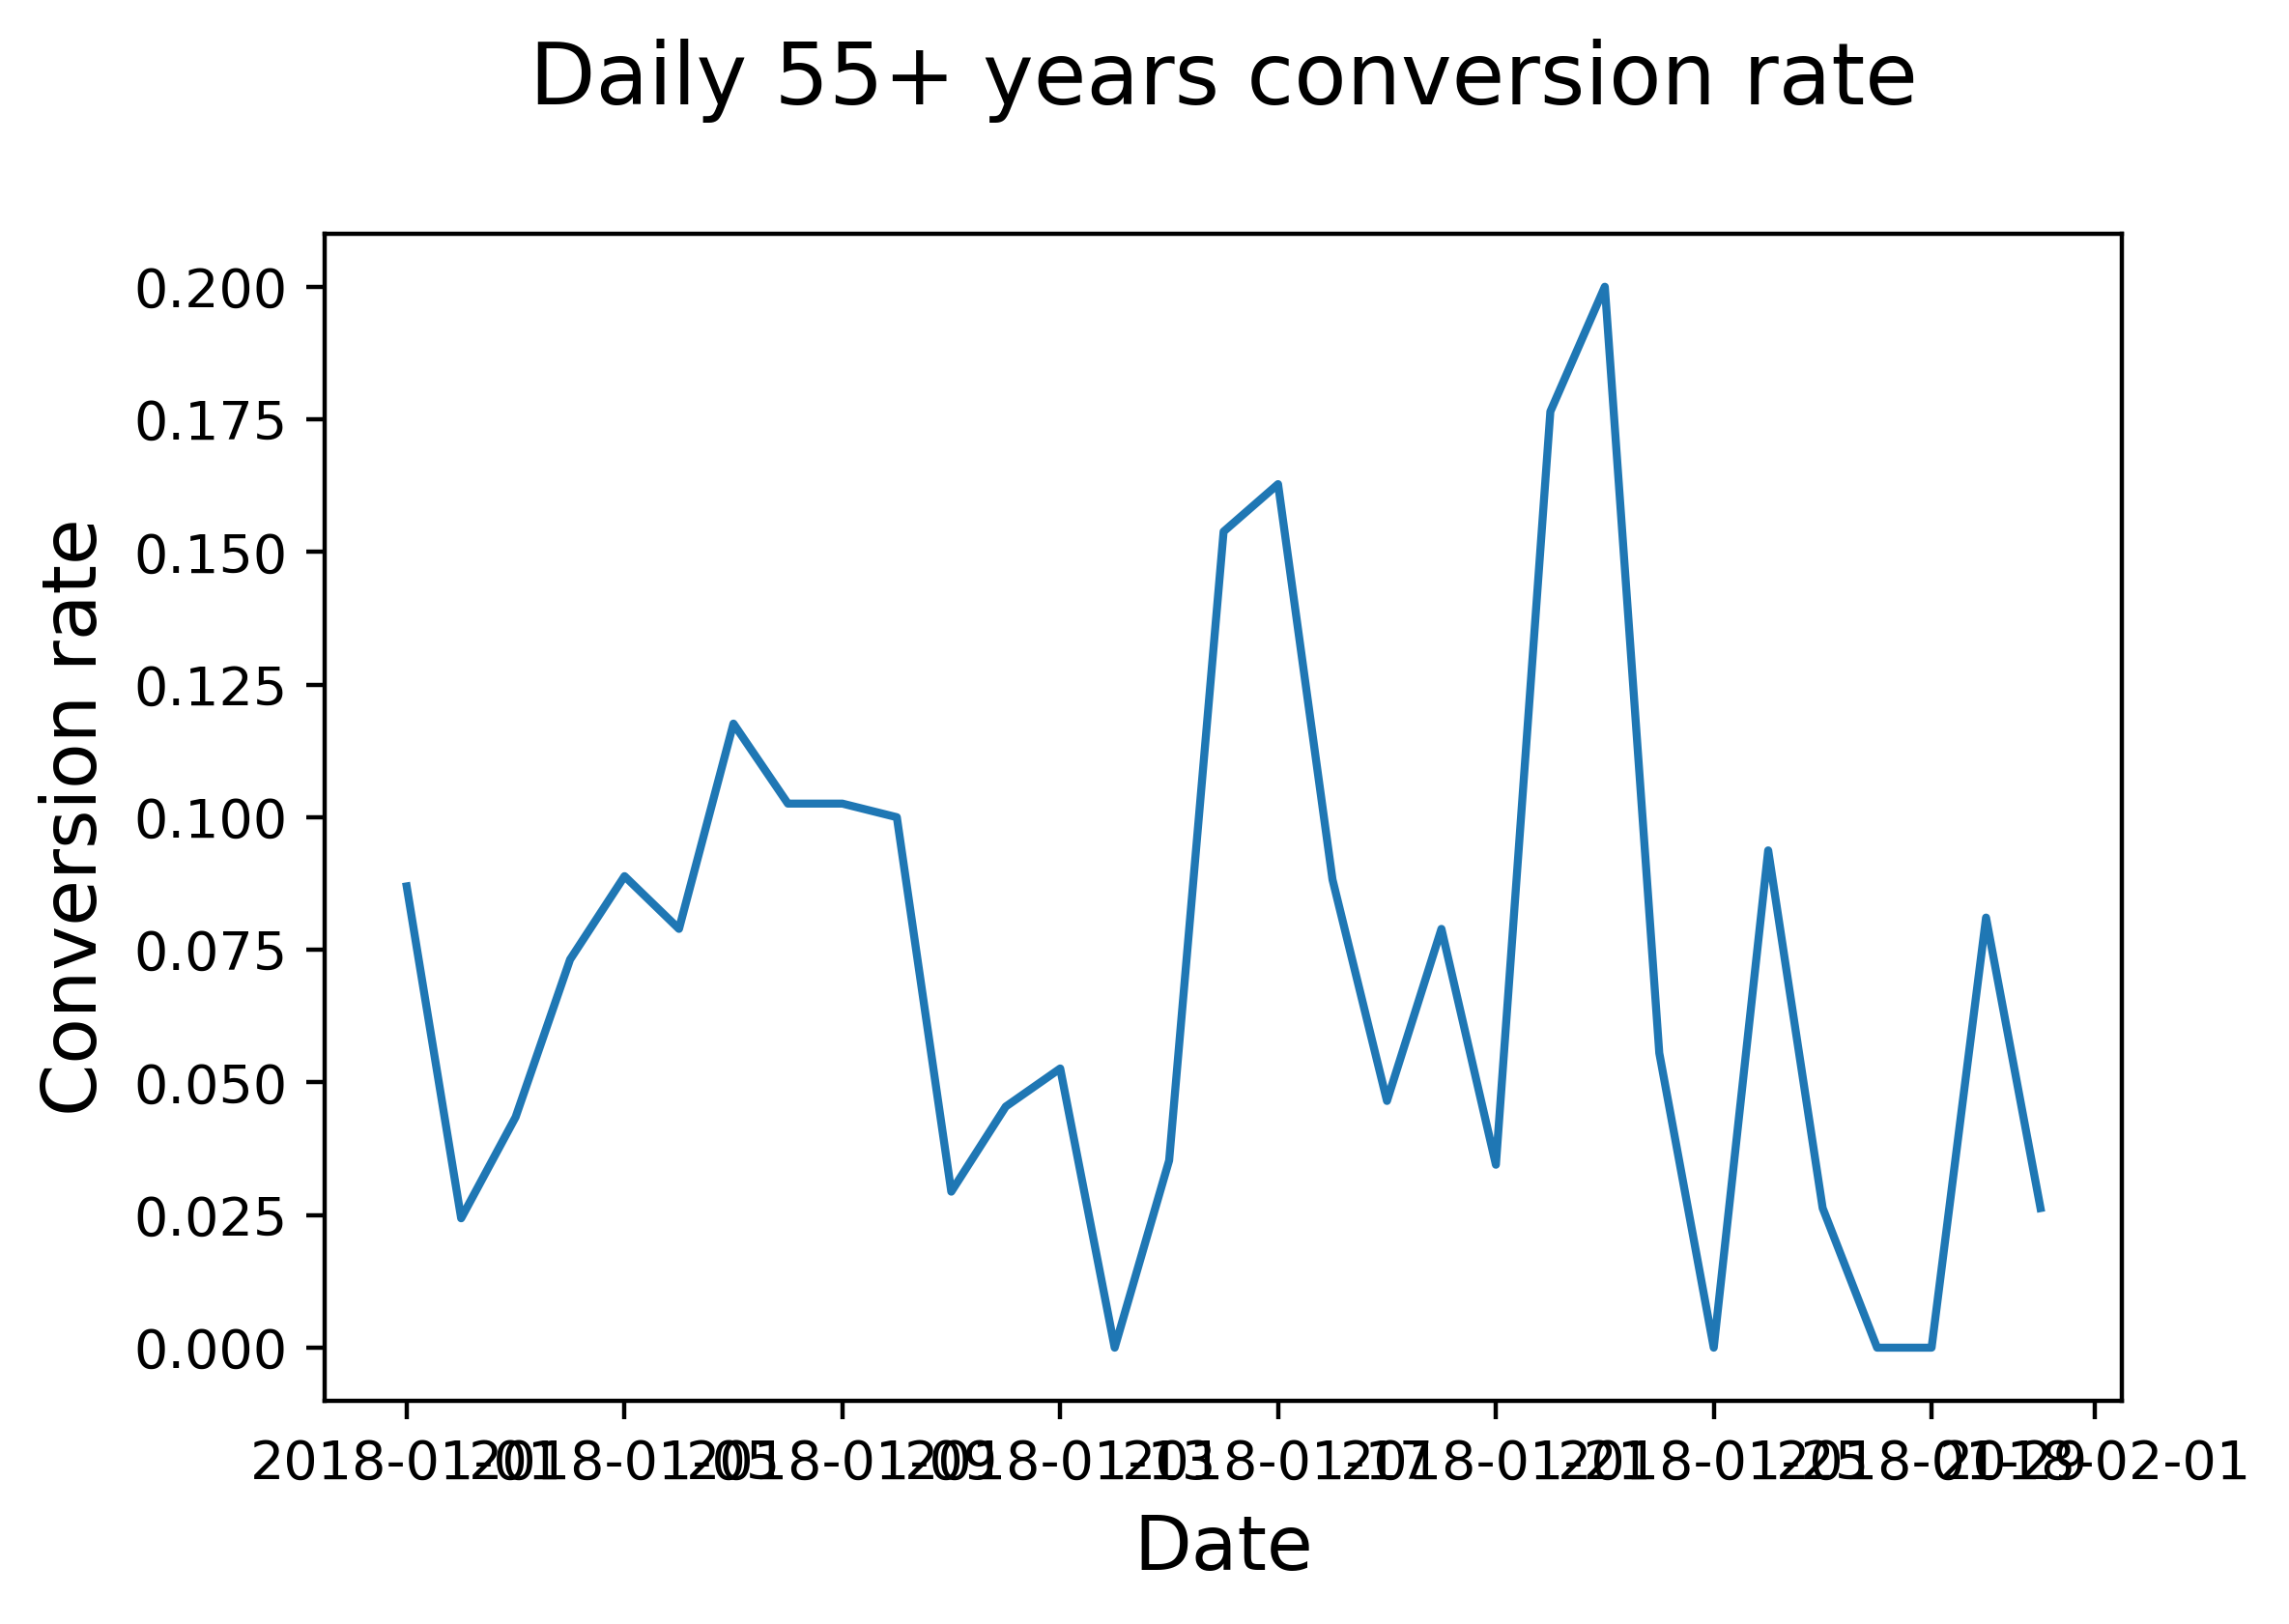

<Figure size 2400x1600 with 0 Axes>

In [17]:
plotting_conv(age_group_df)

In [18]:
import datetime as dt
df['DayofWeek'] = df['date_subscribed'].dt.dayofweek

In [19]:
DoW_retention = retention_rate(df, ['DayofWeek'])

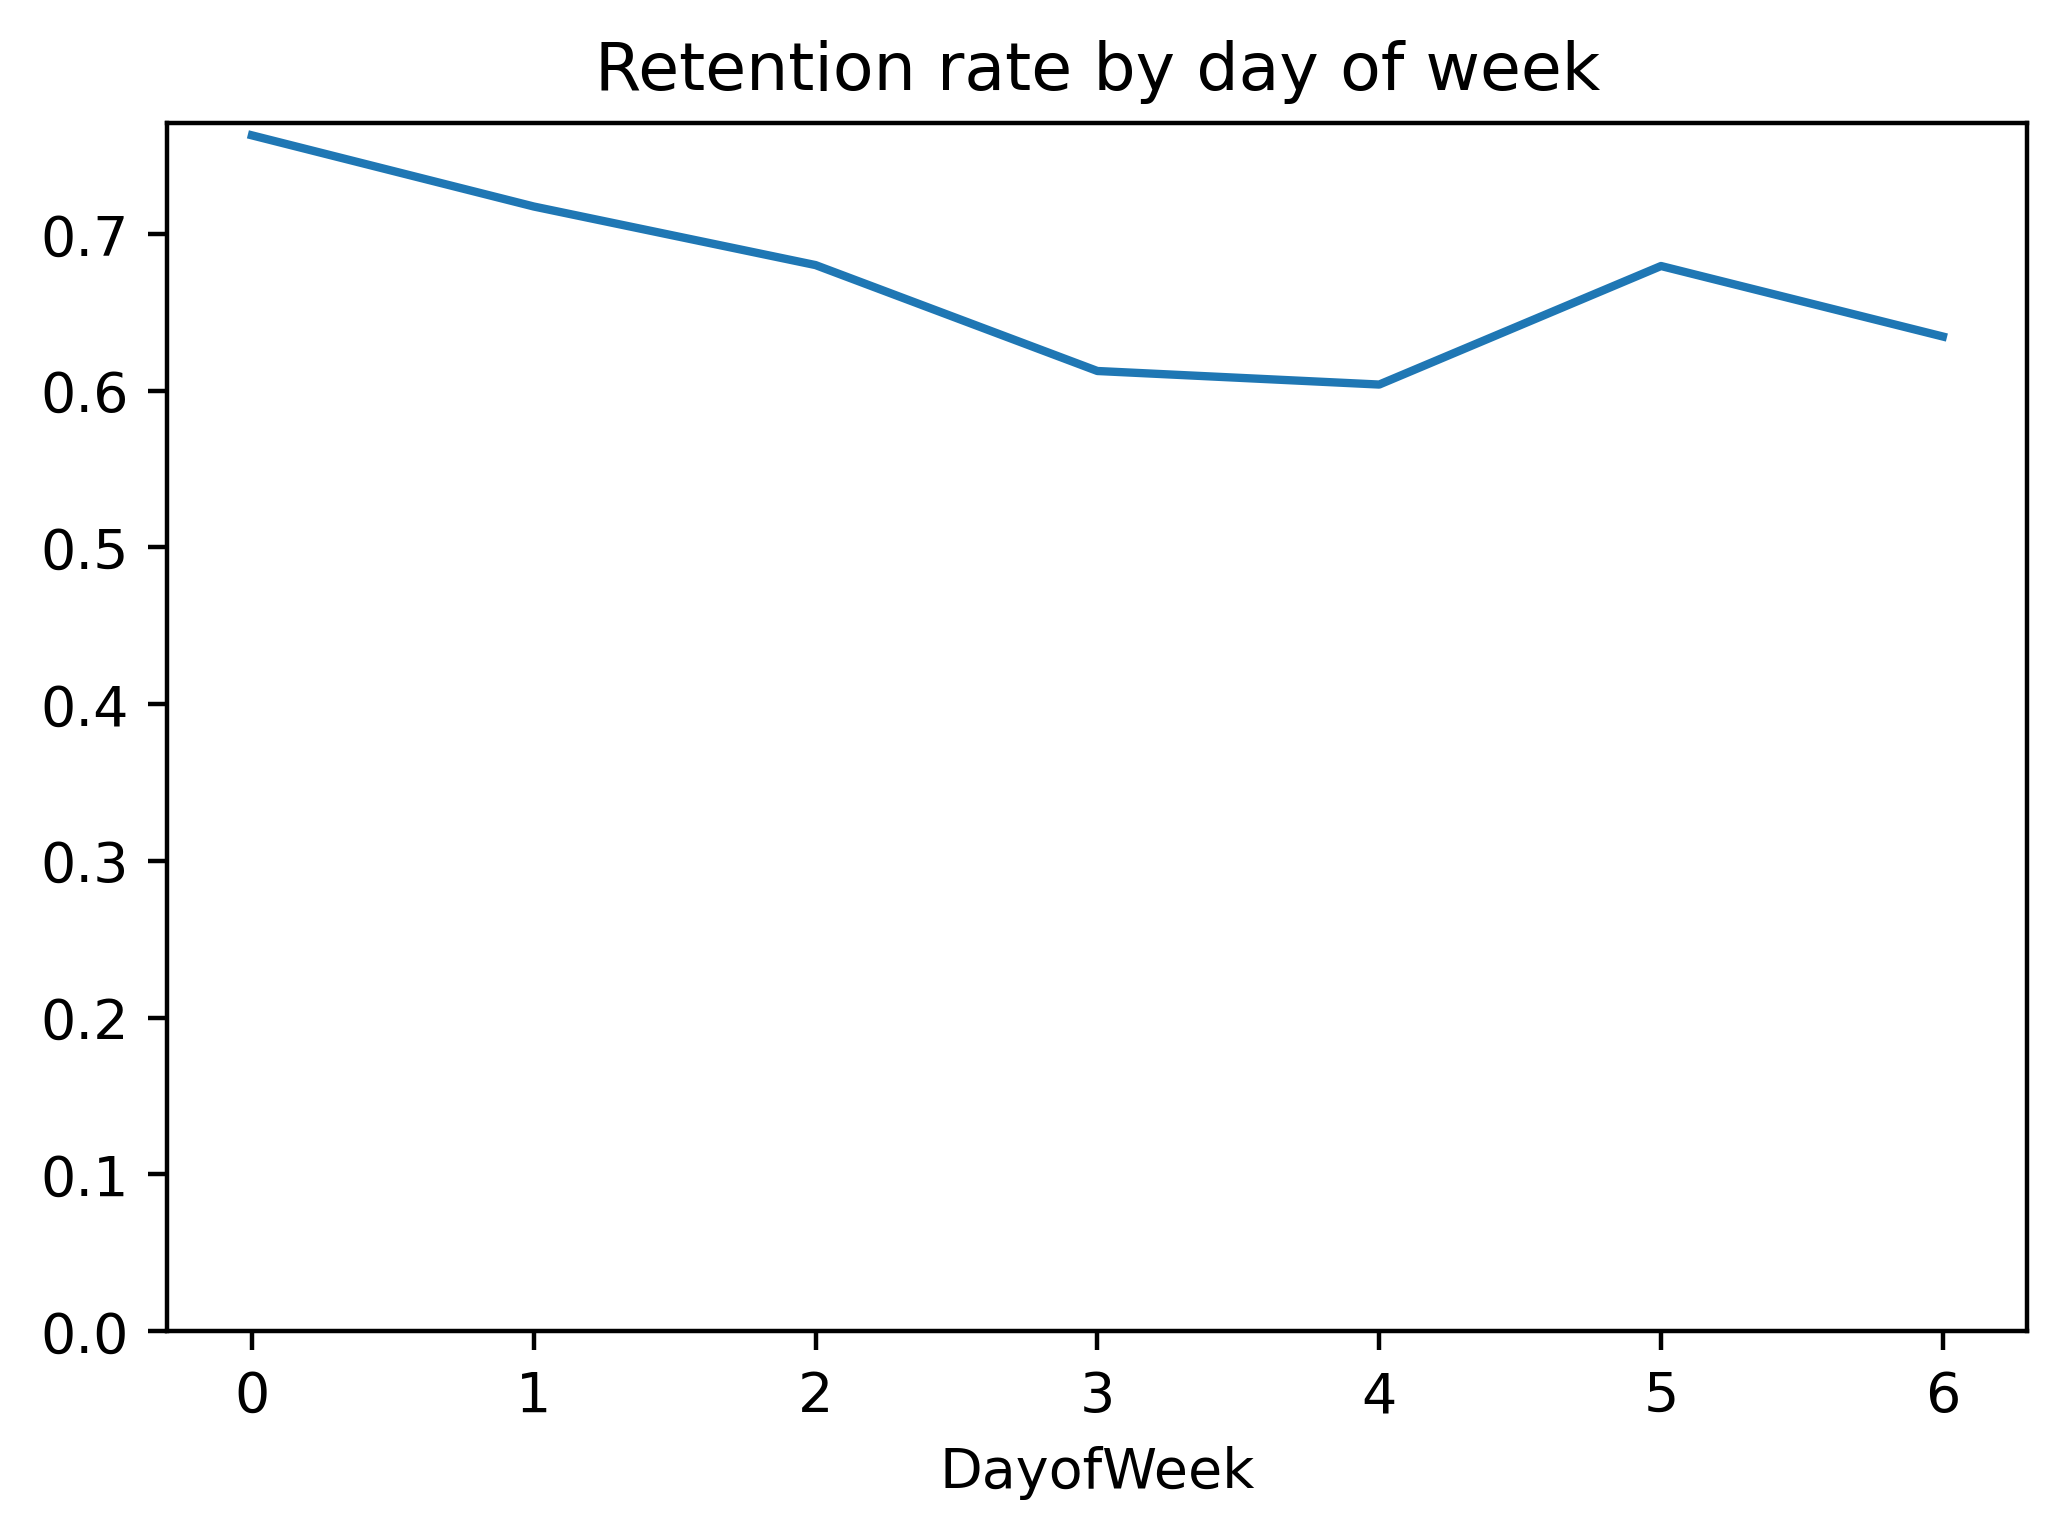

In [20]:
DoW_retention.plot()
plt.title('Retention rate by day of week')
plt.ylim(0)
plt.show()

In [22]:
df.head()

user_id date_served marketing_channel          variant converted  \
0  a100000029  2018-01-01         House Ads  personalization      True   
1  a100000030  2018-01-01         House Ads  personalization      True   
2  a100000031  2018-01-01         House Ads  personalization      True   
3  a100000032  2018-01-01         House Ads  personalization      True   
4  a100000033  2018-01-01         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years      2018-01-01   
1            English            English  19-24 years      2018-01-01   
2            English            English  24-30 years      2018-01-01   
3            English            English  30-36 years      2018-01-01   
4            English            English  36-45 years      2018-01-01   

  date_canceled subscribing_channel  is_retained  channel_code  DayofWeek  
0           NaT           House Ads         True           1.0        0.0  
1           NaT           House Ads         True           1.0        0.0  
2           NaT           House Ads         True           1.0        0.0  
3           NaT           House Ads         True           1.0        0.0  
4           NaT           House Ads         True           1.0        0.0

In [27]:
daily_conv_channel = conversion_rate(df, ['date_served', 'marketing_channel'])

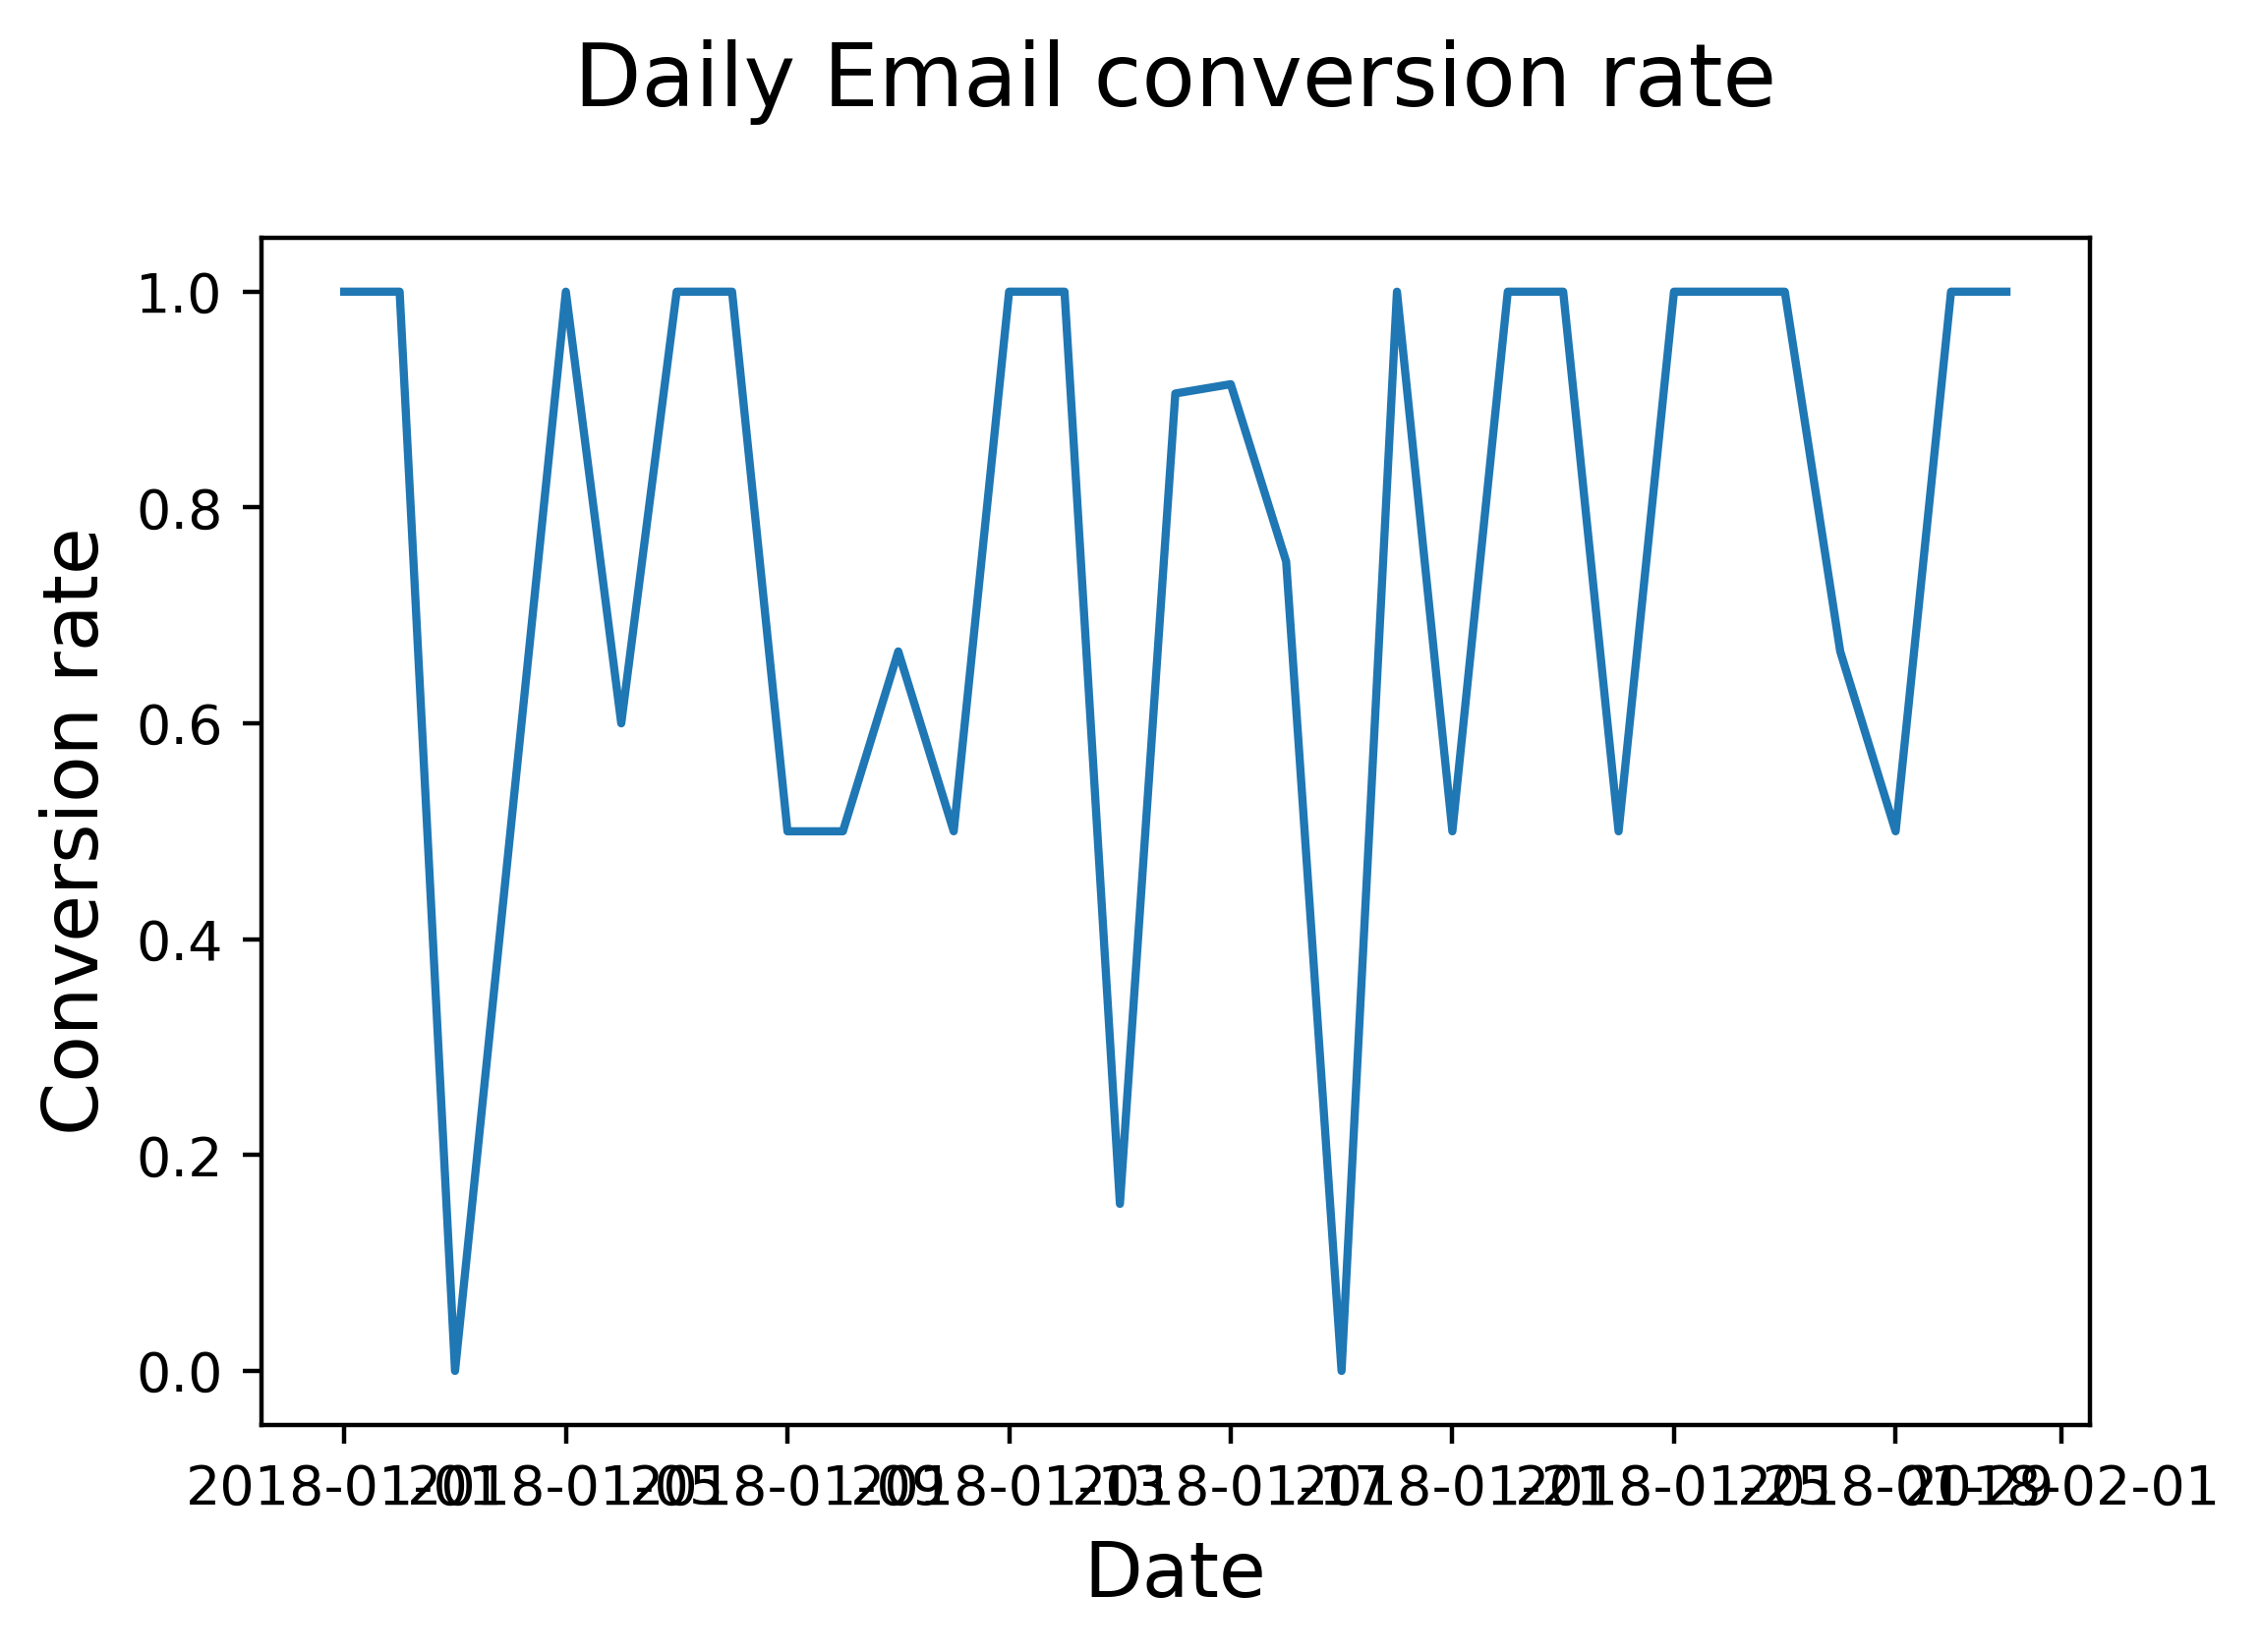

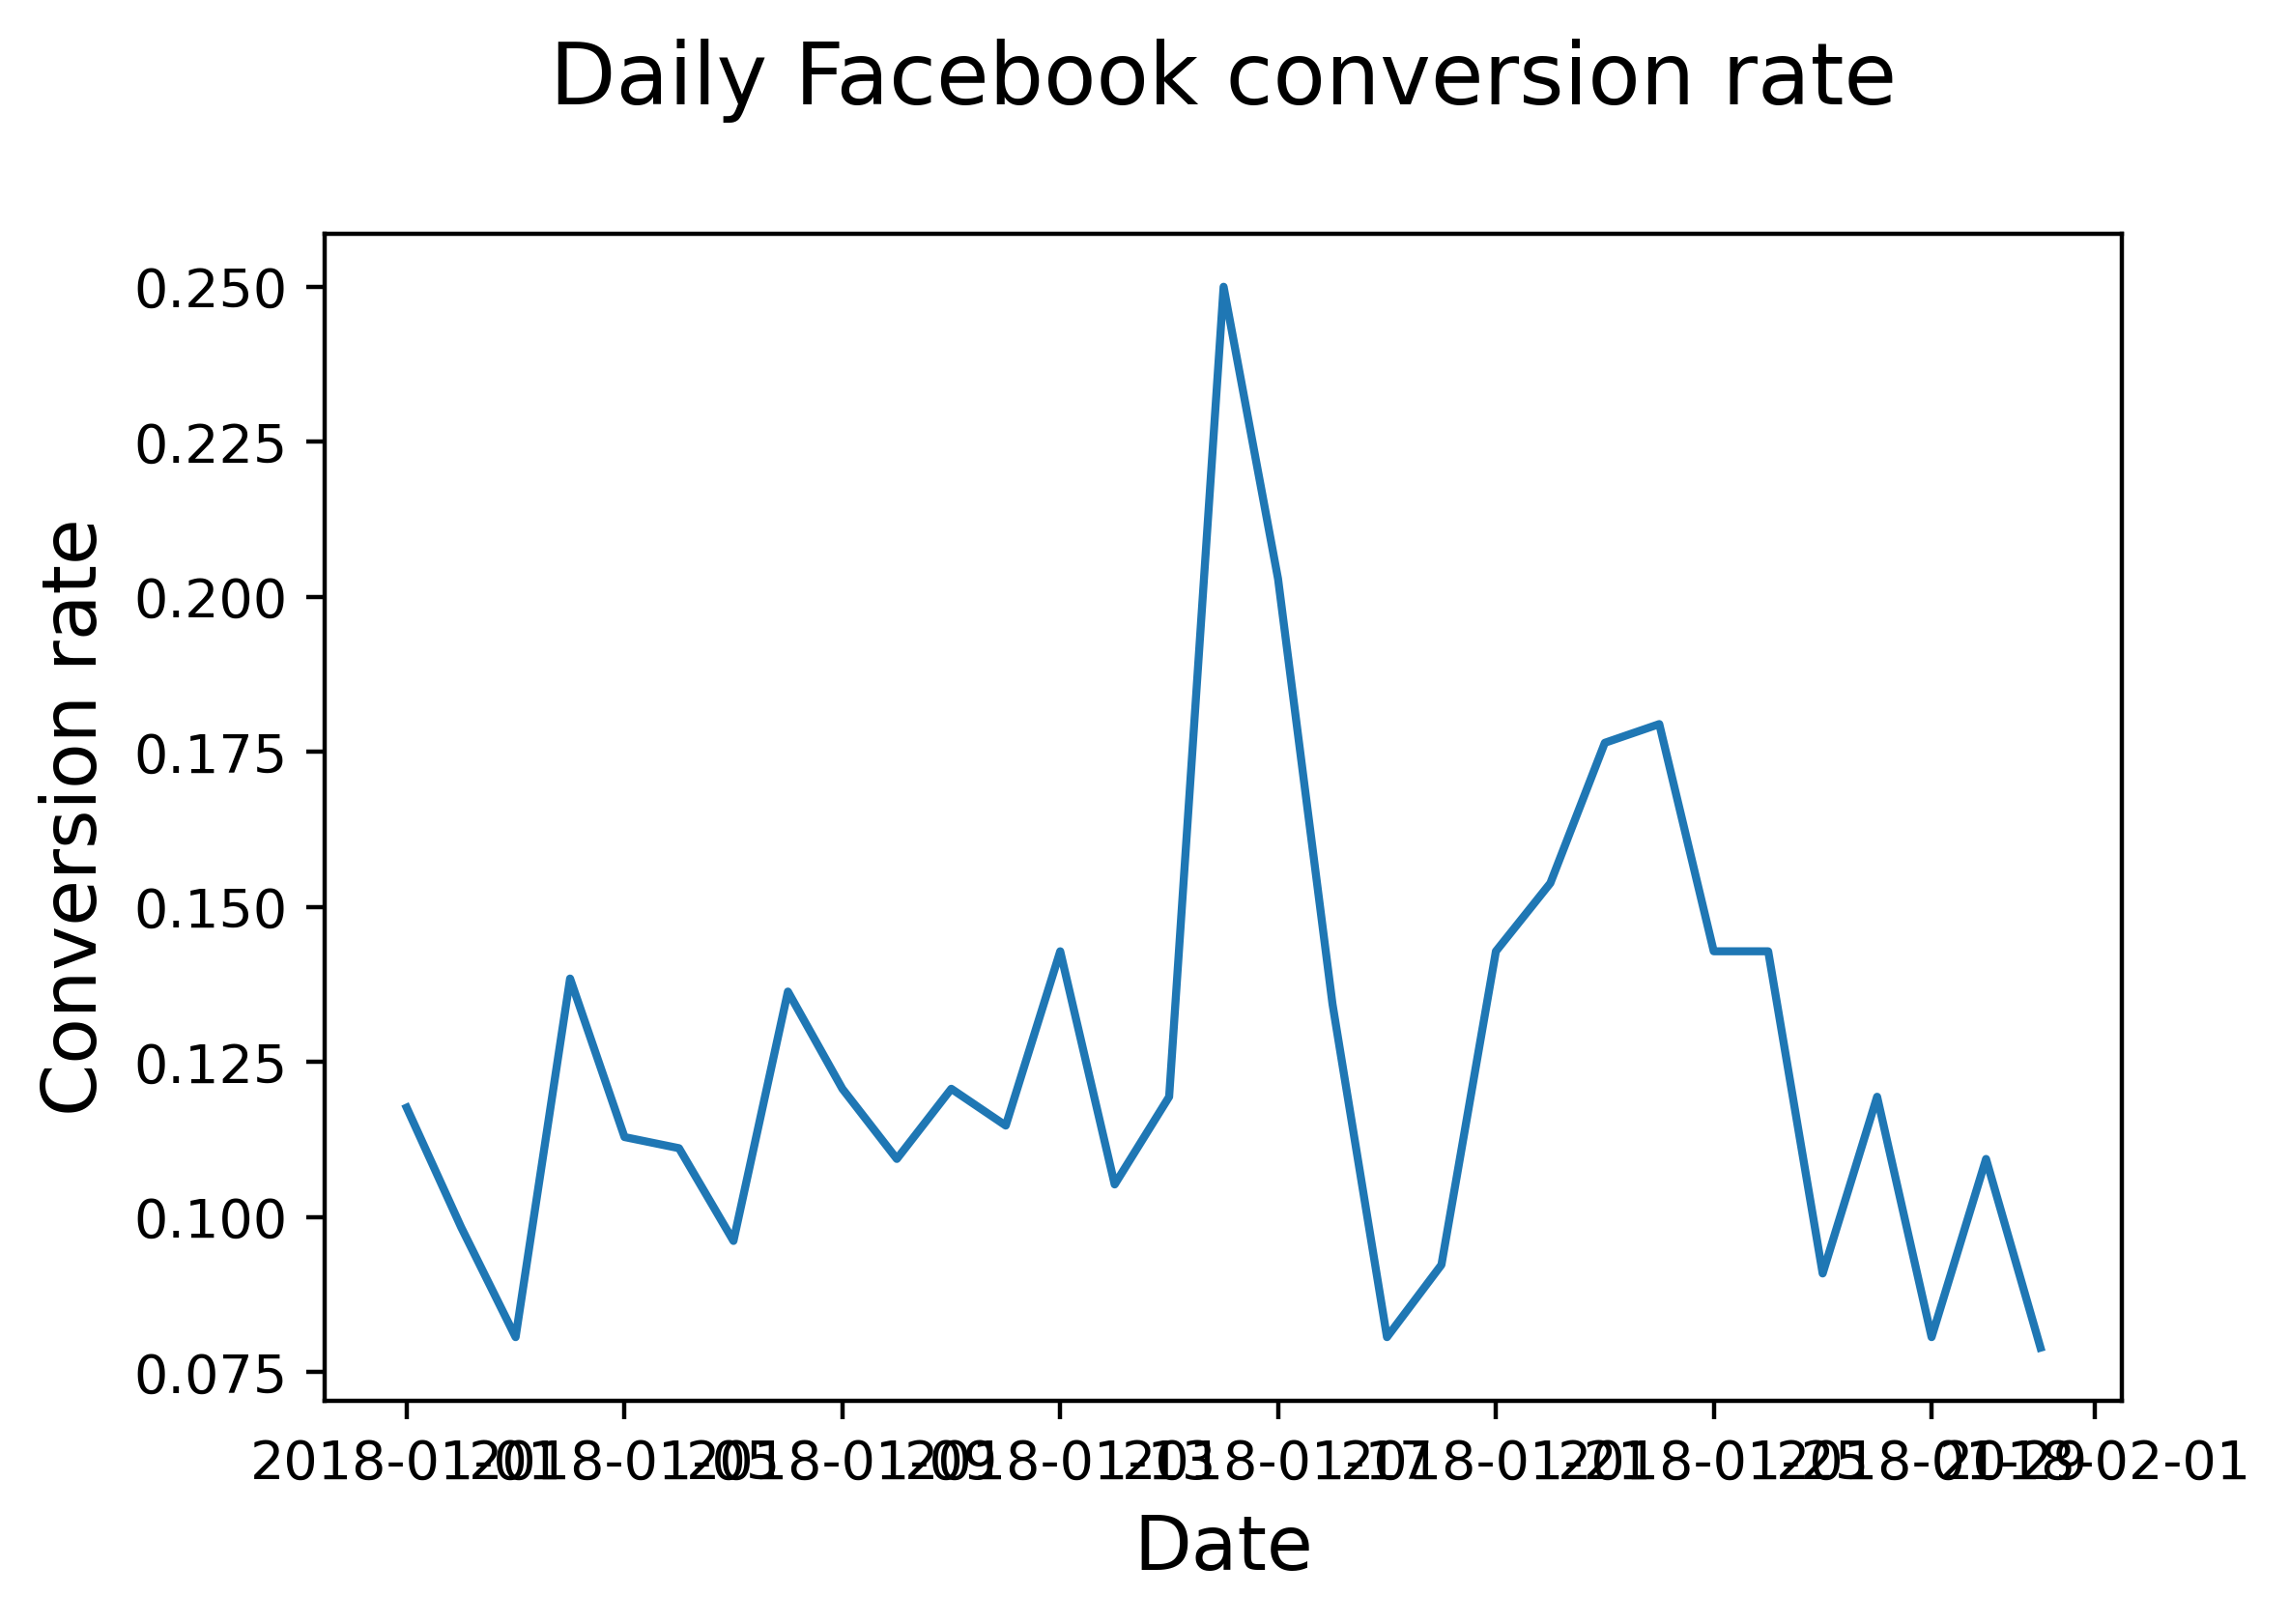

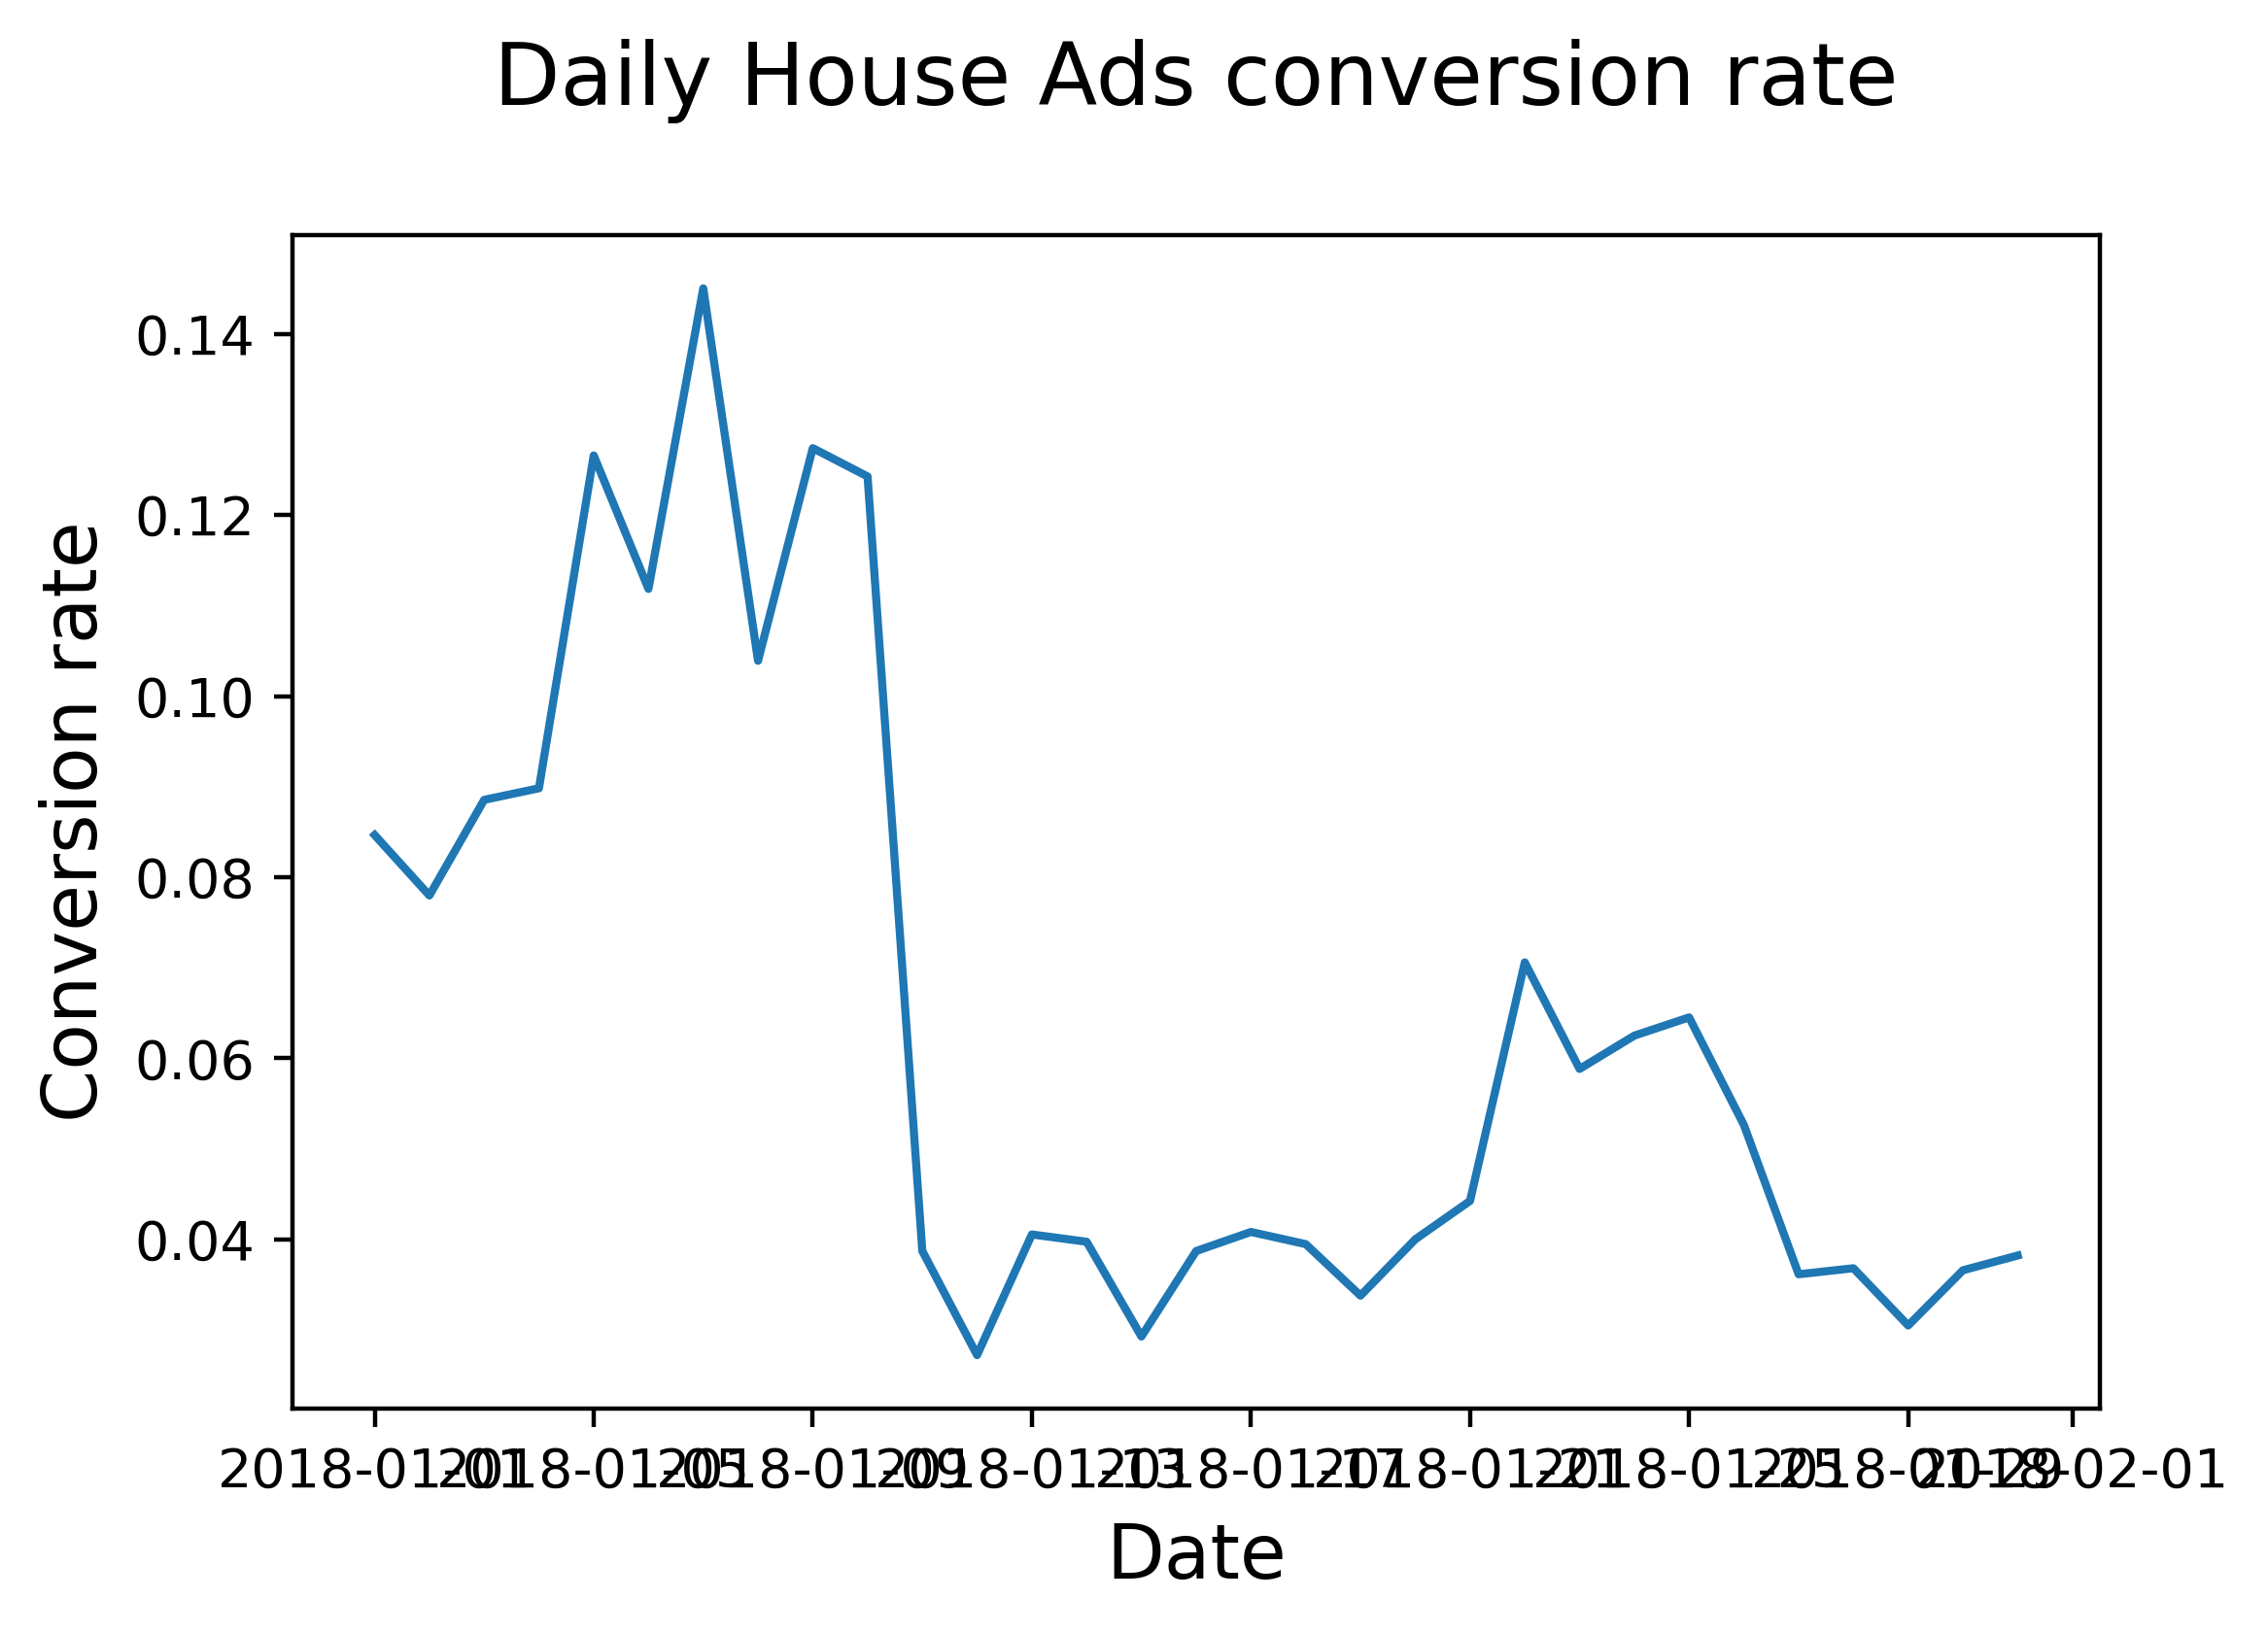

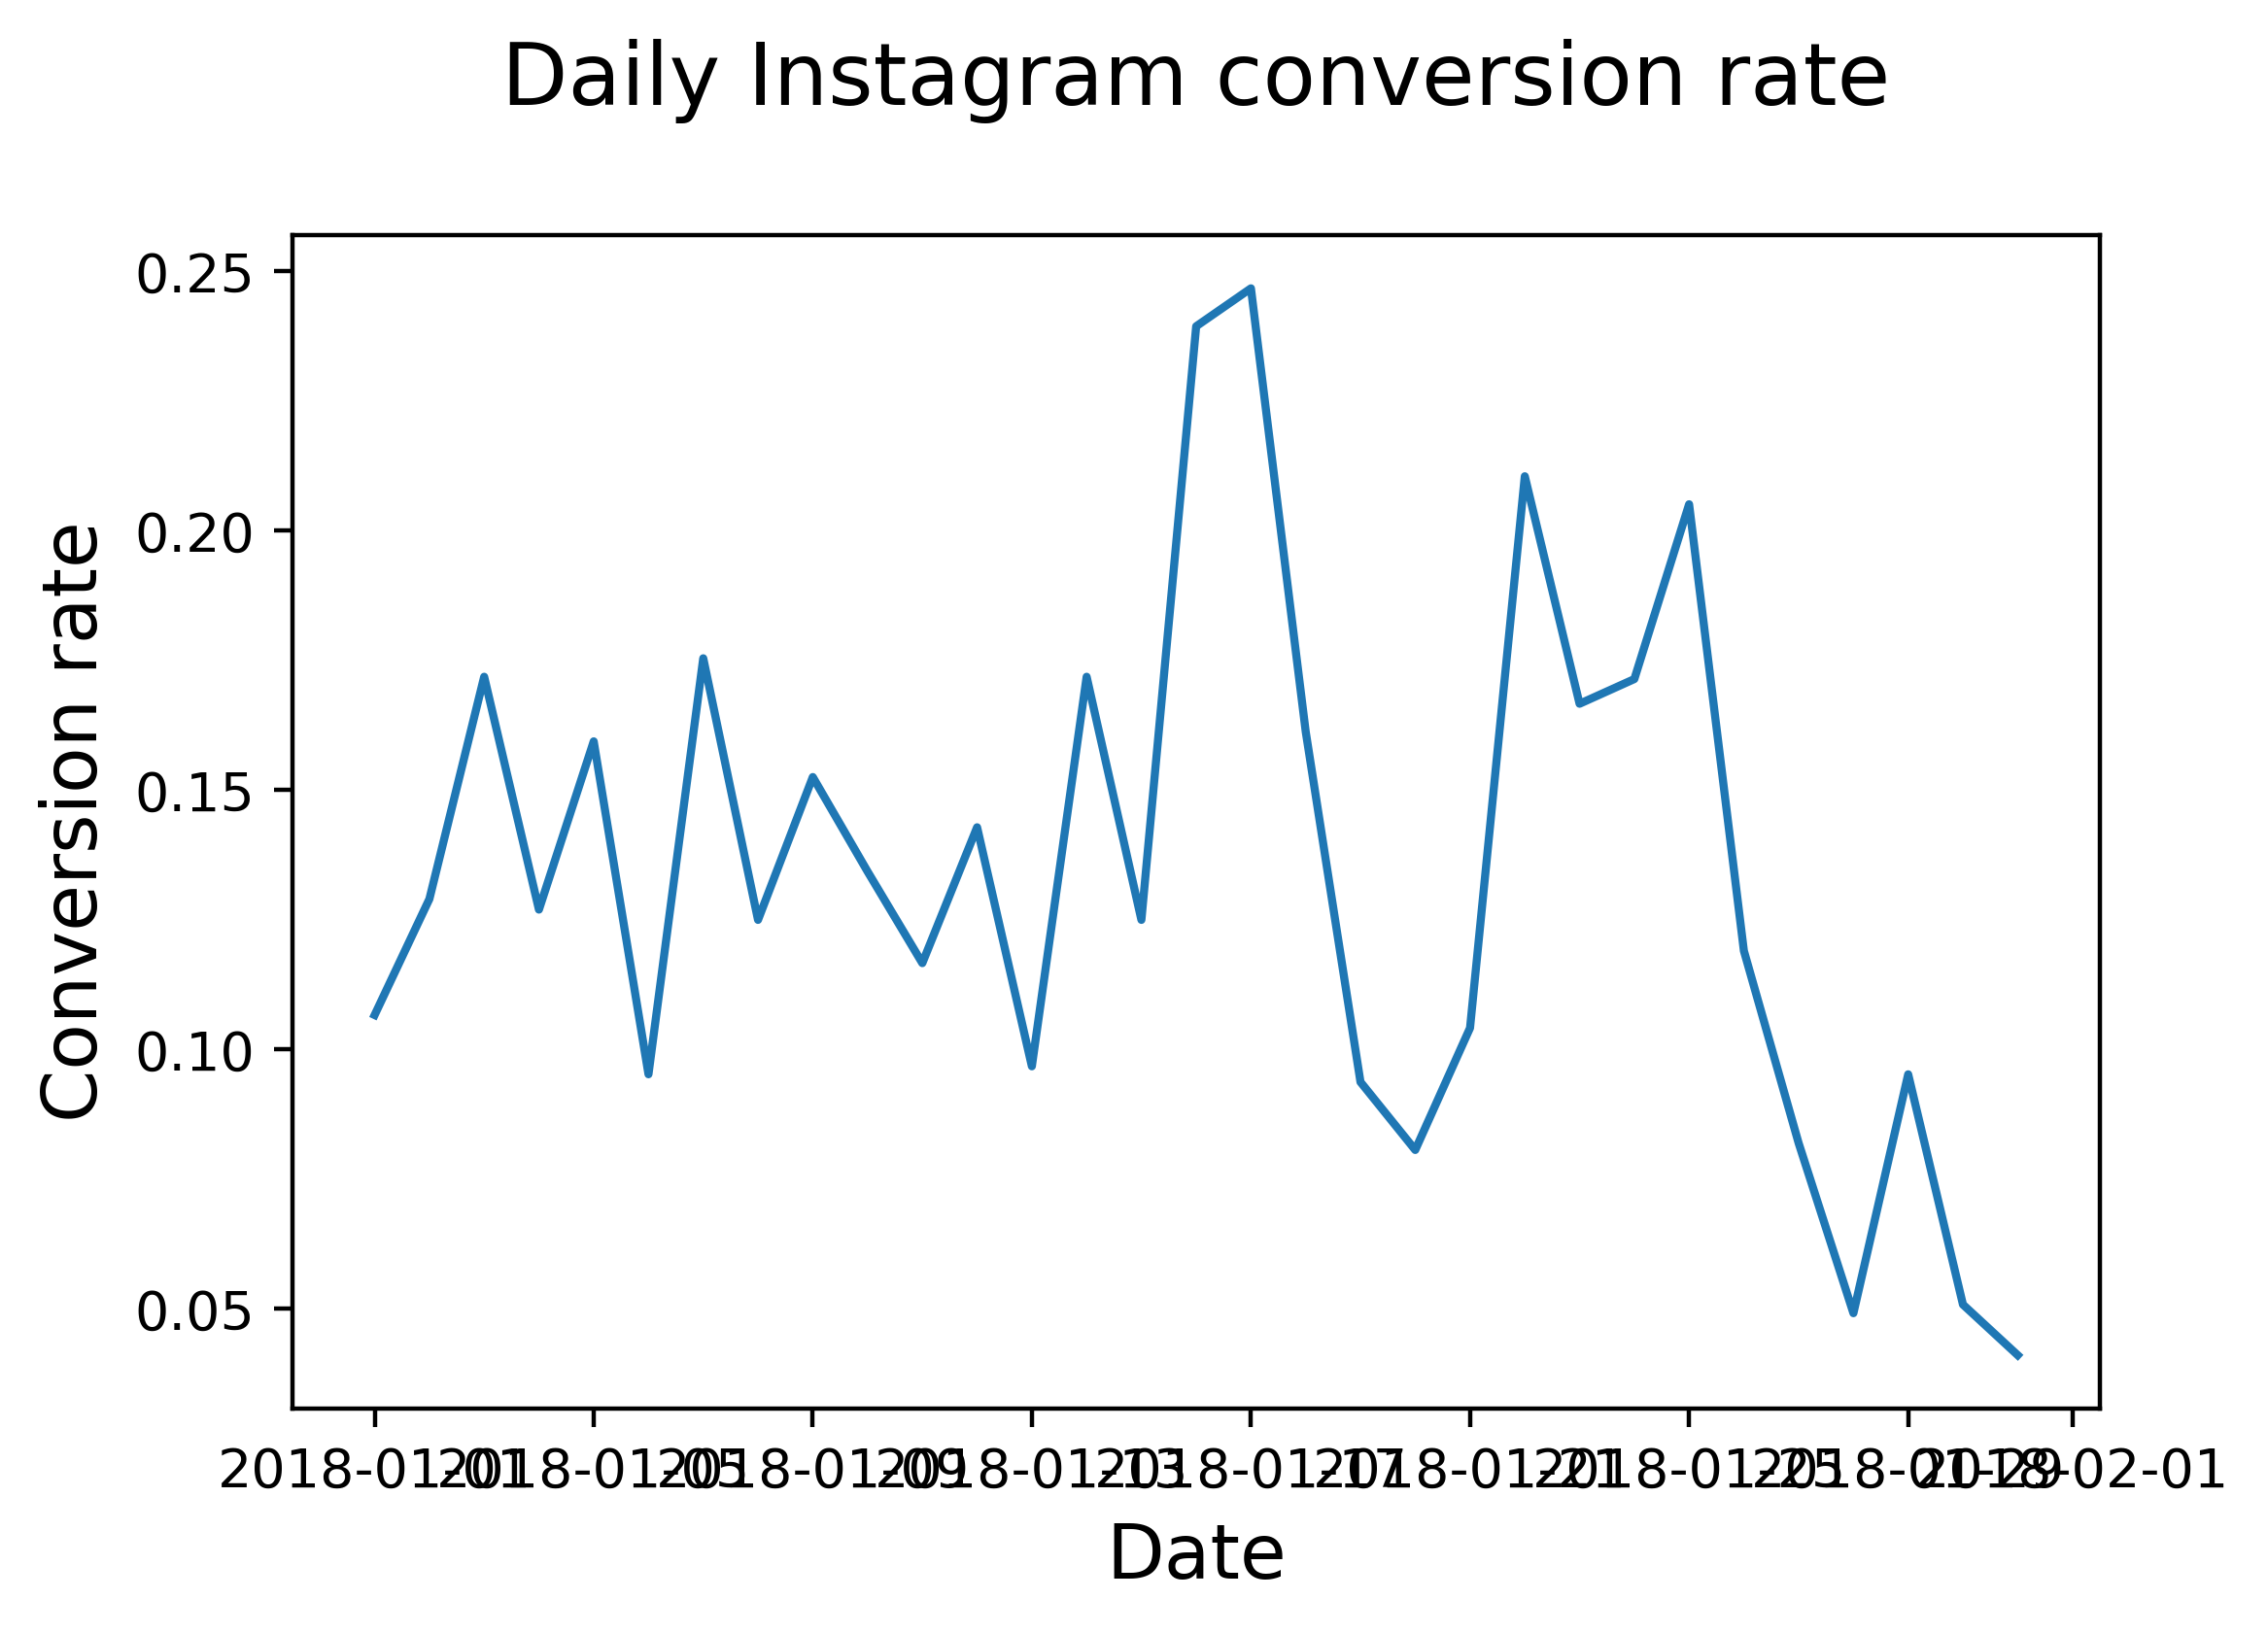

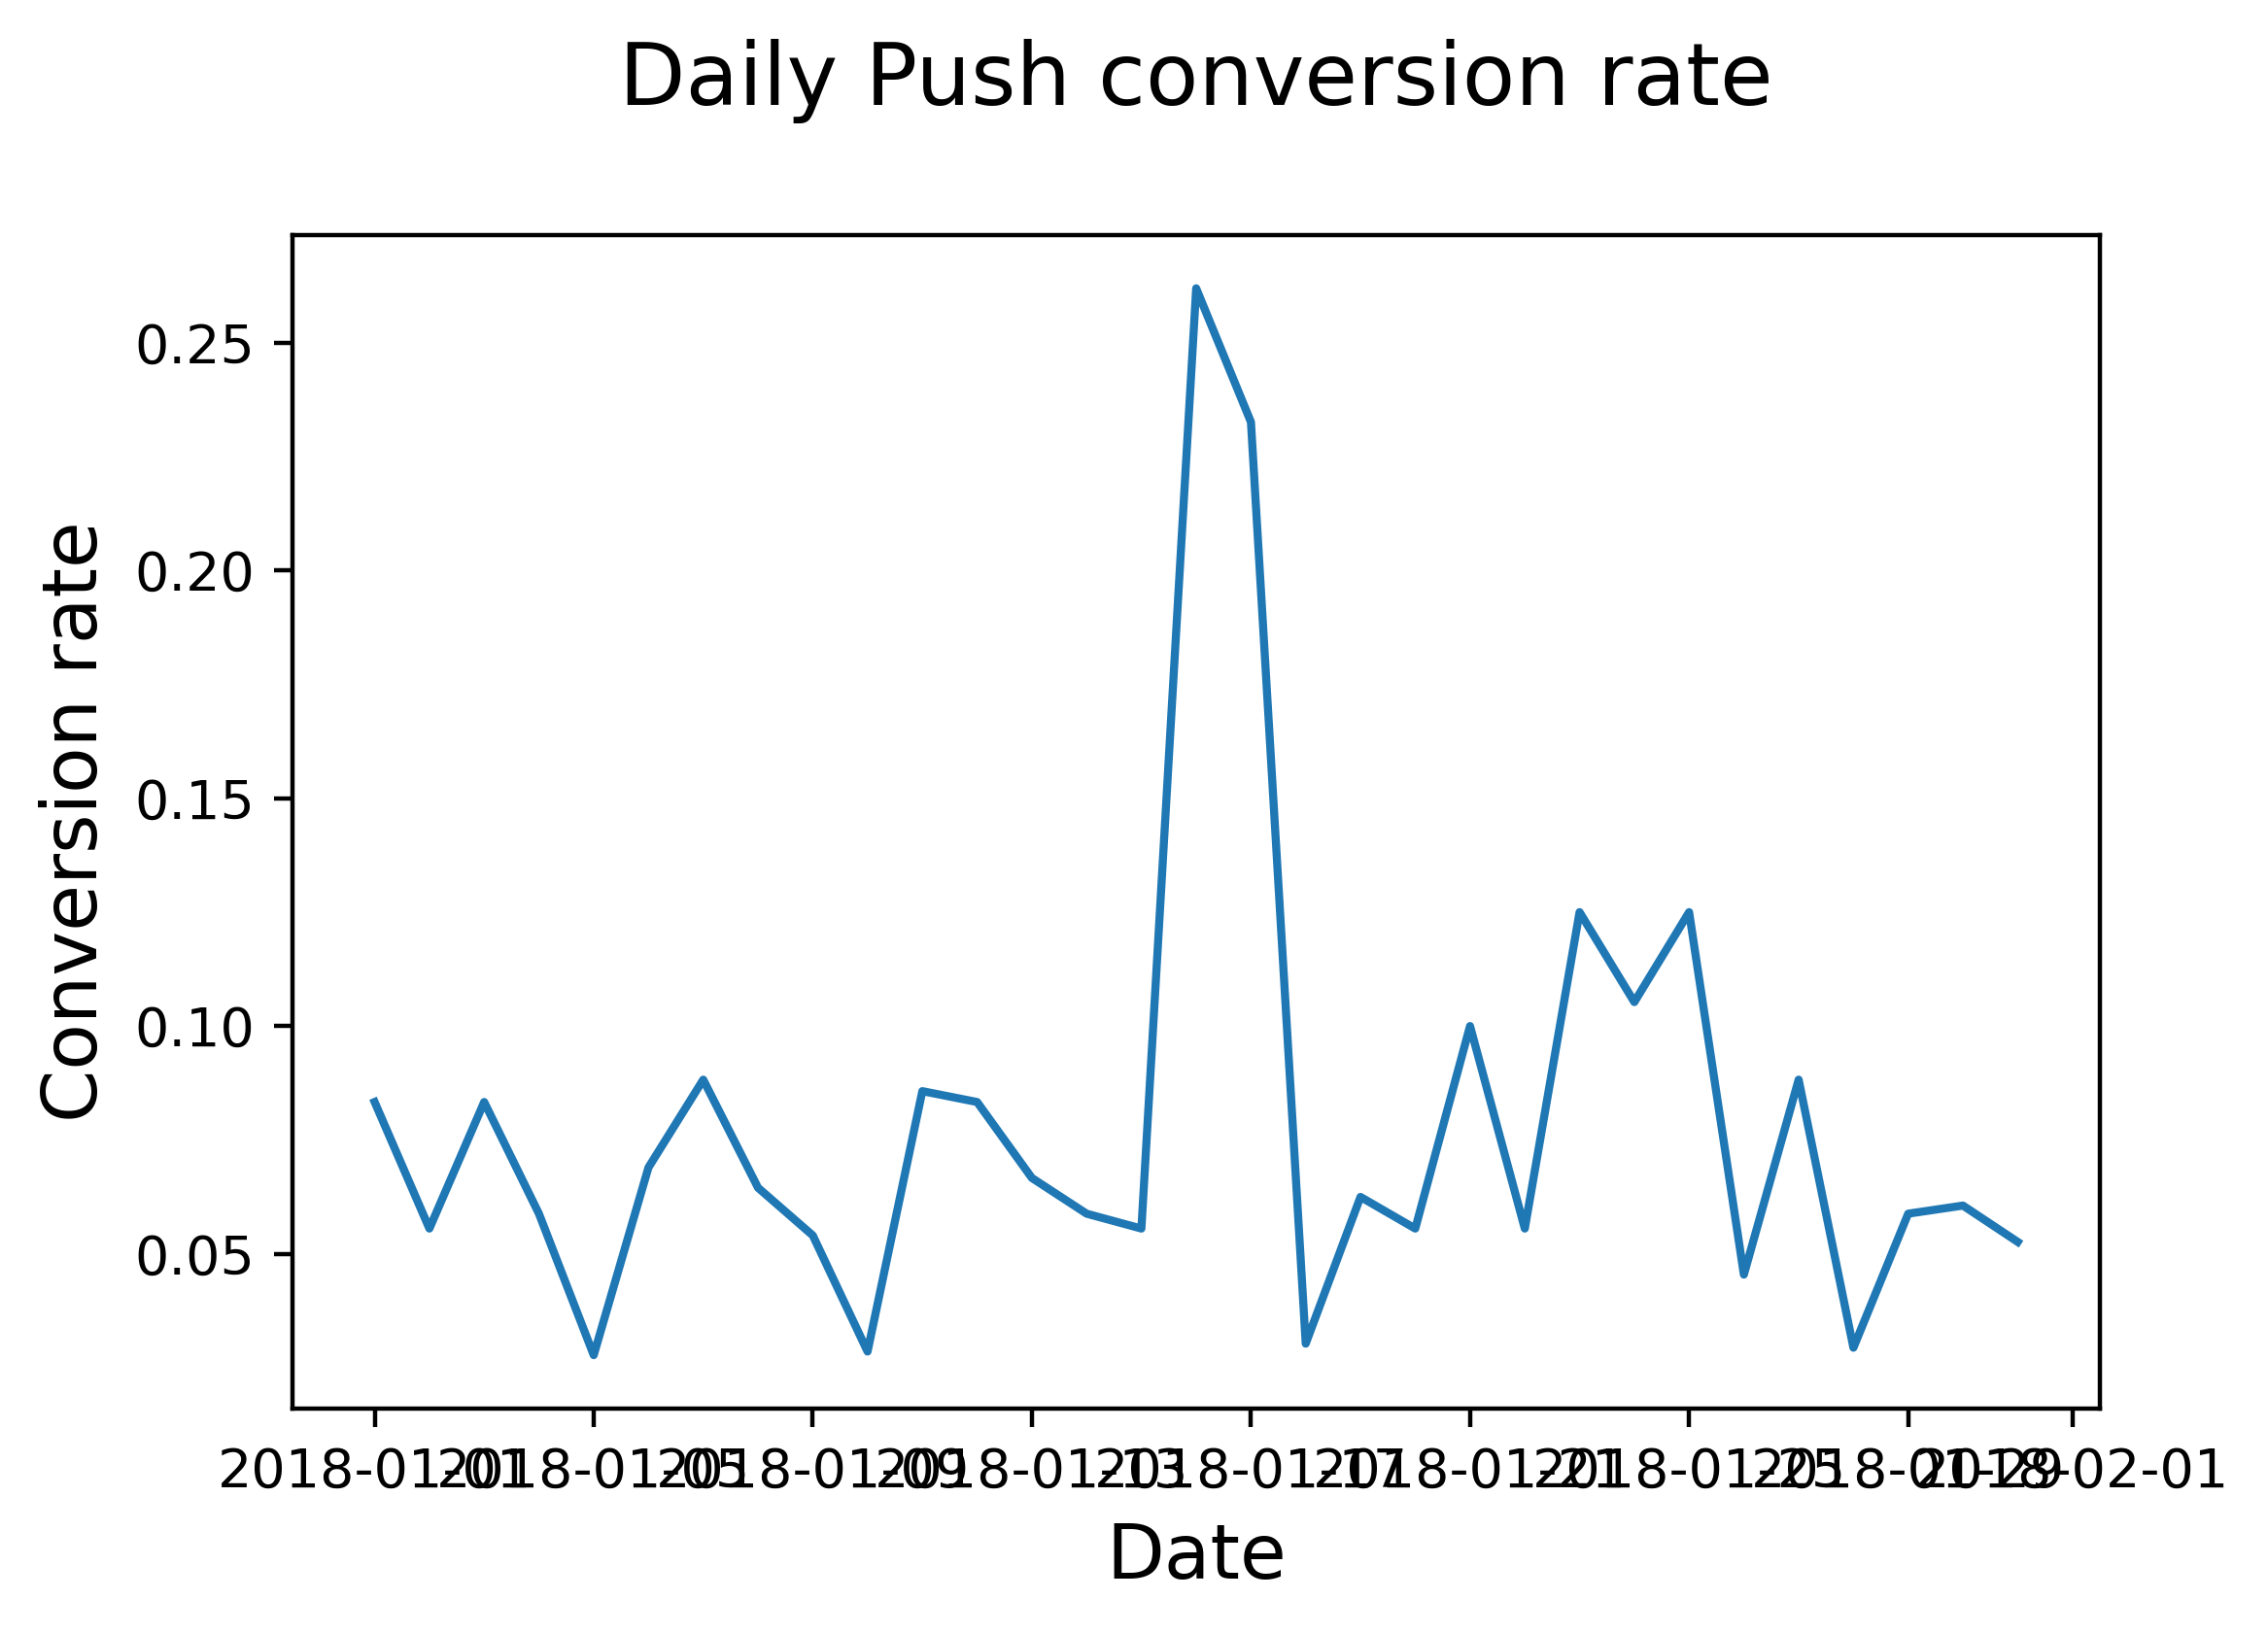

<Figure size 2400x1600 with 0 Axes>

In [29]:
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

plotting_conv(daily_conv_channel)

Text(0.5, 1.0, 'Conversion rate by day of week\n')

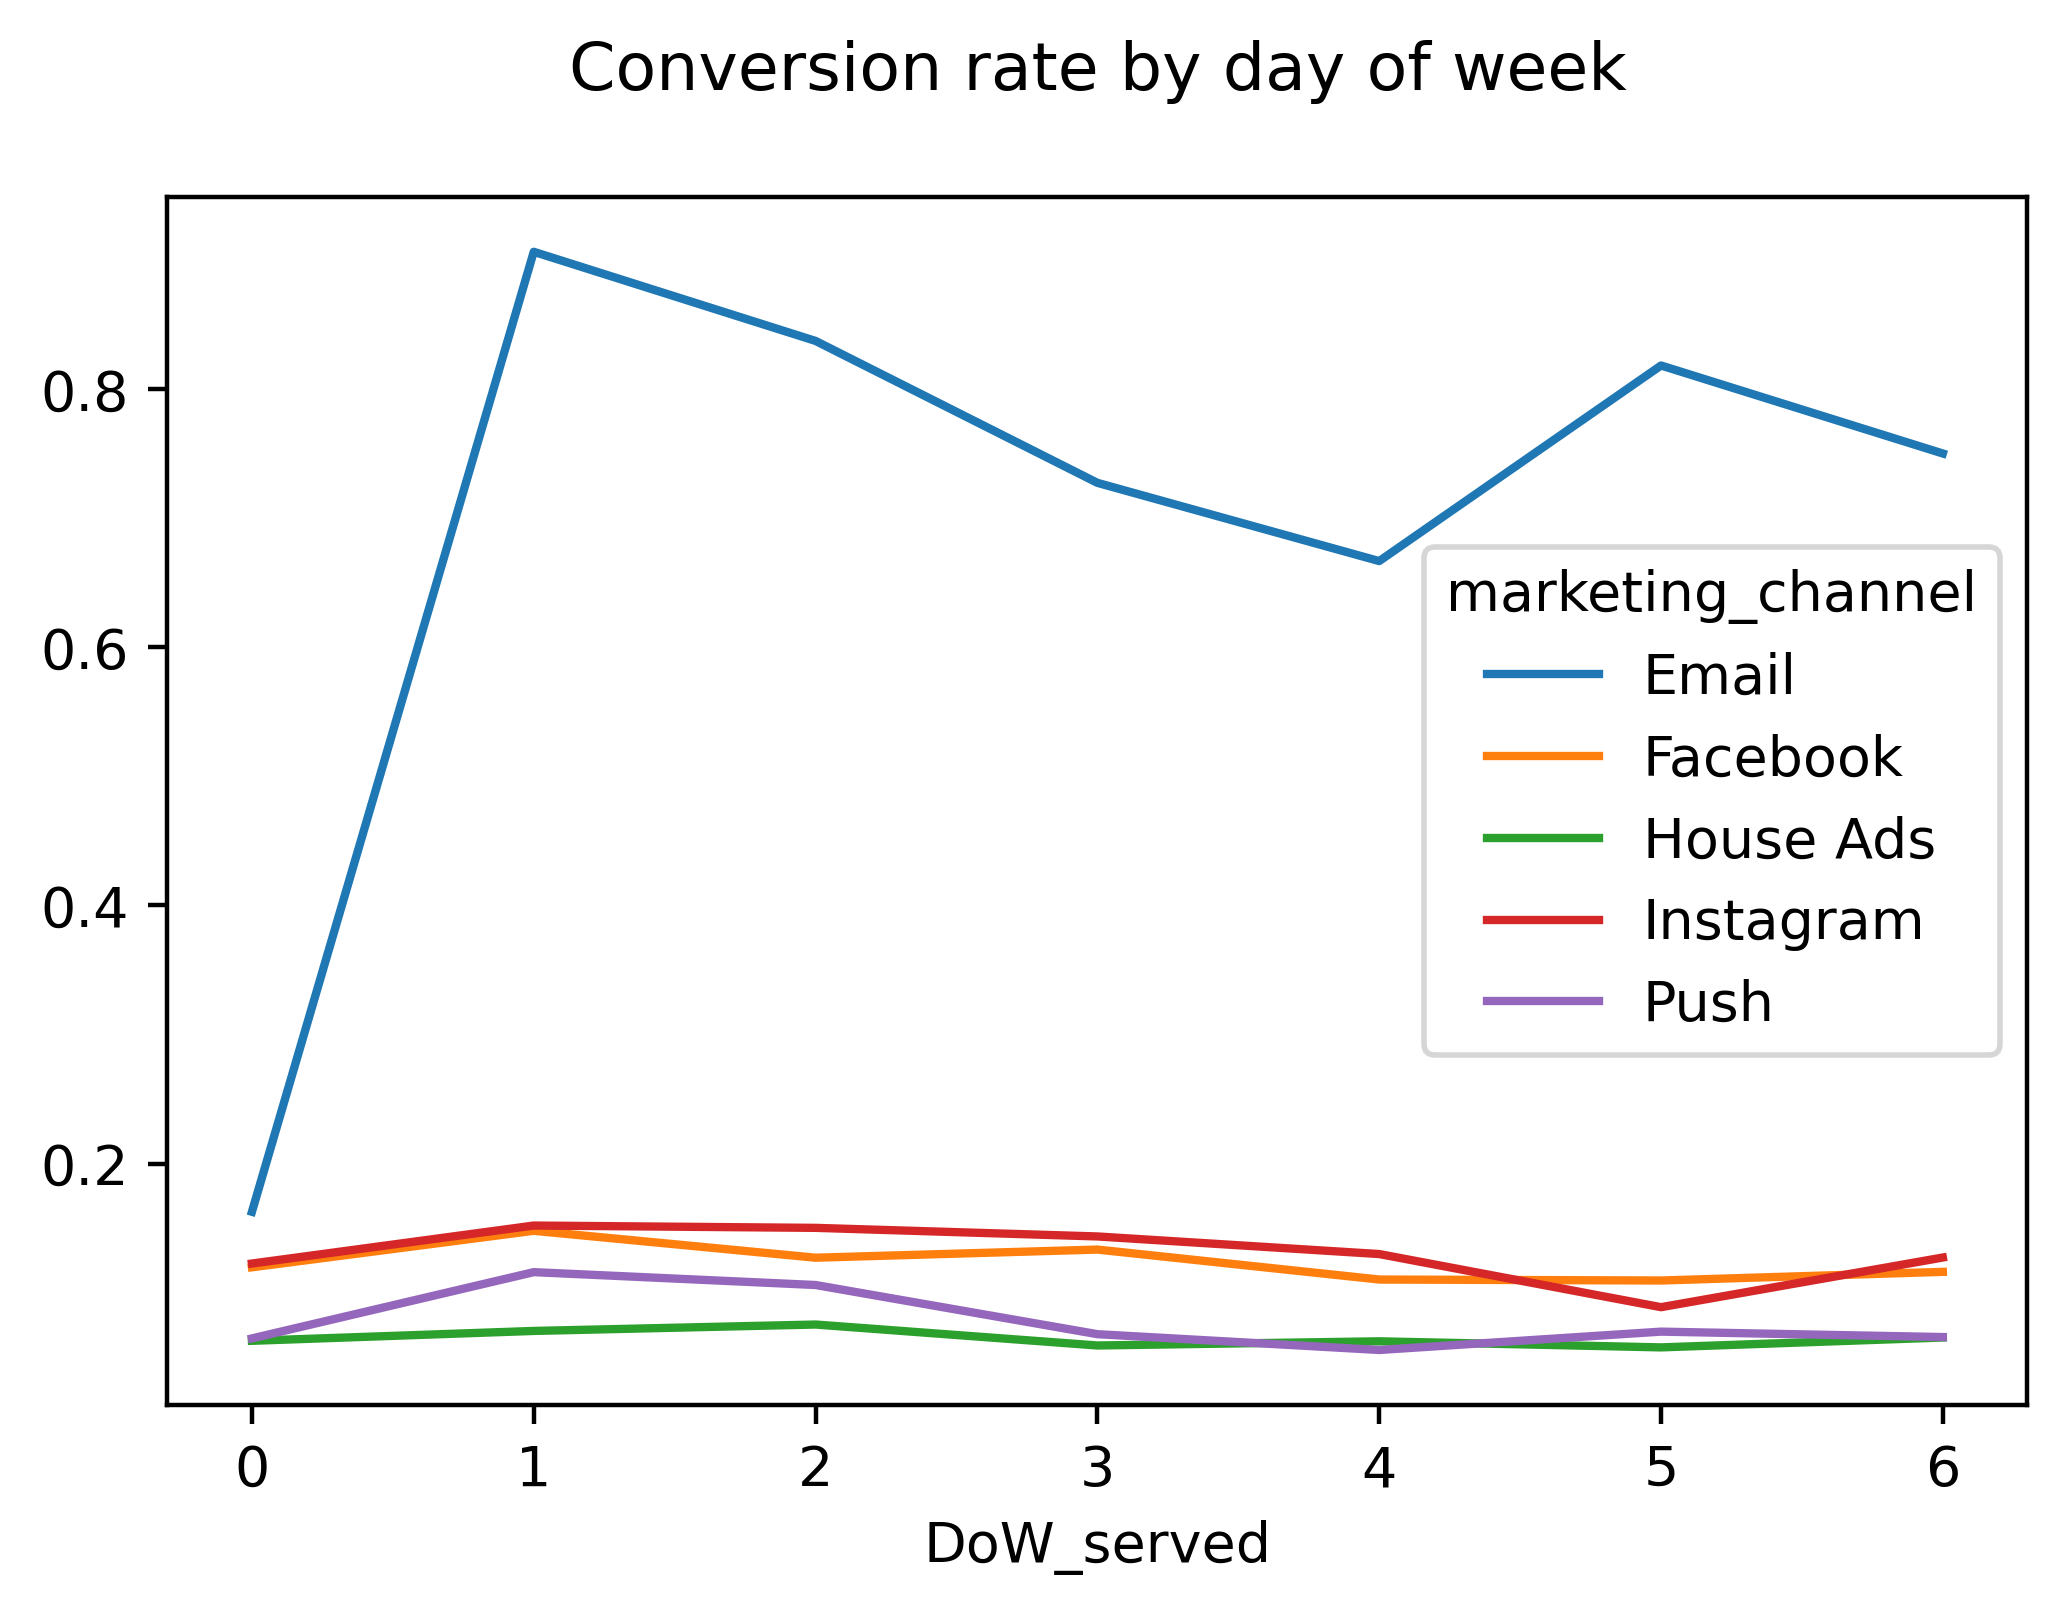

In [30]:
df['DoW_served'] = df['date_served'].dt.dayofweek


DoW_conversion = conversion_rate(df, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')

In [35]:
house_ads = df[df['marketing_channel'] == 'House Ads']

conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))
conv_lang_df = conv_lang_df.fillna(0)
conv_lang_df.head()

language_displayed  Arabic   English    German   Spanish
date_served                                             
2018-01-01             1.0  0.075145  0.200000  0.000000
2018-01-02             0.0  0.068966  0.600000  0.000000
2018-01-03             0.0  0.083799  0.333333  0.125000
2018-01-04             0.0  0.080537  0.000000  0.214286
2018-01-05             0.0  0.118881  0.000000  0.214286

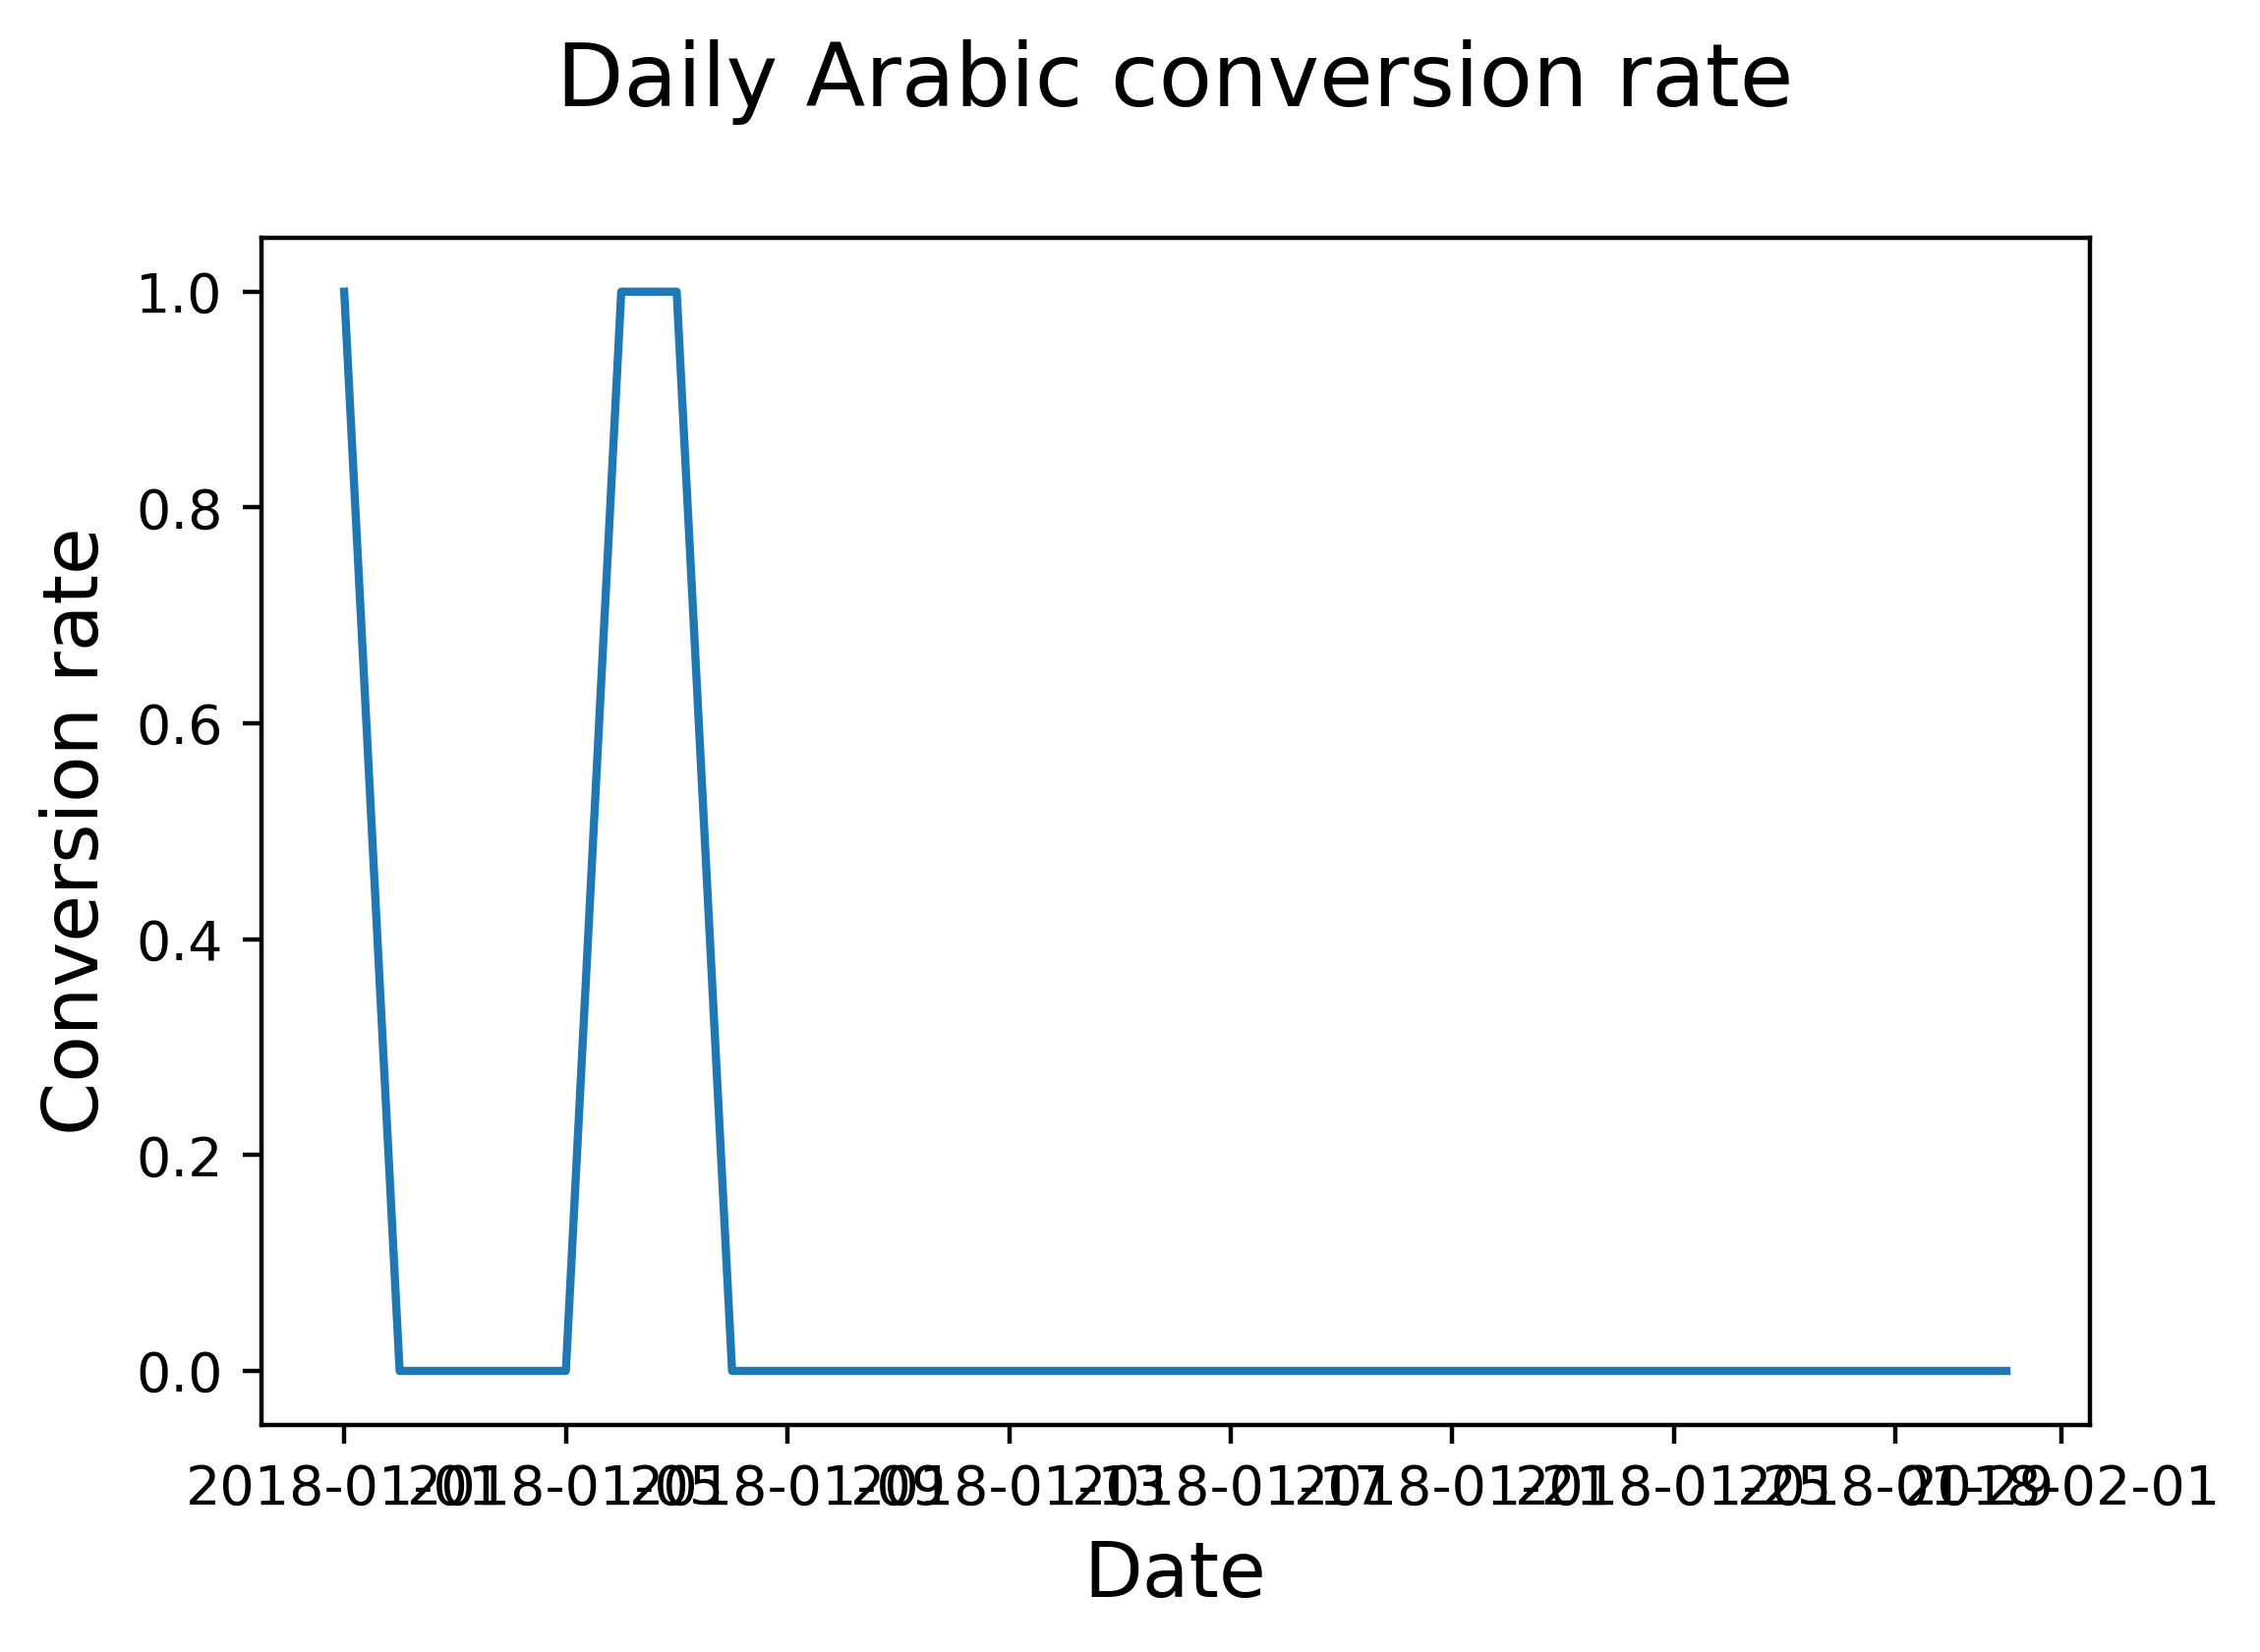

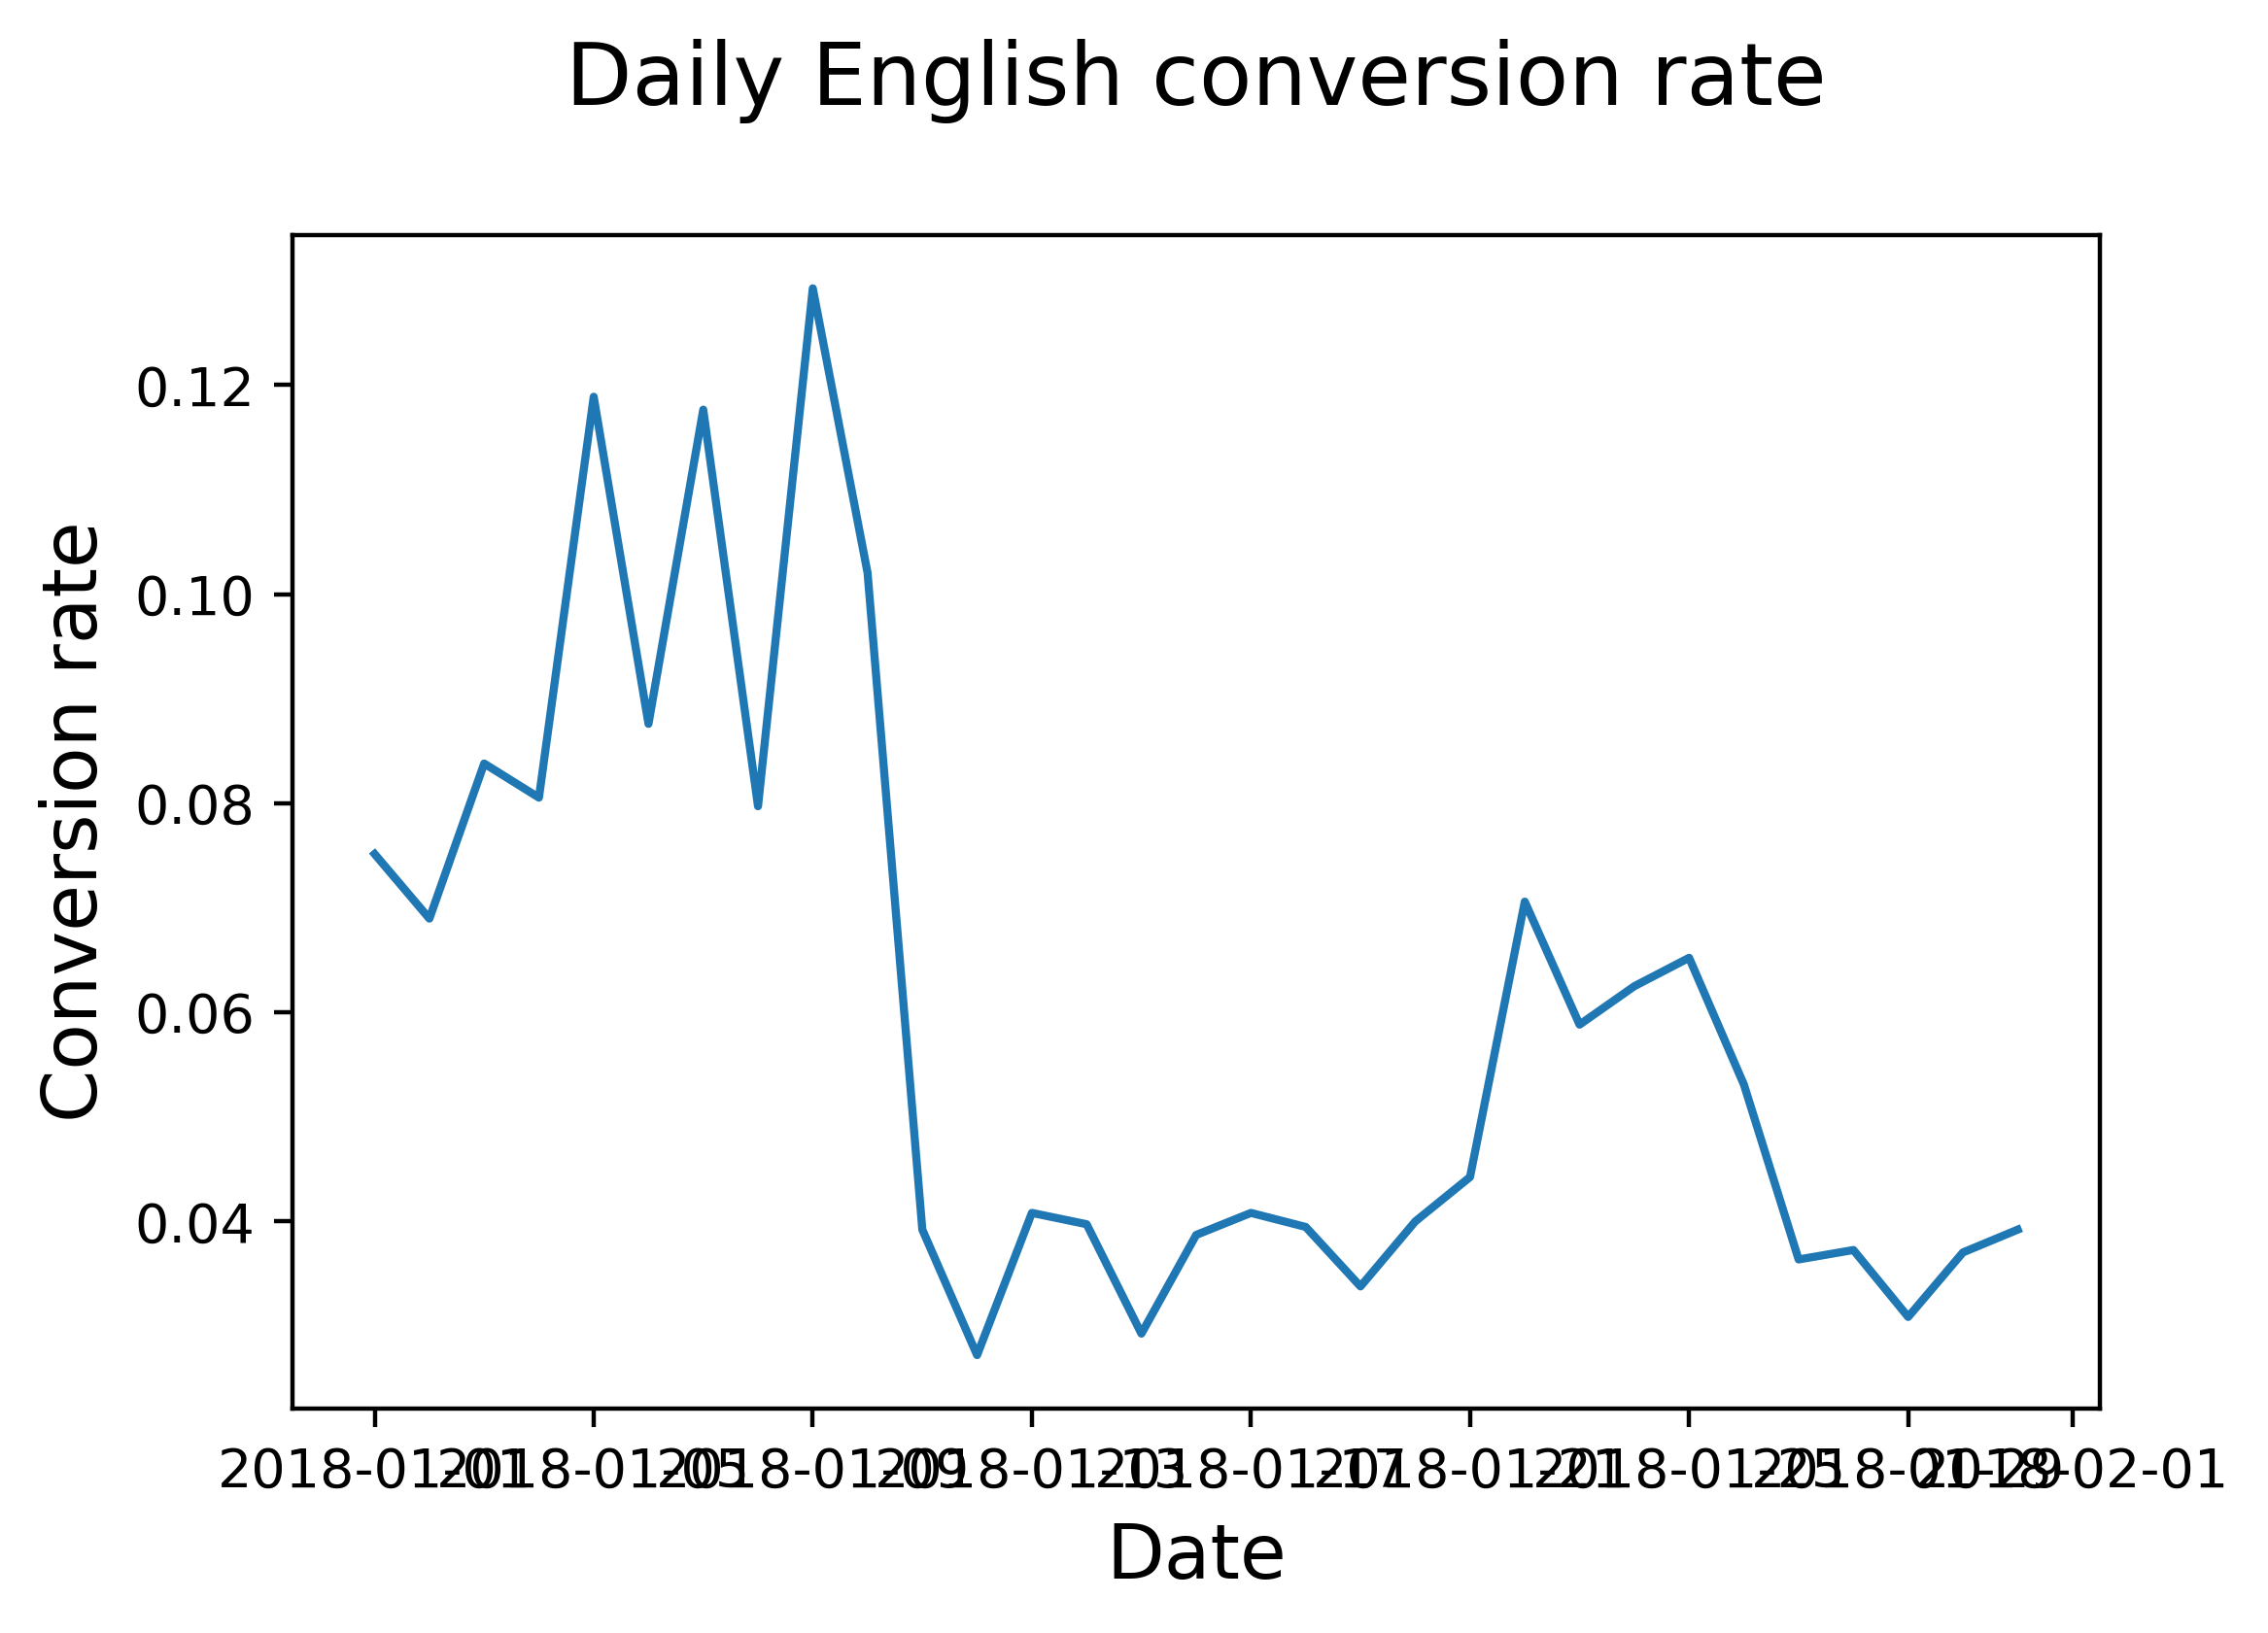

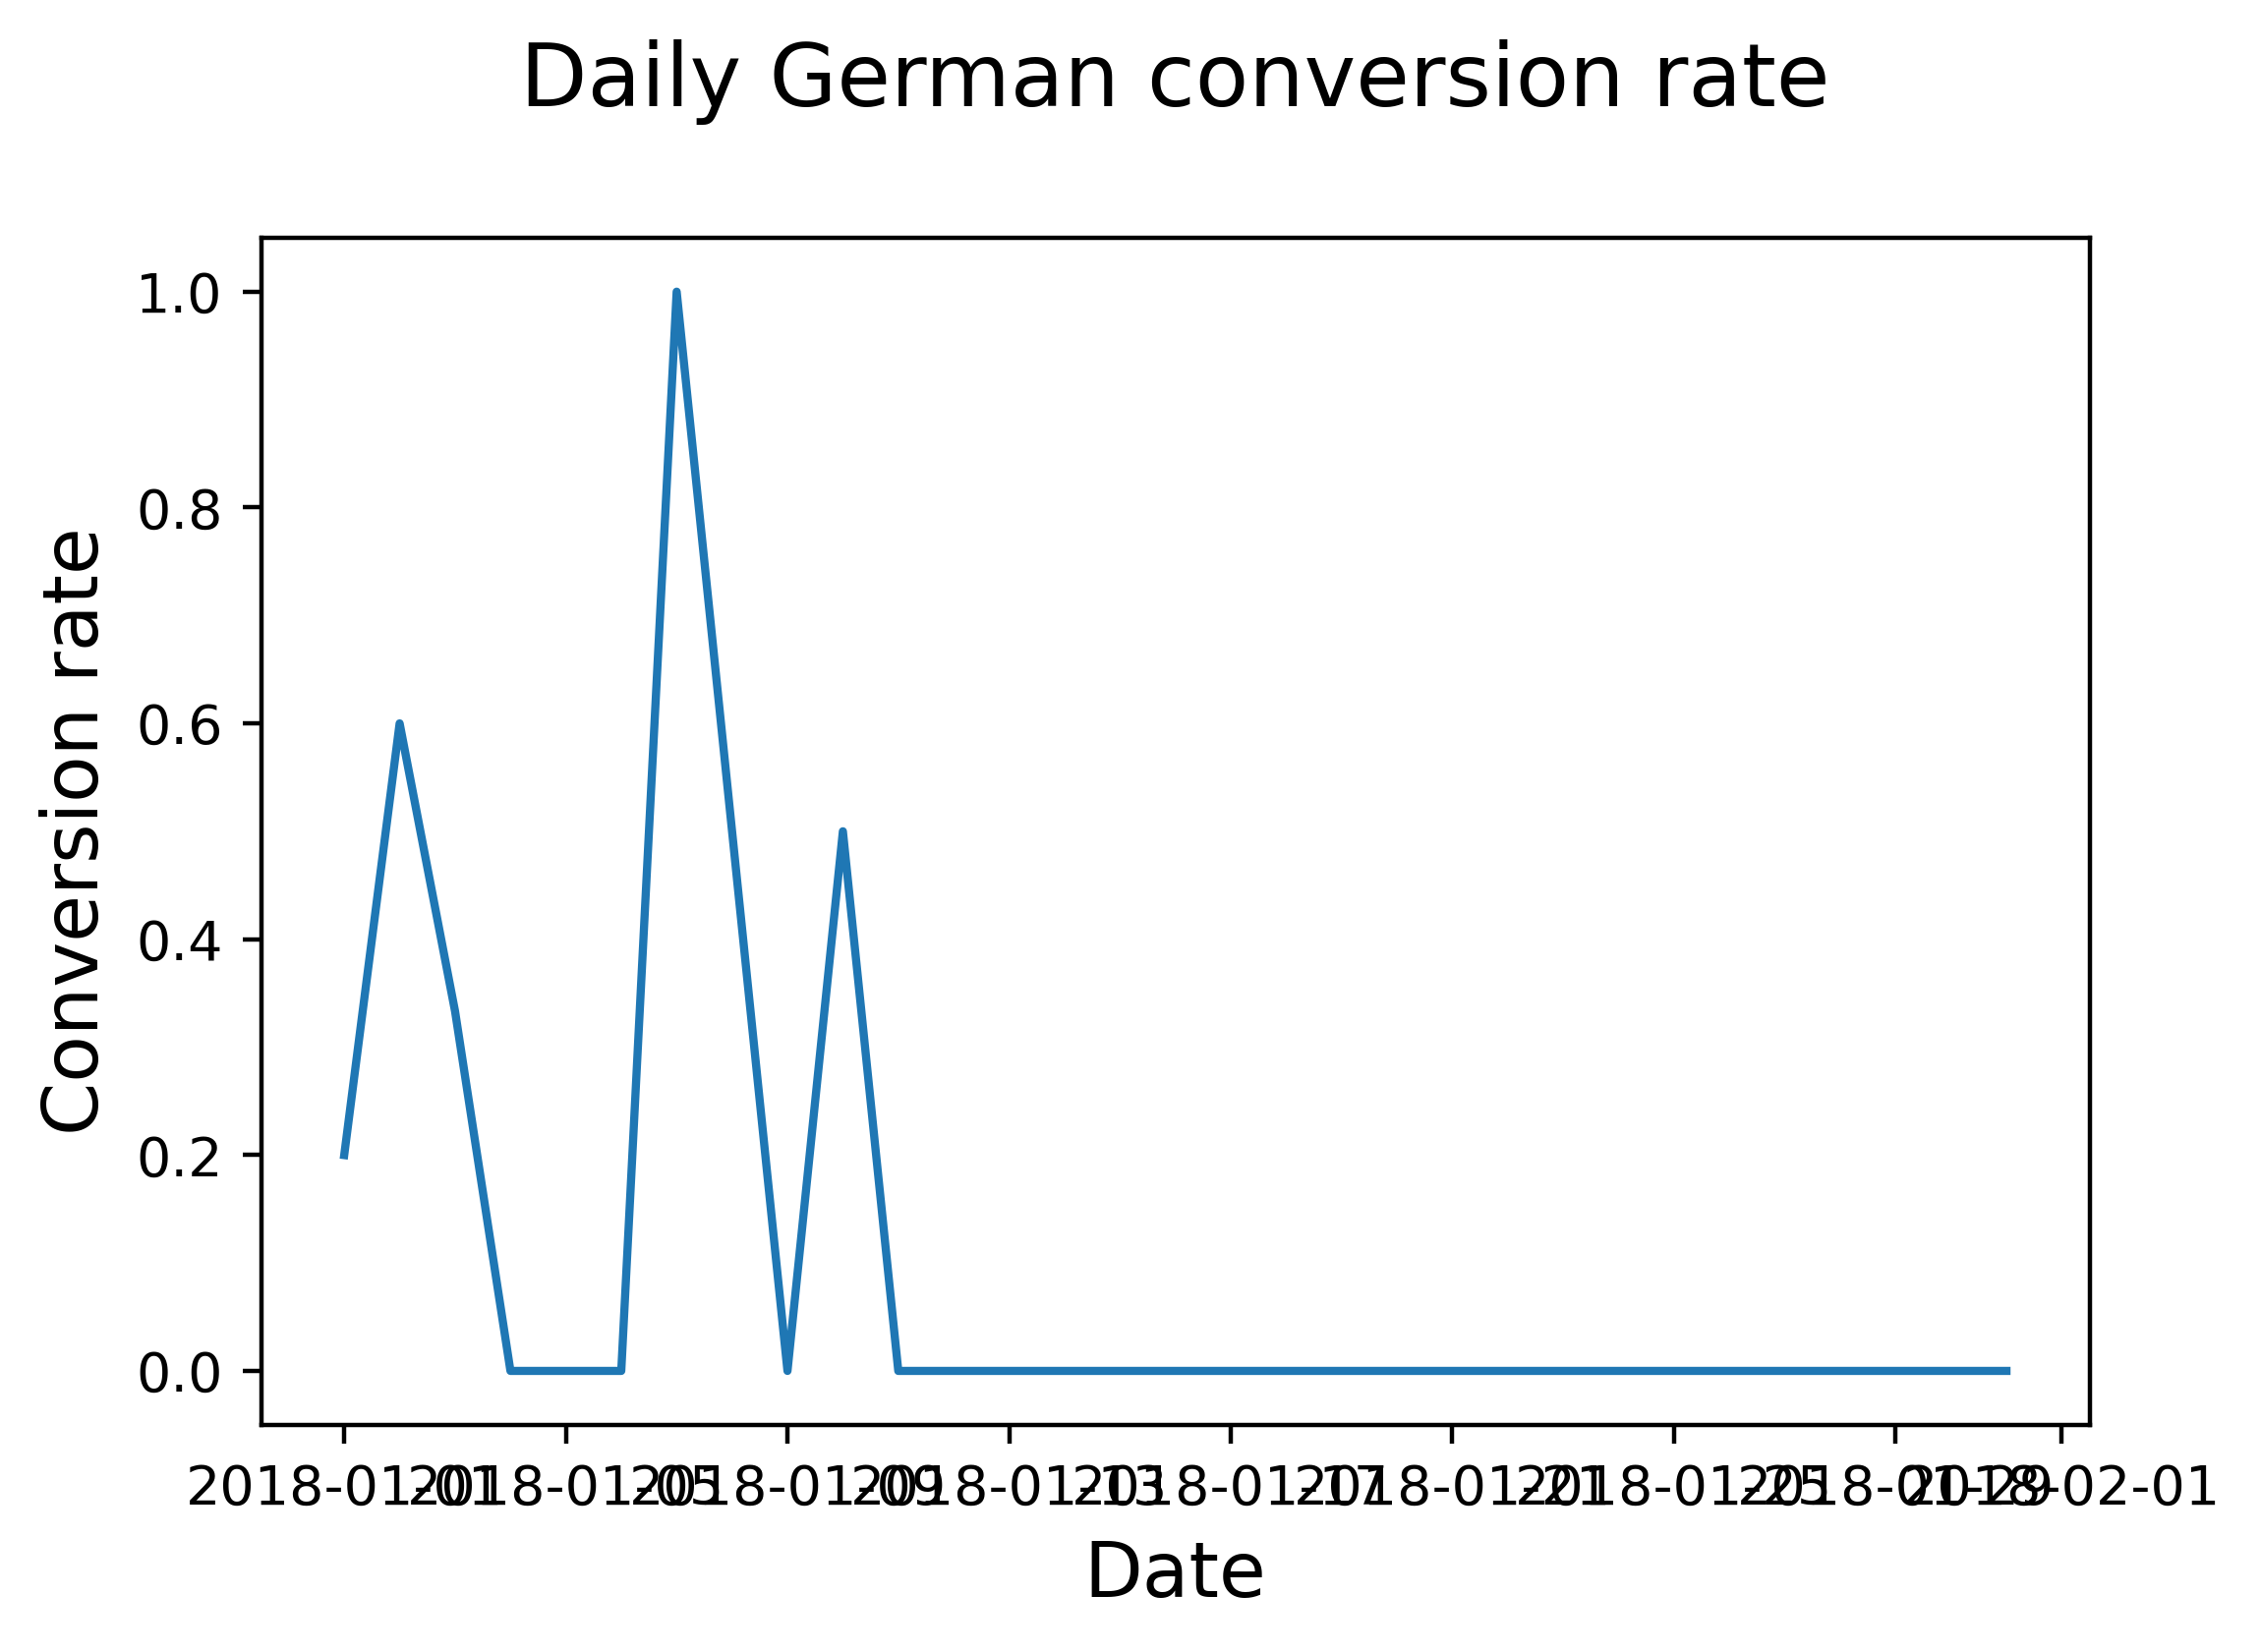

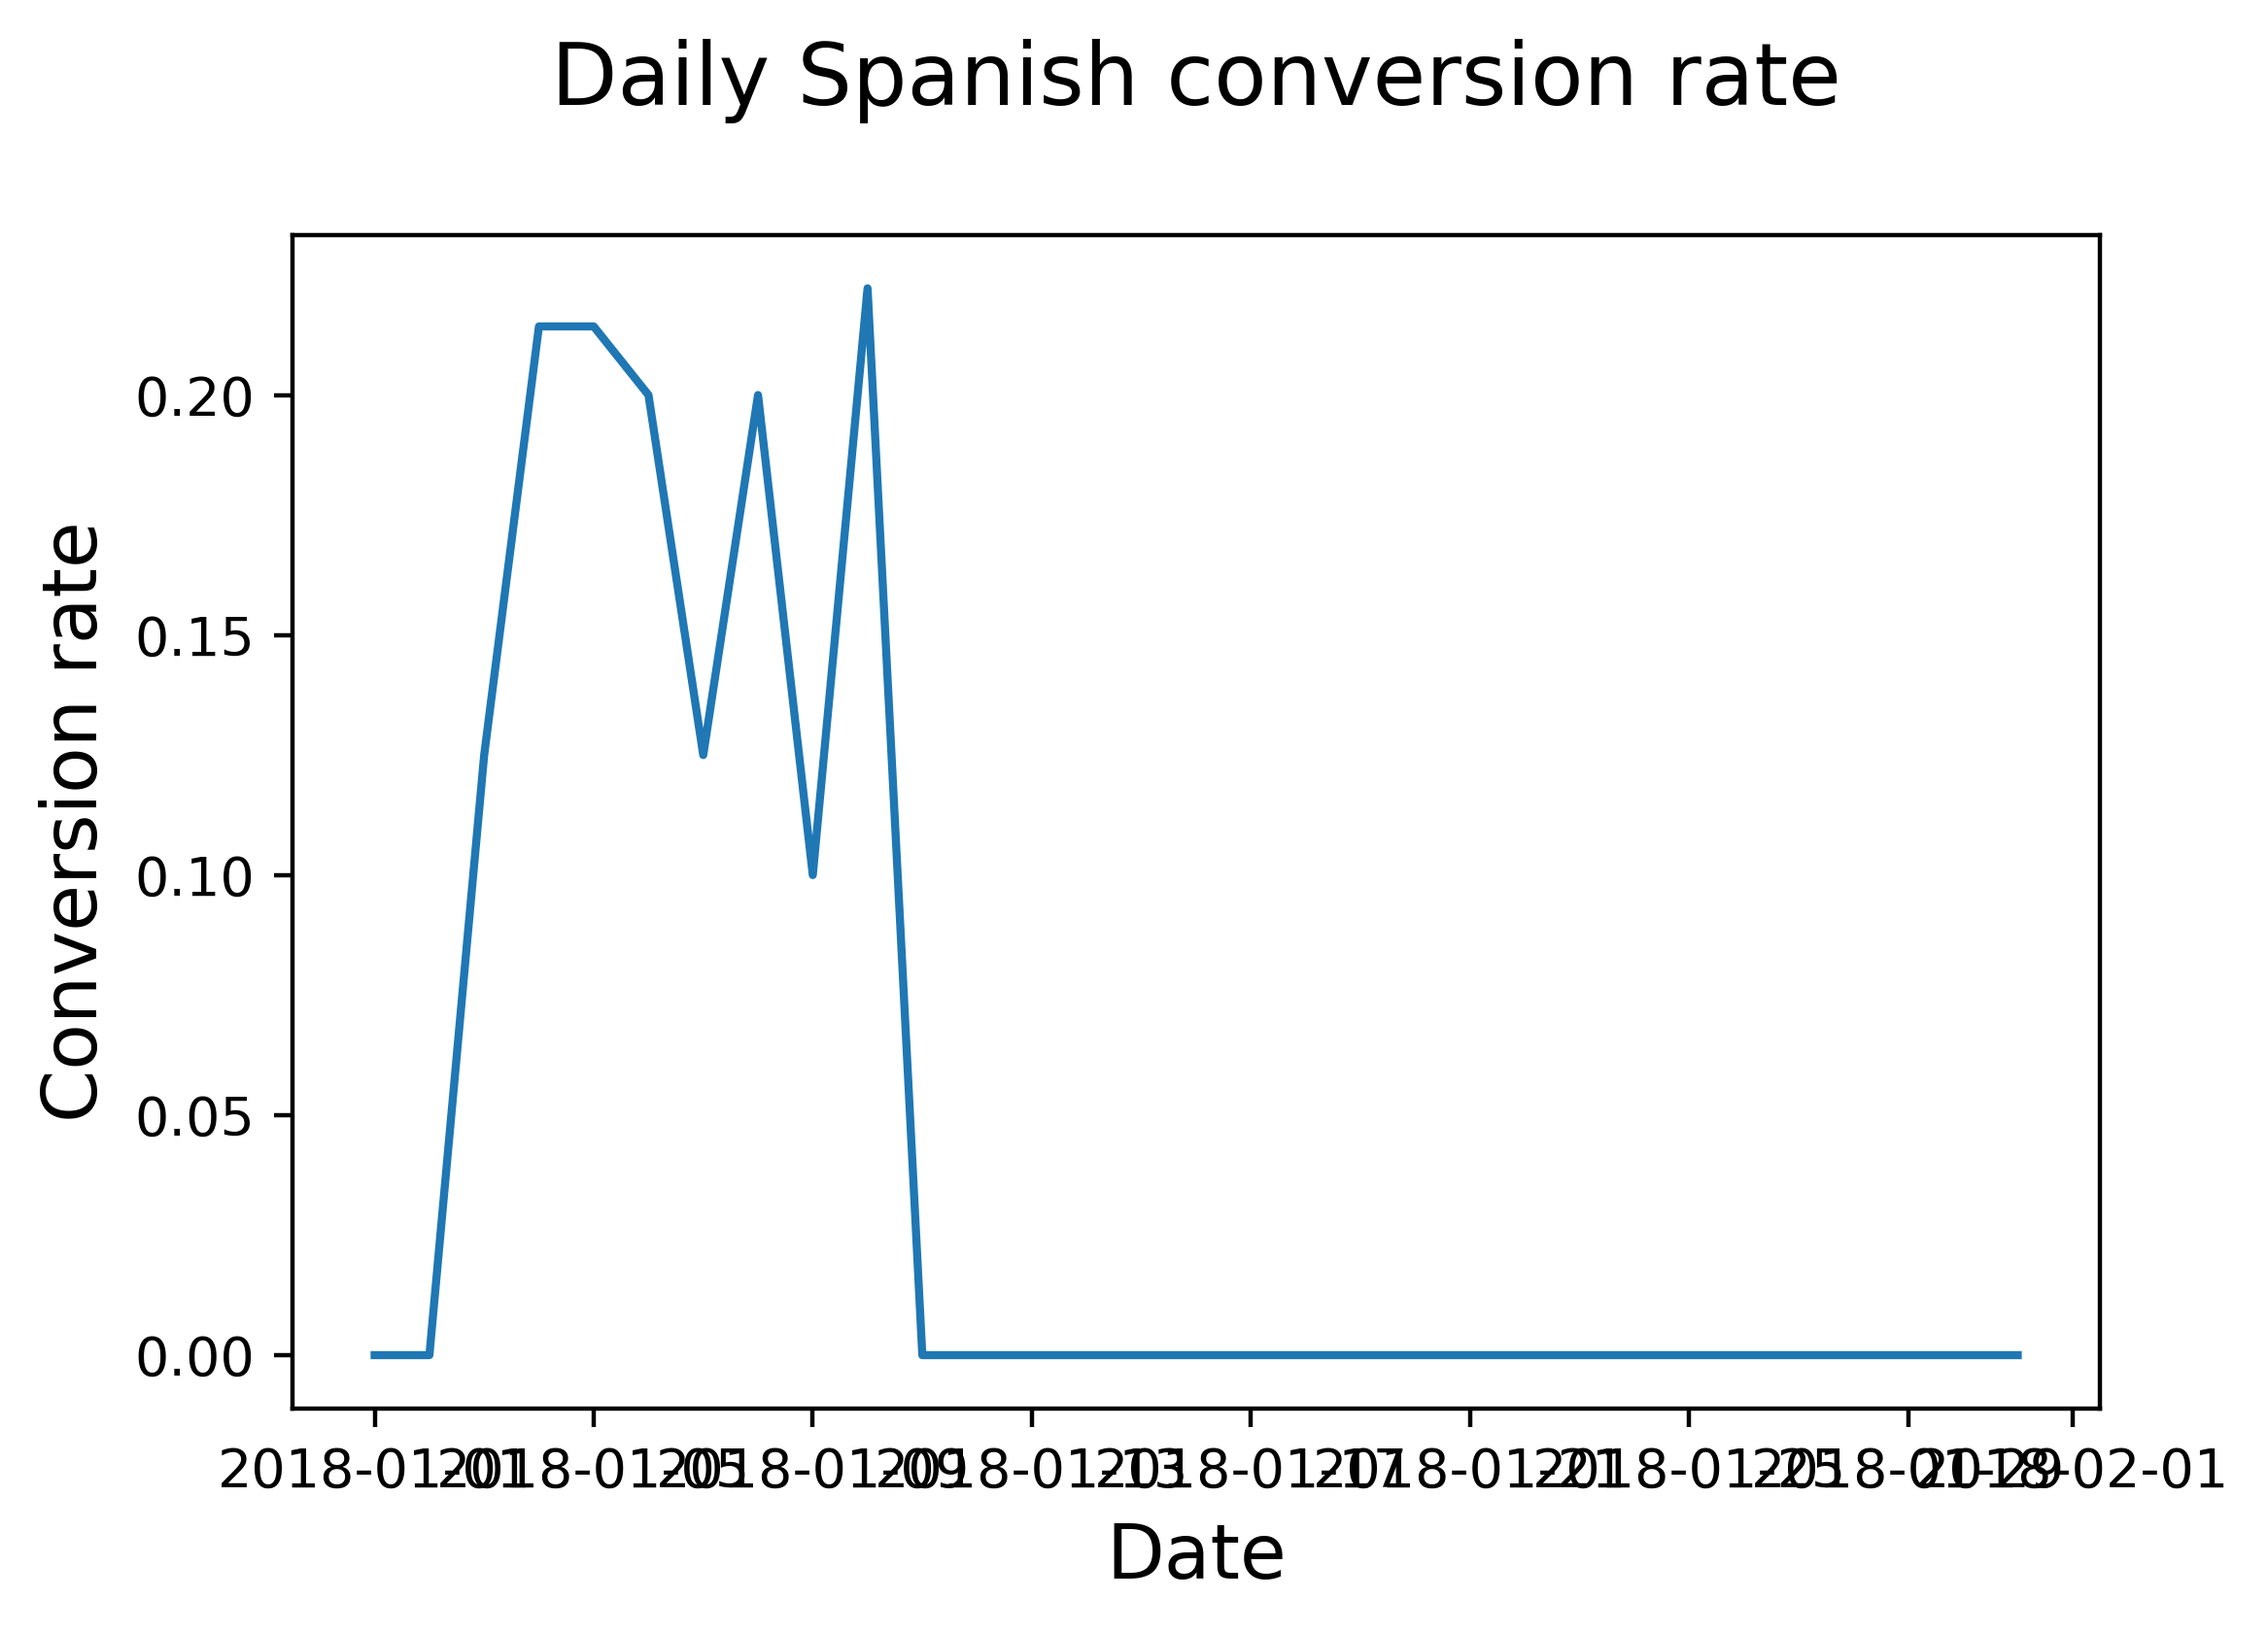

<Figure size 2400x1600 with 0 Axes>

In [36]:
plotting_conv(conv_lang_df)

In [38]:
house_ads['is_correct_language'] = np.where(house_ads['language_preferred'] == house_ads['language_displayed'], 'Yes', 'No')

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
house_ads.is_correct_language.value_counts()

Yes    4280
No      453
Name: is_correct_language, dtype: int64

In [43]:
language_check = house_ads.groupby(['date_served','is_correct_language'])['is_correct_language'].count()
language_check.head()

date_served  is_correct_language
2018-01-01   No                       2
             Yes                    189
2018-01-02   No                       3
             Yes                    247
2018-01-03   Yes                    220
Name: is_correct_language, dtype: int64

In [44]:
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

In [47]:
language_check_df.tail()

is_correct_language    No    Yes
date_served                     
2018-01-27           18.0  149.0
2018-01-28           28.0  136.0
2018-01-29           24.0  142.0
2018-01-30           23.0  145.0
2018-01-31           23.0  135.0

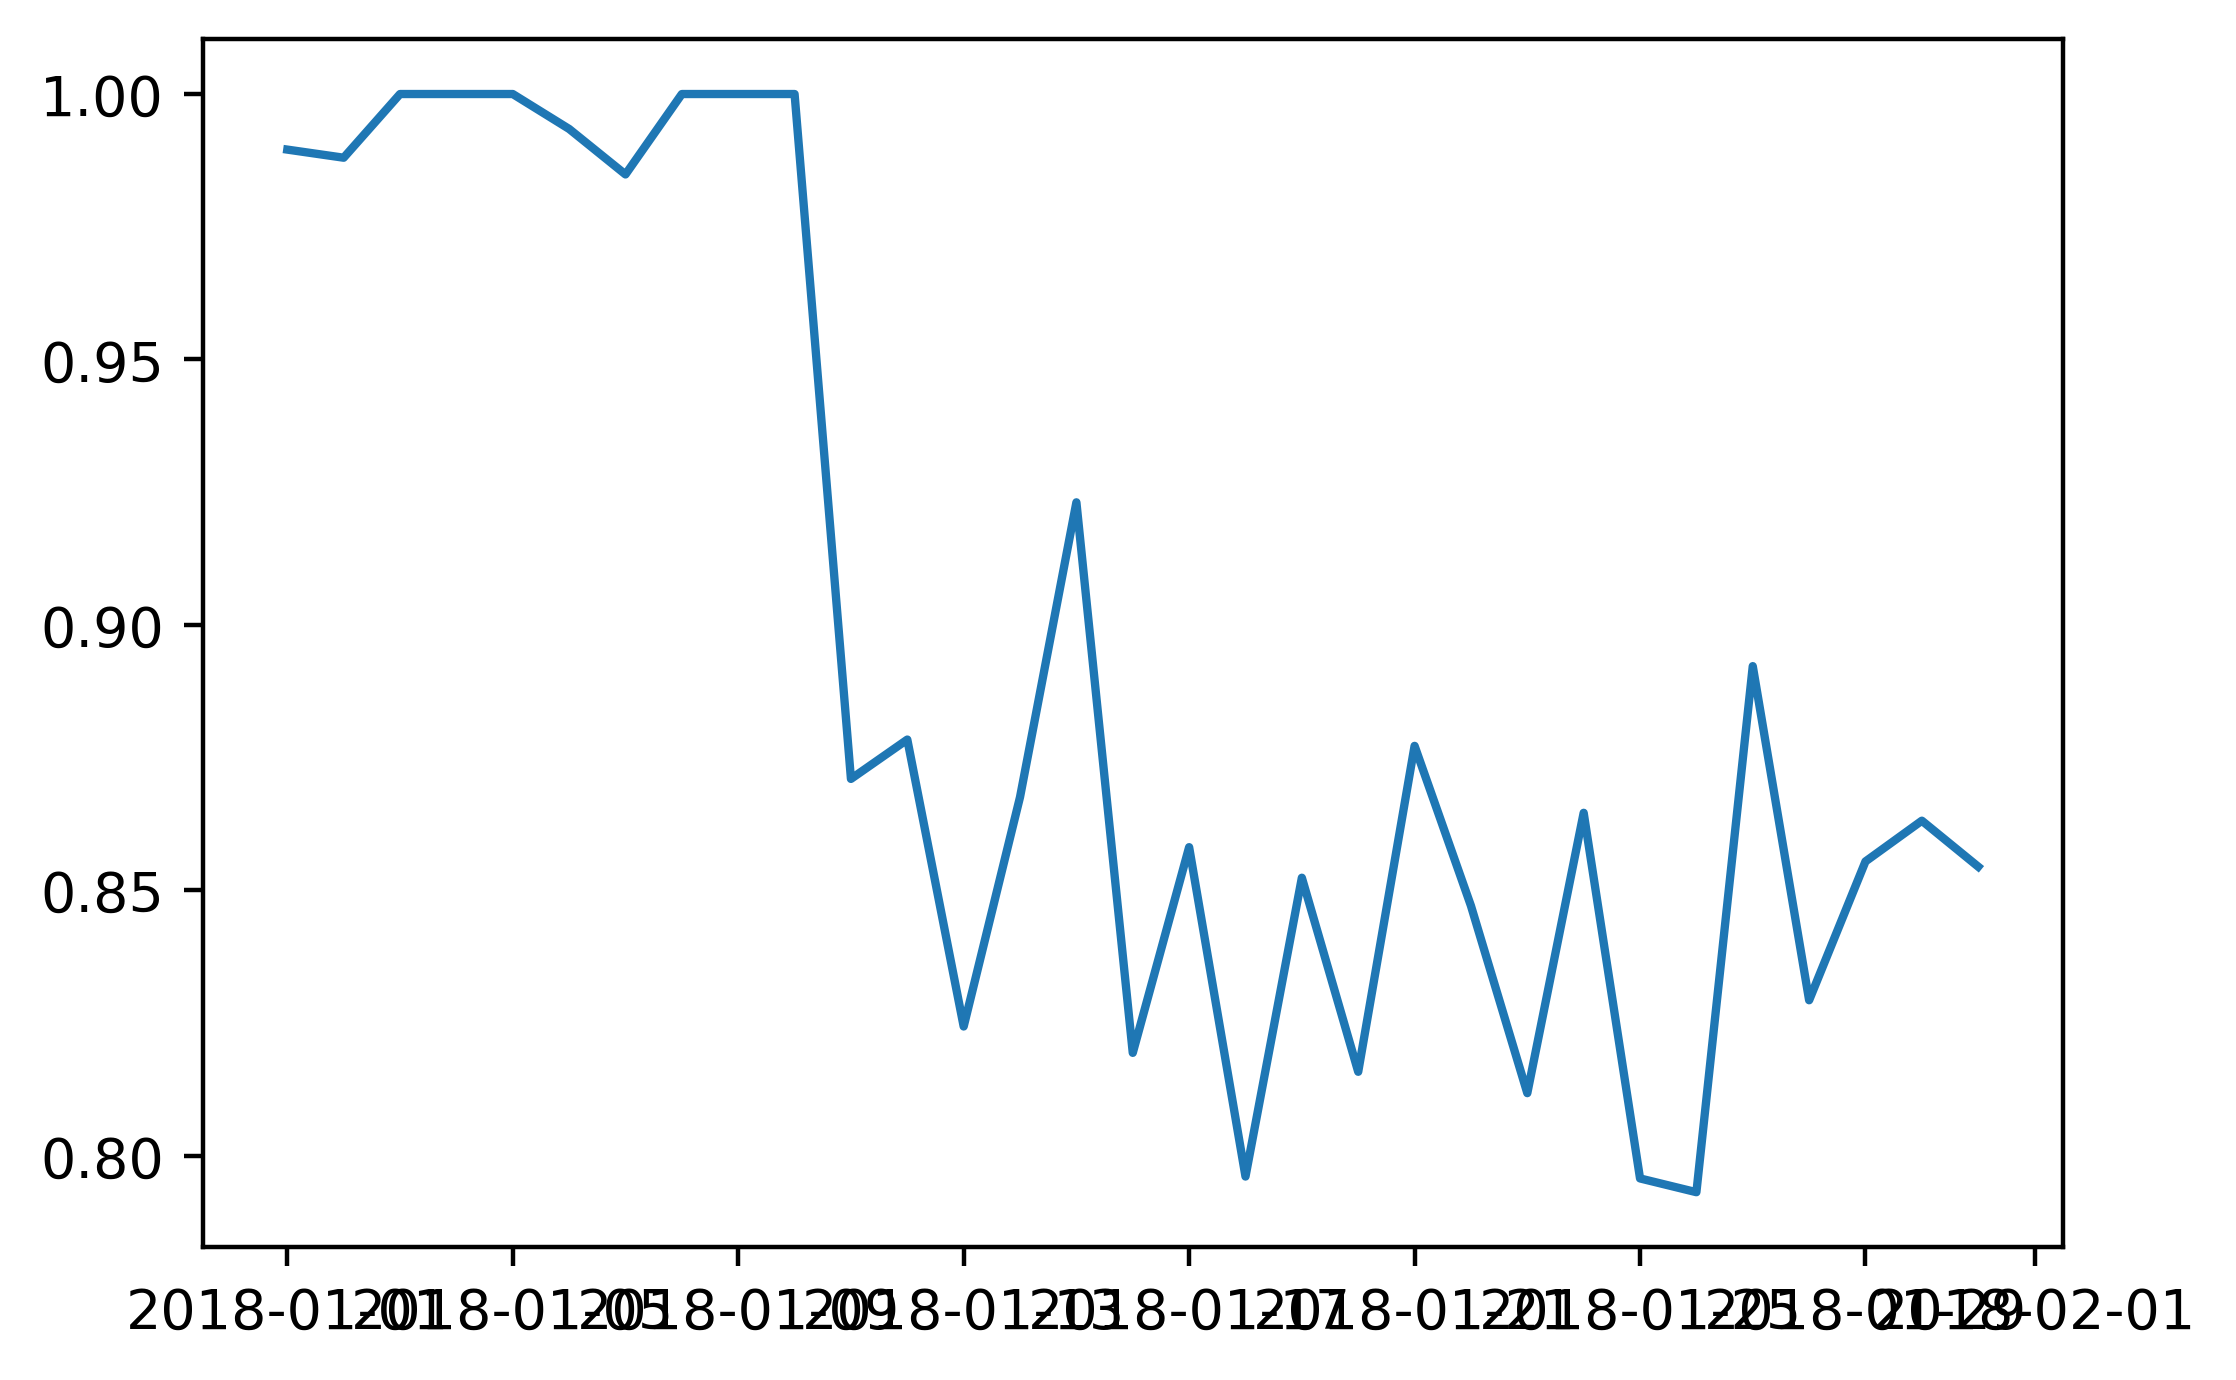

In [48]:
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

In [78]:
house_ads_no_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_no_bug, ['language_displayed'])
lang_conv

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64

In [79]:
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']


In [80]:
print('Spanish index:', spanish_index.round(2))
print('Arabic index:', arabic_index.round(2))
print('German index:', german_index.round(2))

Spanish index: 1.68
Arabic index: 5.05
German index: 4.49


In [89]:
language_conversion = house_ads.groupby(['date_served', 'language_preferred'])\
                                .agg({'user_id':'nunique',
                                     'converted':'sum'})
language_conversion

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0
...                                 ...       ...
2018-01-30  Spanish                  18         2
2018-01-31  Arabic                    7         1
            English                 130         4
            German                    4         0
            Spanish                  16         1

[119 rows x 2 columns]

In [90]:
language_conversion = pd.DataFrame(language_conversion.unstack(level=1))
language_conversion.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

In [91]:
language_conversion['english_conv_rate'] = language_conversion.loc['2018-01-11':\
                                '2018-01-31'][('converted','English')]

In [92]:
language_conversion.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                           english_conv_rate  
language_preferred Spanish                    
date_served                                   
2018-01-01               0               NaN  
2018-01-02               0               NaN  
2018-01-03               1               NaN  
2018-01-04               3               NaN  
2018-01-05               3               NaN

In [93]:
language_conversion['expected_spanish_rate'] = language_conversion['english_conv_rate']*spanish_index
language_conversion['expected_arabic_rate'] = language_conversion['english_conv_rate']*arabic_index
language_conversion['expected_german_rate'] = language_conversion['english_conv_rate']*german_index


In [94]:
language_conversion.tail()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-27               1                 4                6.7277   
2018-01-28               2                 4                6.7277   
2018-01-29               0                 3               5.04577   
2018-01-30               2                 4                6.7277   
2018-01-31               1                 4                6.7277   

                   expected_arabic_rate expected_german_rate  
language_preferred                                            
date_served                                                   
2018-01-27                      20.1831              17.9405  
2018-01-28                      20.1831              17.9405  
2018-01-29                      15.1373              13.4554  
2018-01-30                      20.1831              17.9405  
2018-01-31                      20.1831              17.9405

In [95]:
language_conversion['expected_spanish_conv'] = language_conversion['expected_spanish_rate']/100*language_conversion[('user_id','Spanish')]
language_conversion['expected_arabic_conv'] = language_conversion['expected_arabic_rate']/100*language_conversion[('user_id','Arabic')]
language_conversion['expected_german_conv'] = language_conversion['expected_german_rate']/100*language_conversion[('user_id','German')]

In [96]:
language_conversion.tail()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-27               1                 4                6.7277   
2018-01-28               2                 4                6.7277   
2018-01-29               0                 3               5.04577   
2018-01-30               2                 4                6.7277   
2018-01-31               1                 4                6.7277   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-27                      20.1831              17.9405   
2018-01-28                      20.1831              17.9405   
2018-01-29                      15.1373              13.4554   
2018-01-30                      20.1831              17.9405   
2018-01-31                      20.1831              17.9405   

                   expected_spanish_conv expected_arabic_conv  \
language_preferred                                              
date_served                                                     
2018-01-27                      0.807324             0.605493   
2018-01-28                       1.41282              1.00915   
2018-01-29                      0.756866              1.05961   
2018-01-30                       1.21099             0.807324   
2018-01-31                       1.07643              1.41282   

                   expected_german_conv  
language_preferred                       
date_served                              
2018-01-27                     0.538216  
2018-01-28                     0.538216  
2018-01-29                     0.538216  
2018-01-30                     0.538216  
2018-01-31                     0.717621

In [97]:
language_conversion = language_conversion.loc['2018-01-11':'2018-01-31']

expected_subs = language_conversion['expected_spanish_conv'].sum() + language_conversion['expected_arabic_conv'].sum() + language_conversion['expected_german_conv'].sum()

actual_subs = language_conversion[('converted','Spanish')].sum() + language_conversion[('converted','Arabic')].sum() + language_conversion[('converted','German')].sum()

lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265
